In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

2

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_256/enc_train_256.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_256/resp_train_256.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((48855, 256), (48855, 214, 16))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=16, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 16

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((48855, 256), (48855, 214))

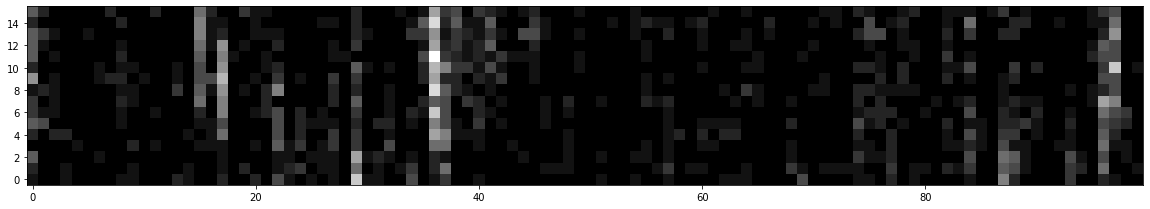

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_256/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 256
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.079842
    2       0    0.076478
    3       0    0.074563
    4       0    0.072899
    5       0    0.072022
    6       0    0.071177
    7       0    0.070284
    8       0    0.069772
    9       0    0.069352
   10       0    0.068649
   11       0    0.068302
   12       0    0.067678
   13       0    0.067370
   14       0    0.067273
   15       0    0.066838
   16       0    0.066695
   17       0    0.066296
   18       0    0.066092
   19       0    0.065835
   20       0    0.065280
   21       0    0.064988
   22       0    0.064943
   23       0    0.064667
   24       0    0.064363
   25       0    0.064209
   26       0    0.064164
   27       0    0.064153
   28       0    0.064185
   29       1    0.064172
   30       2    0.064170
   31       3    0.064014
   32       0    0.063735
   33       0    0.063700
   34       0    0.063398
   35       0    0.063156
   36       0    0.062953
   37       0    0.062871
   38       

   65       1    0.061757
   66       2    0.061637
   67       0    0.061558
   68       0    0.061586
   69       1    0.061510
   70       0    0.061502
   71       0    0.061506
   72       1    0.061511
   73       2    0.061498
   74       0    0.061507
   75       1    0.061498
   76       2    0.061502
   77       3    0.061503
   78       4    0.061542
   79       5    0.061569
   80       6    0.061562
   81       7    0.061530
   82       8    0.061520
   83       9    0.061544
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100375
    2       0    0.098340
    3       0    0.097172
    4       0    0.092862
    5       0    0.090896
    6       0    0.088864
    7       0    0.087708
    8       0    0.087029
    9       0    0.085536
   10       0    0.085241
   11       0    0.084832
   12       0    0.083713
   13       0    0.082845
   14       0    0.081829
   15       0    0.081431
   16       0    0.081052
   17       0    0.080842
   18       

   23       2    0.084792
   24       0    0.084362
   25       0    0.084267
   26       0    0.084116
   27       0    0.083771
   28       0    0.083710
   29       0    0.083675
   30       0    0.083587
   31       0    0.083265
   32       0    0.082970
   33       0    0.082715
   34       0    0.082448
   35       0    0.082426
   36       0    0.082166
   37       0    0.082006
   38       0    0.081658
   39       0    0.081587
   40       0    0.081588
   41       1    0.081424
   42       0    0.081307
   43       0    0.081260
   44       0    0.081170
   45       0    0.081208
   46       1    0.081191
   47       2    0.081161
   48       0    0.081129
   49       0    0.080995
   50       0    0.080863
   51       0    0.080703
   52       0    0.080620
   53       0    0.080638
   54       1    0.080423
   55       0    0.080338
   56       0    0.080279
   57       0    0.080268
   58       0    0.080235
   59       0    0.080234
   60       0    0.080193
   61       

   47       0    0.058113
   48       0    0.058072
   49       0    0.058122
   50       1    0.058029
   51       0    0.057941
   52       0    0.057981
   53       1    0.057992
   54       2    0.057941
   55       3    0.057942
   56       4    0.057943
   57       5    0.057922
   58       0    0.057964
   59       1    0.057976
   60       2    0.057895
   61       0    0.057851
   62       0    0.057896
   63       1    0.057888
   64       2    0.057879
   65       3    0.057867
   66       4    0.057857
   67       5    0.057886
   68       6    0.057898
   69       7    0.057862
   70       8    0.057816
   71       0    0.057820
   72       1    0.057856
   73       2    0.057877
   74       3    0.057815
   75       0    0.057811
   76       0    0.057887
   77       1    0.057963
   78       2    0.057855
   79       3    0.057840
   80       4    0.057813
   81       5    0.057743
   82       0    0.057752
   83       1    0.057738
   84       0    0.057703
   85       

   77       0    0.079551
   78       0    0.079539
   79       0    0.079563
   80       1    0.079590
   81       2    0.079557
   82       3    0.079498
   83       0    0.079485
   84       0    0.079514
   85       1    0.079541
   86       2    0.079506
   87       3    0.079508
   88       4    0.079516
   89       5    0.079513
   90       6    0.079503
   91       7    0.079522
   92       8    0.079554
   93       9    0.079559
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091303
    2       0    0.088511
    3       0    0.086518
    4       0    0.083897
    5       0    0.082878
    6       0    0.082048
    7       0    0.080710
    8       0    0.080013
    9       0    0.079762
   10       0    0.079623
   11       0    0.079217
   12       0    0.078884
   13       0    0.078808
   14       0    0.078624
   15       0    0.078530
   16       0    0.078378
   17       0    0.077915
   18       0    0.077546
   19       0    0.076987
   20       

   92       8    0.121298
   93       9    0.121342
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.142851
    2       0    0.138906
    3       0    0.136586
    4       0    0.135419
    5       0    0.134744
    6       0    0.133036
    7       0    0.131837
    8       0    0.131402
    9       0    0.130733
   10       0    0.129999
   11       0    0.129562
   12       0    0.128872
   13       0    0.128475
   14       0    0.128003
   15       0    0.127774
   16       0    0.127638
   17       0    0.127338
   18       0    0.126395
   19       0    0.126158
   20       0    0.125308
   21       0    0.124678
   22       0    0.124438
   23       0    0.124408
   24       0    0.124095
   25       0    0.123897
   26       0    0.123786
   27       0    0.123703
   28       0    0.123626
   29       0    0.123637
   30       1    0.123613
   31       0    0.123662
   32       1    0.123668
   33       2    0.123363
   34       0    0.122930
   35       

   73       0    0.123676
   74       0    0.123650
   75       0    0.123698
   76       1    0.123642
   77       0    0.123718
   78       1    0.123708
   79       2    0.123605
   80       0    0.123583
   81       0    0.123629
   82       1    0.123625
   83       2    0.123588
   84       3    0.123595
   85       4    0.123557
   86       0    0.123629
   87       1    0.123696
   88       2    0.123669
   89       3    0.123789
   90       4    0.123962
   91       5    0.123898
   92       6    0.123941
   93       7    0.123917
   94       8    0.123872
   95       9    0.123902
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.043581
    2       0    0.042933
    3       0    0.041909
    4       0    0.041045
    5       0    0.040556
    6       0    0.040055
    7       0    0.039846
    8       0    0.039151
    9       0    0.038758
   10       0    0.038530
   11       0    0.038309
   12       0    0.038183
   13       0    0.037704
   14       

    4       0    0.057283
    5       0    0.056622
    6       0    0.055563
    7       0    0.055355
    8       0    0.054826
    9       0    0.054666
   10       0    0.054367
   11       0    0.054100
   12       0    0.053615
   13       0    0.053428
   14       0    0.052995
   15       0    0.052767
   16       0    0.052648
   17       0    0.052554
   18       0    0.052450
   19       0    0.052075
   20       0    0.051844
   21       0    0.051715
   22       0    0.051650
   23       0    0.051643
   24       0    0.051439
   25       0    0.051438
   26       0    0.051345
   27       0    0.051337
   28       0    0.051256
   29       0    0.051153
   30       0    0.051076
   31       0    0.050962
   32       0    0.050943
   33       0    0.050867
   34       0    0.050865
   35       0    0.050774
   36       0    0.050716
   37       0    0.050700
   38       0    0.050557
   39       0    0.050555
   40       0    0.050531
   41       0    0.050453
   42       

  123       3    0.048404
  124       4    0.048362
  125       5    0.048300
  126       6    0.048281
  127       0    0.048268
  128       0    0.048241
  129       0    0.048216
  130       0    0.048212
  131       0    0.048252
  132       1    0.048263
  133       2    0.048263
  134       3    0.048264
  135       4    0.048272
  136       5    0.048275
  137       6    0.048325
  138       7    0.048301
  139       8    0.048290
  140       9    0.048286
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.061983
    2       0    0.060227
    3       0    0.059501
    4       0    0.058046
    5       0    0.057509
    6       0    0.056770
    7       0    0.056266
    8       0    0.055858
    9       0    0.055746
   10       0    0.055172
   11       0    0.054920
   12       0    0.054474
   13       0    0.054211
   14       0    0.053925
   15       0    0.053772
   16       0    0.053613
   17       0    0.053318
   18       0    0.053213
   19       

   40       0    0.075129
   41       0    0.074853
   42       0    0.074847
   43       0    0.074773
   44       0    0.074734
   45       0    0.074721
   46       0    0.074678
   47       0    0.074661
   48       0    0.074558
   49       0    0.074322
   50       0    0.074299
   51       0    0.074023
   52       0    0.074064
   53       1    0.073720
   54       0    0.073760
   55       1    0.073790
   56       2    0.073584
   57       0    0.073448
   58       0    0.073401
   59       0    0.073306
   60       0    0.073320
   61       1    0.073288
   62       0    0.073245
   63       0    0.073254
   64       1    0.073219
   65       0    0.073170
   66       0    0.073188
   67       1    0.073081
   68       0    0.073075
   69       0    0.073037
   70       0    0.073033
   71       0    0.073061
   72       1    0.072882
   73       0    0.072887
   74       1    0.072879
   75       0    0.072850
   76       0    0.072786
   77       0    0.072928
   78       

   72       5    0.090163
   73       6    0.090188
   74       7    0.090192
   75       8    0.090197
   76       9    0.090166
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.107827
    2       0    0.106962
    3       0    0.103372
    4       0    0.099060
    5       0    0.097551
    6       0    0.096542
    7       0    0.095697
    8       0    0.095425
    9       0    0.095313
   10       0    0.094471
   11       0    0.094142
   12       0    0.093866
   13       0    0.093358
   14       0    0.093146
   15       0    0.092221
   16       0    0.091946
   17       0    0.091843
   18       0    0.091741
   19       0    0.091404
   20       0    0.090999
   21       0    0.090637
   22       0    0.090432
   23       0    0.090385
   24       0    0.090327
   25       0    0.090103
   26       0    0.090027
   27       0    0.090079
   28       1    0.089407
   29       0    0.089229
   30       0    0.089135
   31       0    0.089026
   32       

   25       0    0.085693
   26       1    0.085661
   27       2    0.084885
   28       0    0.084733
   29       0    0.084628
   30       0    0.084587
   31       0    0.084435
   32       0    0.084287
   33       0    0.084290
   34       1    0.084291
   35       2    0.084189
   36       0    0.084154
   37       0    0.084115
   38       0    0.084211
   39       1    0.084365
   40       2    0.084040
   41       0    0.083810
   42       0    0.083676
   43       0    0.083444
   44       0    0.083334
   45       0    0.083280
   46       0    0.083224
   47       0    0.083219
   48       0    0.083200
   49       0    0.083169
   50       0    0.083151
   51       0    0.083091
   52       0    0.083065
   53       0    0.083062
   54       0    0.082954
   55       0    0.082915
   56       0    0.082916
   57       1    0.082888
   58       0    0.082914
   59       1    0.082970
   60       2    0.082942
   61       3    0.082905
   62       4    0.082865
   63       

   99       0    0.083252
  100       1    0.083256
  101       2    0.083210
  102       0    0.083205
  103       0    0.083277
  104       1    0.083256
  105       2    0.083201
  106       0    0.083162
  107       0    0.083191
  108       1    0.083214
  109       2    0.083173
  110       3    0.083127
  111       0    0.083141
  112       1    0.083139
  113       2    0.083110
  114       0    0.083123
  115       1    0.083162
  116       2    0.083144
  117       3    0.083118
  118       4    0.083131
  119       5    0.083137
  120       6    0.083105
  121       0    0.083086
  122       0    0.083116
  123       1    0.083116
  124       2    0.083084
  125       0    0.083099
  126       1    0.083128
  127       2    0.083104
  128       3    0.083078
  129       0    0.083105
  130       1    0.083189
  131       2    0.083178
  132       3    0.083079
  133       4    0.083165
  134       5    0.083239
  135       6    0.083208
  136       7    0.083226
  137       

   47       0    0.216618
   48       1    0.216417
   49       0    0.216122
   50       0    0.215956
   51       0    0.216089
   52       1    0.215872
   53       0    0.215601
   54       0    0.215544
   55       0    0.215619
   56       1    0.215452
   57       0    0.215335
   58       0    0.215391
   59       1    0.215376
   60       2    0.215263
   61       0    0.215288
   62       1    0.215398
   63       2    0.215231
   64       0    0.215026
   65       0    0.214905
   66       0    0.214823
   67       0    0.214645
   68       0    0.214616
   69       0    0.214450
   70       0    0.214654
   71       1    0.214346
   72       0    0.214306
   73       0    0.213942
   74       0    0.213833
   75       0    0.214024
   76       1    0.214022
   77       2    0.213704
   78       0    0.213658
   79       0    0.213819
   80       1    0.213792
   81       2    0.213790
   82       3    0.213700
   83       4    0.213809
   84       5    0.213745
   85       

   66       3    0.213106
   67       0    0.213114
   68       1    0.213046
   69       0    0.213001
   70       0    0.213059
   71       1    0.213061
   72       2    0.212980
   73       0    0.212894
   74       0    0.212942
   75       1    0.212933
   76       2    0.212742
   77       0    0.212803
   78       1    0.212677
   79       0    0.212304
   80       0    0.212551
   81       1    0.212468
   82       2    0.212059
   83       0    0.211866
   84       0    0.211931
   85       1    0.211720
   86       0    0.211746
   87       1    0.211811
   88       2    0.211758
   89       3    0.211707
   90       0    0.211680
   91       0    0.211659
   92       0    0.211708
   93       1    0.211657
   94       0    0.211573
   95       0    0.211509
   96       0    0.211561
   97       1    0.211531
   98       2    0.211550
   99       3    0.211561
  100       4    0.211457
  101       0    0.211436
  102       0    0.211486
  103       1    0.211464
  104       

   29       0    0.074824
   30       0    0.074673
   31       0    0.074711
   32       1    0.074737
   33       2    0.074538
   34       0    0.074537
   35       0    0.074514
   36       0    0.074464
   37       0    0.074456
   38       0    0.074451
   39       0    0.074431
   40       0    0.074475
   41       1    0.074463
   42       2    0.074400
   43       0    0.074418
   44       1    0.074435
   45       2    0.074351
   46       0    0.074337
   47       0    0.074437
   48       1    0.074467
   49       2    0.074329
   50       0    0.074260
   51       0    0.074201
   52       0    0.074185
   53       0    0.074148
   54       0    0.074156
   55       1    0.074138
   56       0    0.074121
   57       0    0.074159
   58       1    0.074150
   59       2    0.074118
   60       0    0.074081
   61       0    0.074337
   62       1    0.074603
   63       2    0.074877
   64       3    0.074556
   65       4    0.074271
   66       5    0.074145
   67       

   47       2    0.018703
   48       3    0.018685
   49       4    0.018683
   50       5    0.018673
   51       0    0.018677
   52       1    0.018658
   53       0    0.018651
   54       0    0.018687
   55       1    0.018737
   56       2    0.018795
   57       3    0.018758
   58       4    0.018795
   59       5    0.018791
   60       6    0.018789
   61       7    0.018761
   62       8    0.018746
   63       9    0.018727
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.114592
    2       0    0.113097
    3       0    0.113008
    4       0    0.112516
    5       0    0.111498
    6       0    0.110403
    7       0    0.110088
    8       0    0.109767
    9       0    0.109588
   10       0    0.109325
   11       0    0.108614
   12       0    0.108331
   13       0    0.107449
   14       0    0.107108
   15       0    0.106843
   16       0    0.106752
   17       0    0.106678
   18       0    0.106610
   19       0    0.106602
   20       

  108       1    0.103330
  109       2    0.103317
  110       3    0.103318
  111       4    0.103336
  112       5    0.103375
  113       6    0.103353
  114       7    0.103374
  115       8    0.103368
  116       9    0.103379
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.114055
    2       0    0.112658
    3       0    0.111379
    4       0    0.110739
    5       0    0.110062
    6       0    0.109588
    7       0    0.109309
    8       0    0.108877
    9       0    0.108296
   10       0    0.107969
   11       0    0.107965
   12       0    0.107806
   13       0    0.107336
   14       0    0.107061
   15       0    0.106916
   16       0    0.106868
   17       0    0.106834
   18       0    0.106753
   19       0    0.106411
   20       0    0.105868
   21       0    0.105417
   22       0    0.105421
   23       1    0.105127
   24       0    0.104904
   25       0    0.104891
   26       0    0.104877
   27       0    0.104725
   28       

   20       0    0.526543
   21       0    0.526291
   22       0    0.526081
   23       0    0.525618
   24       0    0.525384
   25       0    0.524992
   26       0    0.524562
   27       0    0.524460
   28       0    0.524345
   29       0    0.524165
   30       0    0.524092
   31       0    0.524044
   32       0    0.523736
   33       0    0.523756
   34       1    0.523764
   35       2    0.523798
   36       3    0.523717
   37       0    0.523522
   38       0    0.523494
   39       0    0.523423
   40       0    0.523454
   41       1    0.523407
   42       0    0.523572
   43       1    0.523081
   44       0    0.522898
   45       0    0.522729
   46       0    0.522561
   47       0    0.522529
   48       0    0.522421
   49       0    0.522360
   50       0    0.522302
   51       0    0.522314
   52       1    0.522245
   53       0    0.522182
   54       0    0.522110
   55       0    0.521958
   56       0    0.521959
   57       1    0.521938
   58       

   91       4    0.520582
   92       5    0.520578
   93       6    0.520559
   94       7    0.520538
   95       0    0.520539
   96       1    0.520550
   97       2    0.520540
   98       3    0.520557
   99       4    0.520540
  100       5    0.520591
  101       6    0.520586
  102       7    0.520575
  103       8    0.520572
  104       9    0.520563
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.530516
    2       0    0.525272
    3       0    0.522106
    4       0    0.518430
    5       0    0.514808
    6       0    0.512317
    7       0    0.511457
    8       0    0.509484
    9       0    0.508400
   10       0    0.507401
   11       0    0.506797
   12       0    0.505711
   13       0    0.504938
   14       0    0.504477
   15       0    0.503699
   16       0    0.502550
   17       0    0.501922
   18       0    0.501726
   19       0    0.501173
   20       0    0.500866
   21       0    0.500729
   22       0    0.500636
   23       

  167       1    0.494138
  168       2    0.494156
  169       3    0.494147
  170       4    0.494190
  171       5    0.494190
  172       6    0.494081
  173       7    0.494083
  174       8    0.494026
  175       0    0.494022
  176       0    0.493980
  177       0    0.494069
  178       1    0.494107
  179       2    0.494026
  180       3    0.494016
  181       4    0.493976
  182       0    0.493970
  183       0    0.493999
  184       1    0.494007
  185       2    0.493992
  186       3    0.493979
  187       4    0.493992
  188       5    0.493991
  189       6    0.494100
  190       7    0.494152
  191       8    0.494326
  192       9    0.494383
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.529188
    2       0    0.522564
    3       0    0.518542
    4       0    0.517528
    5       0    0.515229
    6       0    0.513636
    7       0    0.511610
    8       0    0.510519
    9       0    0.508725
   10       0    0.508064
   11       

  135       0    0.495900
  136       0    0.495858
  137       0    0.495829
  138       0    0.495829
  139       1    0.495816
  140       0    0.495798
  141       0    0.495880
  142       1    0.495911
  143       2    0.495899
  144       3    0.495996
  145       4    0.496074
  146       5    0.496175
  147       6    0.496133
  148       7    0.496064
  149       8    0.496059
  150       9    0.496058
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.121213
    2       0    0.117168
    3       0    0.113323
    4       0    0.111026
    5       0    0.109208
    6       0    0.108481
    7       0    0.107313
    8       0    0.106207
    9       0    0.105468
   10       0    0.104895
   11       0    0.104423
   12       0    0.103921
   13       0    0.103622
   14       0    0.102860
   15       0    0.102680
   16       0    0.102605
   17       0    0.101902
   18       0    0.101466
   19       0    0.101356
   20       0    0.101285
   21       

   78       0    0.099456
   79       1    0.099478
   80       2    0.099477
   81       3    0.099442
   82       4    0.099422
   83       0    0.099442
   84       1    0.099456
   85       2    0.099436
   86       3    0.099383
   87       0    0.099401
   88       1    0.099410
   89       2    0.099363
   90       0    0.099344
   91       0    0.099375
   92       1    0.099362
   93       2    0.099325
   94       0    0.099309
   95       0    0.099314
   96       1    0.099304
   97       0    0.099312
   98       1    0.099335
   99       2    0.099329
  100       3    0.099314
  101       4    0.099321
  102       5    0.099319
  103       6    0.099325
  104       7    0.099316
  105       8    0.099318
  106       9    0.099313
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.120737
    2       0    0.116409
    3       0    0.112709
    4       0    0.110866
    5       0    0.109777
    6       0    0.108923
    7       0    0.107436
    8       

   86       0    0.162528
   87       0    0.162534
   88       1    0.162530
   89       2    0.162502
   90       0    0.162440
   91       0    0.162389
   92       0    0.162411
   93       1    0.162410
   94       2    0.162372
   95       0    0.162354
   96       0    0.162369
   97       1    0.162364
   98       2    0.162380
   99       3    0.162413
  100       4    0.162478
  101       5    0.162452
  102       6    0.162302
  103       0    0.162230
  104       0    0.162203
  105       0    0.162191
  106       0    0.162121
  107       0    0.162080
  108       0    0.162056
  109       0    0.162068
  110       1    0.162054
  111       0    0.162003
  112       0    0.162003
  113       1    0.162017
  114       2    0.161990
  115       0    0.161990
  116       1    0.162009
  117       2    0.162001
  118       3    0.161988
  119       0    0.161966
  120       0    0.161954
  121       0    0.161958
  122       1    0.161953
  123       0    0.161945
  124       

   19       1    0.358561
   20       0    0.358087
   21       0    0.356667
   22       0    0.356072
   23       0    0.355721
   24       0    0.355688
   25       0    0.355720
   26       1    0.355402
   27       0    0.355174
   28       0    0.355151
   29       0    0.355089
   30       0    0.354921
   31       0    0.354540
   32       0    0.354230
   33       0    0.353799
   34       0    0.353573
   35       0    0.353446
   36       0    0.353045
   37       0    0.352739
   38       0    0.352605
   39       0    0.352484
   40       0    0.352480
   41       0    0.352512
   42       1    0.352516
   43       2    0.352428
   44       0    0.352317
   45       0    0.352253
   46       0    0.352218
   47       0    0.352214
   48       0    0.352136
   49       0    0.352035
   50       0    0.352080
   51       1    0.352124
   52       2    0.351907
   53       0    0.351852
   54       0    0.351849
   55       0    0.351795
   56       0    0.351809
   57       

   87       2    0.353178
   88       0    0.353113
   89       0    0.353103
   90       0    0.353109
   91       1    0.353091
   92       0    0.353093
   93       1    0.353087
   94       0    0.353039
   95       0    0.353110
   96       1    0.353120
   97       2    0.353033
   98       0    0.352999
   99       0    0.352999
  100       1    0.352988
  101       0    0.352955
  102       0    0.352943
  103       0    0.352957
  104       1    0.352930
  105       0    0.352920
  106       0    0.352986
  107       1    0.352997
  108       2    0.353043
  109       3    0.353114
  110       4    0.353134
  111       5    0.353172
  112       6    0.353183
  113       7    0.353162
  114       8    0.353206
  115       9    0.353189
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.388709
    2       0    0.386135
    3       0    0.381701
    4       0    0.380381
    5       0    0.378713
    6       0    0.376382
    7       0    0.374898
    8       

   92       4    0.163621
   93       5    0.163642
   94       6    0.163562
   95       0    0.163533
   96       0    0.163609
   97       1    0.163600
   98       2    0.163547
   99       3    0.163577
  100       4    0.163648
  101       5    0.163634
  102       6    0.163495
  103       0    0.163442
  104       0    0.163518
  105       1    0.163552
  106       2    0.163584
  107       3    0.163517
  108       4    0.163530
  109       5    0.163569
  110       6    0.163498
  111       7    0.163506
  112       8    0.163526
  113       9    0.163604
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.186796
    2       0    0.181895
    3       0    0.179509
    4       0    0.177597
    5       0    0.175877
    6       0    0.174241
    7       0    0.173033
    8       0    0.172915
    9       0    0.172927
   10       1    0.171648
   11       0    0.171275
   12       0    0.170962
   13       0    0.170881
   14       0    0.170680
   15       

   83       5    0.087478
   84       6    0.087390
   85       7    0.087339
   86       8    0.087340
   87       9    0.087359
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.099706
    2       0    0.098380
    3       0    0.098035
    4       0    0.097645
    5       0    0.096083
    6       0    0.095365
    7       0    0.095017
    8       0    0.094417
    9       0    0.094289
   10       0    0.093870
   11       0    0.093785
   12       0    0.093459
   13       0    0.093349
   14       0    0.092889
   15       0    0.092798
   16       0    0.092341
   17       0    0.092170
   18       0    0.091766
   19       0    0.091204
   20       0    0.090972
   21       0    0.090455
   22       0    0.090038
   23       0    0.089940
   24       0    0.089916
   25       0    0.089780
   26       0    0.089715
   27       0    0.089622
   28       0    0.089500
   29       0    0.089488
   30       0    0.089304
   31       0    0.089166
   32       

   14       0    0.033684
   15       0    0.033742
   16       1    0.033573
   17       0    0.033921
   18       1    0.033748
   19       2    0.033609
   20       3    0.033403
   21       0    0.033738
   22       1    0.033431
   23       2    0.033764
   24       3    0.033971
   25       4    0.033673
   26       5    0.033719
   27       6    0.033579
   28       7    0.033646
   29       8    0.033838
   30       9    0.033937
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.040179
    2       0    0.040350
    3       0    0.040590
    4       1    0.038849
    5       0    0.038539
    6       0    0.037864
    7       0    0.036086
    8       0    0.035906
    9       0    0.036184
   10       1    0.036046
   11       2    0.034906
   12       0    0.034895
   13       0    0.035030
   14       1    0.034806
   15       0    0.034403
   16       0    0.034422
   17       1    0.034501
   18       2    0.034265
   19       0    0.033959
   20       

   12       0    0.055754
   13       0    0.055464
   14       0    0.055459
   15       0    0.054660
   16       0    0.054306
   17       0    0.054140
   18       0    0.053670
   19       0    0.053453
   20       0    0.053395
   21       0    0.053191
   22       0    0.053058
   23       0    0.052911
   24       0    0.052984
   25       1    0.052854
   26       0    0.052705
   27       0    0.052670
   28       0    0.052582
   29       0    0.052456
   30       0    0.052434
   31       0    0.052301
   32       0    0.052183
   33       0    0.052141
   34       0    0.051987
   35       0    0.051938
   36       0    0.051798
   37       0    0.051608
   38       0    0.051382
   39       0    0.051242
   40       0    0.051320
   41       1    0.051307
   42       2    0.051222
   43       0    0.051307
   44       1    0.051279
   45       2    0.051194
   46       0    0.051198
   47       1    0.051235
   48       2    0.051211
   49       3    0.051171
   50       

   52       2    0.497271
   53       0    0.497113
   54       0    0.497062
   55       0    0.497023
   56       0    0.496890
   57       0    0.496749
   58       0    0.496722
   59       0    0.496721
   60       0    0.496632
   61       0    0.496570
   62       0    0.496525
   63       0    0.496493
   64       0    0.496500
   65       1    0.496488
   66       0    0.496427
   67       0    0.496409
   68       0    0.496345
   69       0    0.496351
   70       1    0.496339
   71       0    0.496273
   72       0    0.496186
   73       0    0.496078
   74       0    0.496055
   75       0    0.496077
   76       1    0.495950
   77       0    0.495839
   78       0    0.495806
   79       0    0.495793
   80       0    0.495788
   81       0    0.495776
   82       0    0.495753
   83       0    0.495731
   84       0    0.495757
   85       1    0.495742
   86       2    0.495721
   87       0    0.495676
   88       0    0.495587
   89       0    0.495415
   90       

   90       0    0.493202
   91       1    0.493171
   92       0    0.493136
   93       0    0.493144
   94       1    0.493051
   95       0    0.493043
   96       0    0.493101
   97       1    0.493099
   98       2    0.493038
   99       0    0.493011
  100       0    0.493022
  101       1    0.493026
  102       2    0.493089
  103       3    0.493012
  104       4    0.492916
  105       0    0.492904
  106       0    0.492868
  107       0    0.492802
  108       0    0.492782
  109       0    0.492753
  110       0    0.492710
  111       0    0.492696
  112       0    0.492654
  113       0    0.492650
  114       0    0.492644
  115       0    0.492656
  116       1    0.492607
  117       0    0.492557
  118       0    0.492559
  119       1    0.492514
  120       0    0.492535
  121       1    0.492560
  122       2    0.492501
  123       0    0.492454
  124       0    0.492465
  125       1    0.492466
  126       2    0.492471
  127       3    0.492428
  128       

   54       2    0.085656
   55       3    0.085684
   56       4    0.085705
   57       5    0.085563
   58       0    0.085556
   59       0    0.085555
   60       0    0.085507
   61       0    0.085497
   62       0    0.085516
   63       1    0.085490
   64       0    0.085490
   65       0    0.085549
   66       1    0.085535
   67       2    0.085539
   68       3    0.085475
   69       0    0.085334
   70       0    0.085466
   71       1    0.085591
   72       2    0.085732
   73       3    0.085635
   74       4    0.085720
   75       5    0.085648
   76       6    0.085682
   77       7    0.085592
   78       8    0.085699
   79       9    0.085722
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.101094
    2       0    0.098491
    3       0    0.096322
    4       0    0.095670
    5       0    0.094501
    6       0    0.093267
    7       0    0.092909
    8       0    0.092428
    9       0    0.092012
   10       0    0.091747
   11       

   17       0    0.025487
   18       1    0.025343
   19       0    0.025227
   20       0    0.025188
   21       0    0.025177
   22       0    0.025127
   23       0    0.025117
   24       0    0.025097
   25       0    0.025030
   26       0    0.024935
   27       0    0.024901
   28       0    0.024946
   29       1    0.024756
   30       0    0.024767
   31       1    0.024722
   32       0    0.024714
   33       0    0.024512
   34       0    0.024410
   35       0    0.024363
   36       0    0.024354
   37       0    0.024356
   38       1    0.024332
   39       0    0.024350
   40       1    0.024344
   41       2    0.024301
   42       0    0.024279
   43       0    0.024282
   44       1    0.024264
   45       0    0.024251
   46       0    0.024233
   47       0    0.024252
   48       1    0.024240
   49       2    0.024259
   50       3    0.024218
   51       0    0.024220
   52       1    0.024270
   53       2    0.024313
   54       3    0.024206
   55       

   80       7    0.198160
   81       8    0.197665
   82       9    0.197416
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.228065
    2       0    0.222967
    3       0    0.217767
    4       0    0.216520
    5       0    0.215136
    6       0    0.214651
    7       0    0.212560
    8       0    0.212072
    9       0    0.209618
   10       0    0.209176
   11       0    0.208381
   12       0    0.207318
   13       0    0.206508
   14       0    0.205650
   15       0    0.204674
   16       0    0.204263
   17       0    0.203724
   18       0    0.203626
   19       0    0.203525
   20       0    0.203194
   21       0    0.203083
   22       0    0.202893
   23       0    0.202565
   24       0    0.202522
   25       0    0.202292
   26       0    0.202002
   27       0    0.201847
   28       0    0.201776
   29       0    0.201710
   30       0    0.201503
   31       0    0.201453
   32       0    0.201418
   33       0    0.201182
   34       

    2       0    0.042911
    3       0    0.041575
    4       0    0.041455
    5       0    0.040913
    6       0    0.040509
    7       0    0.040214
    8       0    0.039756
    9       0    0.039842
   10       1    0.039742
   11       0    0.039189
   12       0    0.038938
   13       0    0.038644
   14       0    0.038835
   15       1    0.038804
   16       2    0.038430
   17       0    0.038321
   18       0    0.038328
   19       1    0.038164
   20       0    0.037975
   21       0    0.038182
   22       1    0.038013
   23       2    0.037393
   24       0    0.037446
   25       1    0.037204
   26       0    0.037135
   27       0    0.037023
   28       0    0.037063
   29       1    0.037003
   30       0    0.037055
   31       1    0.036997
   32       0    0.036855
   33       0    0.036865
   34       1    0.036848
   35       0    0.036761
   36       0    0.036784
   37       1    0.036762
   38       2    0.036726
   39       0    0.036709
   40       

   54       0    0.170276
   55       0    0.170215
   56       0    0.170208
   57       0    0.170201
   58       0    0.170132
   59       0    0.170131
   60       0    0.170171
   61       1    0.170139
   62       2    0.170088
   63       0    0.170052
   64       0    0.169954
   65       0    0.169970
   66       1    0.169967
   67       2    0.169927
   68       0    0.169833
   69       0    0.169781
   70       0    0.169772
   71       0    0.169767
   72       0    0.169756
   73       0    0.169738
   74       0    0.169692
   75       0    0.169660
   76       0    0.169611
   77       0    0.169608
   78       0    0.169607
   79       0    0.169587
   80       0    0.169574
   81       0    0.169536
   82       0    0.169551
   83       1    0.169564
   84       2    0.169531
   85       0    0.169518
   86       0    0.169507
   87       0    0.169508
   88       1    0.169504
   89       0    0.169505
   90       1    0.169482
   91       0    0.169399
   92       

   96       0    0.285441
   97       0    0.285443
   98       1    0.285446
   99       2    0.285454
  100       3    0.285447
  101       4    0.285501
  102       5    0.285539
  103       6    0.285586
  104       7    0.285680
  105       8    0.285683
  106       9    0.285626
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.318692
    2       0    0.314441
    3       0    0.309790
    4       0    0.308534
    5       0    0.306757
    6       0    0.304658
    7       0    0.303530
    8       0    0.302594
    9       0    0.300305
   10       0    0.299067
   11       0    0.298256
   12       0    0.297992
   13       0    0.297018
   14       0    0.295814
   15       0    0.295423
   16       0    0.294854
   17       0    0.294535
   18       0    0.294353
   19       0    0.293926
   20       0    0.293754
   21       0    0.293612
   22       0    0.293498
   23       0    0.293268
   24       0    0.293112
   25       0    0.292743
   26       

   45       0    0.288786
   46       0    0.288742
   47       0    0.288651
   48       0    0.288541
   49       0    0.288461
   50       0    0.288414
   51       0    0.288327
   52       0    0.288269
   53       0    0.288243
   54       0    0.288195
   55       0    0.288174
   56       0    0.288152
   57       0    0.288126
   58       0    0.288105
   59       0    0.288050
   60       0    0.288033
   61       0    0.288027
   62       0    0.287865
   63       0    0.287691
   64       0    0.287568
   65       0    0.287566
   66       0    0.287377
   67       0    0.287333
   68       0    0.287322
   69       0    0.287325
   70       1    0.287377
   71       2    0.287333
   72       3    0.287252
   73       0    0.287155
   74       0    0.287123
   75       0    0.287069
   76       0    0.286926
   77       0    0.286879
   78       0    0.286733
   79       0    0.286438
   80       0    0.286262
   81       0    0.286187
   82       0    0.286161
   83       

   23       0    0.040595
   24       0    0.040505
   25       0    0.040498
   26       0    0.040443
   27       0    0.040362
   28       0    0.040314
   29       0    0.040256
   30       0    0.040089
   31       0    0.039994
   32       0    0.039997
   33       1    0.039890
   34       0    0.039847
   35       0    0.039860
   36       1    0.039854
   37       2    0.039766
   38       0    0.039774
   39       1    0.039778
   40       2    0.039763
   41       0    0.039727
   42       0    0.039732
   43       1    0.039754
   44       2    0.039709
   45       0    0.039680
   46       0    0.039662
   47       0    0.039647
   48       0    0.039657
   49       1    0.039642
   50       0    0.039622
   51       0    0.039594
   52       0    0.039557
   53       0    0.039542
   54       0    0.039540
   55       0    0.039526
   56       0    0.039509
   57       0    0.039522
   58       1    0.039518
   59       2    0.039482
   60       0    0.039515
   61       

   23       0    0.083699
   24       0    0.083681
   25       0    0.083570
   26       0    0.083499
   27       0    0.083329
   28       0    0.083333
   29       1    0.083236
   30       0    0.083150
   31       0    0.083008
   32       0    0.083012
   33       1    0.082998
   34       0    0.082952
   35       0    0.082850
   36       0    0.082729
   37       0    0.082679
   38       0    0.082742
   39       1    0.082693
   40       2    0.082501
   41       0    0.082432
   42       0    0.082357
   43       0    0.082358
   44       1    0.082369
   45       2    0.082324
   46       0    0.082332
   47       1    0.082302
   48       0    0.082255
   49       0    0.082130
   50       0    0.082081
   51       0    0.082052
   52       0    0.082052
   53       1    0.082032
   54       0    0.082012
   55       0    0.082005
   56       0    0.081990
   57       0    0.081975
   58       0    0.081978
   59       1    0.082007
   60       2    0.082025
   61       

   35       0    0.071629
   36       1    0.071484
   37       2    0.071216
   38       0    0.071208
   39       0    0.071271
   40       1    0.071271
   41       2    0.071198
   42       0    0.071188
   43       0    0.071171
   44       0    0.071166
   45       0    0.071133
   46       0    0.071149
   47       1    0.071209
   48       2    0.071327
   49       3    0.071398
   50       4    0.071386
   51       5    0.071578
   52       6    0.071862
   53       7    0.071687
   54       8    0.071514
   55       9    0.071457
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.082305
    2       0    0.080411
    3       0    0.078594
    4       0    0.077585
    5       0    0.077716
    6       1    0.076678
    7       0    0.075628
    8       0    0.074949
    9       0    0.074620
   10       0    0.074436
   11       0    0.074114
   12       0    0.073563
   13       0    0.073257
   14       0    0.073131
   15       0    0.072778
   16       

   16       0    0.086304
   17       0    0.086818
   18       1    0.087133
   19       2    0.086645
   20       3    0.086160
   21       0    0.085759
   22       0    0.085524
   23       0    0.085240
   24       0    0.085212
   25       0    0.084657
   26       0    0.084394
   27       0    0.084100
   28       0    0.083891
   29       0    0.083921
   30       1    0.083920
   31       2    0.083700
   32       0    0.083678
   33       0    0.083558
   34       0    0.083573
   35       1    0.083469
   36       0    0.083363
   37       0    0.083367
   38       1    0.083309
   39       0    0.083246
   40       0    0.083300
   41       1    0.083224
   42       0    0.083125
   43       0    0.082941
   44       0    0.082589
   45       0    0.082358
   46       0    0.082423
   47       1    0.082351
   48       0    0.082364
   49       1    0.082178
   50       0    0.082168
   51       0    0.082183
   52       1    0.082390
   53       2    0.082429
   54       

   39       0    0.143398
   40       0    0.143372
   41       0    0.143301
   42       0    0.143099
   43       0    0.142941
   44       0    0.142706
   45       0    0.142546
   46       0    0.142535
   47       0    0.142376
   48       0    0.142368
   49       0    0.142340
   50       0    0.142291
   51       0    0.142236
   52       0    0.142228
   53       0    0.142142
   54       0    0.142113
   55       0    0.142090
   56       0    0.142118
   57       1    0.142092
   58       2    0.142060
   59       0    0.142076
   60       1    0.142095
   61       2    0.142028
   62       0    0.141892
   63       0    0.141870
   64       0    0.141848
   65       0    0.141838
   66       0    0.141850
   67       1    0.141842
   68       2    0.141828
   69       0    0.141819
   70       0    0.141817
   71       0    0.141812
   72       0    0.141798
   73       0    0.141799
   74       1    0.141788
   75       0    0.141767
   76       0    0.141735
   77       

   62       0    0.471960
   63       0    0.471868
   64       0    0.471801
   65       0    0.471702
   66       0    0.471659
   67       0    0.471656
   68       0    0.471631
   69       0    0.471503
   70       0    0.471447
   71       0    0.471434
   72       0    0.471418
   73       0    0.471376
   74       0    0.471361
   75       0    0.471345
   76       0    0.471336
   77       0    0.471310
   78       0    0.471280
   79       0    0.471251
   80       0    0.471268
   81       1    0.471291
   82       2    0.471206
   83       0    0.471129
   84       0    0.471108
   85       0    0.471079
   86       0    0.471076
   87       0    0.471154
   88       1    0.471068
   89       0    0.470920
   90       0    0.470760
   91       0    0.470714
   92       0    0.470681
   93       0    0.470680
   94       0    0.470678
   95       0    0.470674
   96       0    0.470671
   97       0    0.470666
   98       0    0.470681
   99       1    0.470772
  100       

   20       0    0.112781
   21       1    0.112508
   22       0    0.111951
   23       0    0.111828
   24       0    0.111696
   25       0    0.111694
   26       0    0.111679
   27       0    0.111701
   28       1    0.111578
   29       0    0.111310
   30       0    0.111249
   31       0    0.111283
   32       1    0.111273
   33       2    0.111184
   34       0    0.110975
   35       0    0.110891
   36       0    0.110799
   37       0    0.110688
   38       0    0.110582
   39       0    0.110457
   40       0    0.110377
   41       0    0.110320
   42       0    0.110290
   43       0    0.110236
   44       0    0.110232
   45       0    0.110252
   46       1    0.110274
   47       2    0.110286
   48       3    0.110142
   49       0    0.110115
   50       0    0.110110
   51       0    0.110104
   52       0    0.110045
   53       0    0.110013
   54       0    0.110003
   55       0    0.110003
   56       0    0.109988
   57       0    0.109960
   58       

   11       0    0.114849
   12       0    0.114522
   13       0    0.114455
   14       0    0.114012
   15       0    0.113956
   16       0    0.113991
   17       1    0.113245
   18       0    0.113158
   19       0    0.112684
   20       0    0.112435
   21       0    0.112277
   22       0    0.112084
   23       0    0.112014
   24       0    0.111900
   25       0    0.111933
   26       1    0.111976
   27       2    0.111788
   28       0    0.111627
   29       0    0.111527
   30       0    0.111518
   31       0    0.111389
   32       0    0.111513
   33       1    0.111305
   34       0    0.111000
   35       0    0.110803
   36       0    0.110712
   37       0    0.110696
   38       0    0.110621
   39       0    0.110558
   40       0    0.110638
   41       1    0.110624
   42       2    0.110483
   43       0    0.110433
   44       0    0.110452
   45       1    0.110377
   46       0    0.110331
   47       0    0.110339
   48       1    0.110344
   49       

   12       0    0.076521
   13       0    0.076274
   14       0    0.076154
   15       0    0.076076
   16       0    0.075970
   17       0    0.075645
   18       0    0.075597
   19       0    0.075181
   20       0    0.075028
   21       0    0.074955
   22       0    0.074690
   23       0    0.074654
   24       0    0.074572
   25       0    0.074500
   26       0    0.074429
   27       0    0.074341
   28       0    0.074312
   29       0    0.074280
   30       0    0.074157
   31       0    0.074140
   32       0    0.074126
   33       0    0.074113
   34       0    0.074001
   35       0    0.073927
   36       0    0.073936
   37       1    0.074015
   38       2    0.073835
   39       0    0.073661
   40       0    0.073640
   41       0    0.073587
   42       0    0.073561
   43       0    0.073520
   44       0    0.073527
   45       1    0.073526
   46       2    0.073475
   47       0    0.073447
   48       0    0.073403
   49       0    0.073418
   50       

  139       9    0.607201
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.629708
    2       0    0.626921
    3       0    0.625290
    4       0    0.622983
    5       0    0.620742
    6       0    0.620078
    7       0    0.618872
    8       0    0.617999
    9       0    0.617733
   10       0    0.617357
   11       0    0.616787
   12       0    0.616206
   13       0    0.616066
   14       0    0.615755
   15       0    0.615100
   16       0    0.614818
   17       0    0.614546
   18       0    0.614381
   19       0    0.614375
   20       0    0.614050
   21       0    0.613883
   22       0    0.613732
   23       0    0.613572
   24       0    0.612963
   25       0    0.612520
   26       0    0.611897
   27       0    0.611345
   28       0    0.611176
   29       0    0.610977
   30       0    0.610950
   31       0    0.610881
   32       0    0.610596
   33       0    0.610576
   34       0    0.610522
   35       0    0.610370
   36       

   83       2    0.609538
   84       3    0.609530
   85       4    0.609525
   86       5    0.609491
   87       0    0.609480
   88       0    0.609473
   89       0    0.609458
   90       0    0.609441
   91       0    0.609443
   92       1    0.609434
   93       0    0.609437
   94       1    0.609467
   95       2    0.609476
   96       3    0.609493
   97       4    0.609527
   98       5    0.609518
   99       6    0.609572
  100       7    0.609516
  101       8    0.609392
  102       0    0.609358
  103       0    0.609310
  104       0    0.609304
  105       0    0.609309
  106       1    0.609298
  107       0    0.609263
  108       0    0.609246
  109       0    0.609238
  110       0    0.609234
  111       0    0.609232
  112       0    0.609271
  113       1    0.609280
  114       2    0.609277
  115       3    0.609276
  116       4    0.609309
  117       5    0.609338
  118       6    0.609475
  119       7    0.609475
  120       8    0.609457
  121       

   80       2    0.055841
   81       3    0.055837
   82       4    0.055857
   83       5    0.055863
   84       6    0.055853
   85       7    0.055859
   86       8    0.055859
   87       9    0.055843
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.067131
    2       0    0.066136
    3       0    0.064690
    4       0    0.063334
    5       0    0.062501
    6       0    0.062068
    7       0    0.061405
    8       0    0.060705
    9       0    0.060504
   10       0    0.060132
   11       0    0.059878
   12       0    0.059542
   13       0    0.058858
   14       0    0.058471
   15       0    0.058213
   16       0    0.058090
   17       0    0.057914
   18       0    0.057788
   19       0    0.057604
   20       0    0.057402
   21       0    0.057278
   22       0    0.056884
   23       0    0.056683
   24       0    0.056465
   25       0    0.056319
   26       0    0.056218
   27       0    0.056140
   28       0    0.056007
   29       

   93       5    0.486080
   94       6    0.486124
   95       7    0.486112
   96       8    0.486252
   97       9    0.486384
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.527765
    2       0    0.521841
    3       0    0.516345
    4       0    0.512427
    5       0    0.509906
    6       0    0.507362
    7       0    0.505799
    8       0    0.504299
    9       0    0.502442
   10       0    0.500854
   11       0    0.500405
   12       0    0.499030
   13       0    0.498442
   14       0    0.497383
   15       0    0.496492
   16       0    0.495625
   17       0    0.495248
   18       0    0.494501
   19       0    0.493852
   20       0    0.493466
   21       0    0.492633
   22       0    0.492418
   23       0    0.492145
   24       0    0.491774
   25       0    0.491269
   26       0    0.491080
   27       0    0.491088
   28       1    0.490171
   29       0    0.489683
   30       0    0.489571
   31       0    0.489246
   32       

   41       0    0.118406
   42       0    0.118126
   43       0    0.117848
   44       0    0.117529
   45       0    0.117496
   46       0    0.117511
   47       1    0.117511
   48       2    0.117324
   49       0    0.117302
   50       0    0.117314
   51       1    0.117427
   52       2    0.117423
   53       3    0.117150
   54       0    0.117083
   55       0    0.116989
   56       0    0.117096
   57       1    0.117001
   58       2    0.116498
   59       0    0.116125
   60       0    0.115983
   61       0    0.115996
   62       1    0.116118
   63       2    0.115986
   64       3    0.115865
   65       0    0.115815
   66       0    0.115852
   67       1    0.115830
   68       2    0.115794
   69       0    0.115727
   70       0    0.115730
   71       1    0.115760
   72       2    0.115777
   73       3    0.115735
   74       4    0.115683
   75       0    0.115652
   76       0    0.115654
   77       1    0.115758
   78       2    0.115856
   79       

   10       0    0.135281
   11       1    0.134703
   12       0    0.133373
   13       0    0.132369
   14       0    0.131324
   15       0    0.130994
   16       0    0.130502
   17       0    0.130065
   18       0    0.129771
   19       0    0.128939
   20       0    0.128641
   21       0    0.128045
   22       0    0.127631
   23       0    0.126882
   24       0    0.126694
   25       0    0.126612
   26       0    0.126224
   27       0    0.125961
   28       0    0.125892
   29       0    0.125778
   30       0    0.125395
   31       0    0.125345
   32       0    0.125304
   33       0    0.125310
   34       1    0.125317
   35       2    0.125322
   36       3    0.124839
   37       0    0.124373
   38       0    0.123945
   39       0    0.123637
   40       0    0.123488
   41       0    0.123407
   42       0    0.123317
   43       0    0.122931
   44       0    0.122845
   45       0    0.122537
   46       0    0.122431
   47       0    0.122214
   48       

   96       2    0.082102
   97       0    0.082082
   98       0    0.082105
   99       1    0.082118
  100       2    0.082116
  101       3    0.082082
  102       4    0.082096
  103       5    0.082127
  104       6    0.082100
  105       7    0.082172
  106       8    0.082168
  107       9    0.082096
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.108653
    2       0    0.105087
    3       0    0.103253
    4       0    0.100912
    5       0    0.099706
    6       0    0.098954
    7       0    0.098126
    8       0    0.097445
    9       0    0.096944
   10       0    0.095625
   11       0    0.094662
   12       0    0.093643
   13       0    0.093102
   14       0    0.092530
   15       0    0.091641
   16       0    0.091349
   17       0    0.091328
   18       0    0.091340
   19       1    0.091125
   20       0    0.090697
   21       0    0.090542
   22       0    0.090404
   23       0    0.090353
   24       0    0.090032
   25       

   77       3    0.096404
   78       0    0.096384
   79       0    0.096393
   80       1    0.096433
   81       2    0.096392
   82       3    0.096347
   83       0    0.096334
   84       0    0.096323
   85       0    0.096310
   86       0    0.096320
   87       1    0.096340
   88       2    0.096325
   89       3    0.096297
   90       0    0.096281
   91       0    0.096257
   92       0    0.096256
   93       0    0.096283
   94       1    0.096287
   95       2    0.096260
   96       3    0.096356
   97       4    0.096517
   98       5    0.096673
   99       6    0.097073
  100       7    0.097063
  101       8    0.097485
  102       9    0.097558
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.110095
    2       0    0.108998
    3       0    0.107617
    4       0    0.106287
    5       0    0.105944
    6       0    0.106490
    7       1    0.104959
    8       0    0.103781
    9       0    0.103190
   10       0    0.102806
   11       

   68       2    0.095921
   69       0    0.095956
   70       1    0.095850
   71       0    0.095979
   72       1    0.095828
   73       0    0.095915
   74       1    0.095825
   75       0    0.095563
   76       0    0.095658
   77       1    0.095730
   78       2    0.095618
   79       3    0.095581
   80       4    0.095630
   81       5    0.095527
   82       0    0.095506
   83       0    0.095584
   84       1    0.095518
   85       2    0.095539
   86       3    0.095597
   87       4    0.095530
   88       5    0.095353
   89       0    0.095449
   90       1    0.095490
   91       2    0.095418
   92       3    0.095439
   93       4    0.095524
   94       5    0.095509
   95       6    0.095388
   96       7    0.095428
   97       8    0.095396
   98       9    0.095385
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091230
    2       0    0.089445
    3       0    0.088204
    4       0    0.086554
    5       0    0.084768
    6       

   95       2    0.076003
   96       0    0.075996
   97       0    0.076014
   98       1    0.076007
   99       2    0.076004
  100       3    0.076015
  101       4    0.076007
  102       5    0.076026
  103       6    0.076007
  104       7    0.075985
  105       0    0.075985
  106       0    0.075984
  107       0    0.075991
  108       1    0.075976
  109       0    0.075994
  110       1    0.075971
  111       0    0.075934
  112       0    0.075937
  113       1    0.075947
  114       2    0.075950
  115       3    0.075965
  116       4    0.075912
  117       0    0.075937
  118       1    0.075943
  119       2    0.076072
  120       3    0.076116
  121       4    0.075982
  122       5    0.075948
  123       6    0.075910
  124       0    0.075918
  125       1    0.075899
  126       0    0.075888
  127       0    0.075856
  128       0    0.075854
  129       0    0.075853
  130       0    0.075852
  131       0    0.075867
  132       1    0.075878
  133       

   35       0    0.344261
   36       0    0.343627
   37       0    0.343129
   38       0    0.342925
   39       0    0.342859
   40       0    0.342519
   41       0    0.342466
   42       0    0.342373
   43       0    0.342375
   44       1    0.342201
   45       0    0.341923
   46       0    0.341859
   47       0    0.341814
   48       0    0.341760
   49       0    0.341760
   50       0    0.341695
   51       0    0.341600
   52       0    0.341554
   53       0    0.341538
   54       0    0.341497
   55       0    0.341462
   56       0    0.341442
   57       0    0.341398
   58       0    0.341390
   59       0    0.341396
   60       1    0.341368
   61       0    0.341329
   62       0    0.341311
   63       0    0.341295
   64       0    0.341290
   65       0    0.341248
   66       0    0.341137
   67       0    0.340947
   68       0    0.340968
   69       1    0.341001
   70       2    0.340830
   71       0    0.340772
   72       0    0.340758
   73       

   22       0    0.353154
   23       0    0.352742
   24       0    0.352605
   25       0    0.352462
   26       0    0.352125
   27       0    0.351871
   28       0    0.351413
   29       0    0.351136
   30       0    0.350976
   31       0    0.350815
   32       0    0.350641
   33       0    0.350572
   34       0    0.350547
   35       0    0.350366
   36       0    0.350229
   37       0    0.350142
   38       0    0.350103
   39       0    0.350069
   40       0    0.350014
   41       0    0.349980
   42       0    0.349932
   43       0    0.349872
   44       0    0.349765
   45       0    0.349593
   46       0    0.349373
   47       0    0.349114
   48       0    0.348948
   49       0    0.348787
   50       0    0.348705
   51       0    0.348752
   52       1    0.348311
   53       0    0.348139
   54       0    0.348068
   55       0    0.347862
   56       0    0.347833
   57       0    0.347773
   58       0    0.347717
   59       0    0.347606
   60       

   77       1    0.346985
   78       2    0.346873
   79       0    0.346915
   80       1    0.346966
   81       2    0.346873
   82       3    0.346853
   83       0    0.346770
   84       0    0.346752
   85       0    0.346832
   86       1    0.346740
   87       0    0.346624
   88       0    0.346656
   89       1    0.346672
   90       2    0.346609
   91       0    0.346579
   92       0    0.346669
   93       1    0.346789
   94       2    0.346653
   95       3    0.346612
   96       4    0.346666
   97       5    0.346648
   98       6    0.346591
   99       7    0.346629
  100       8    0.346603
  101       9    0.346503
  102       0    0.346540
  103       1    0.346566
  104       2    0.346501
  105       0    0.346480
  106       0    0.346533
  107       1    0.346529
  108       2    0.346459
  109       0    0.346487
  110       1    0.346577
  111       2    0.346543
  112       3    0.346607
  113       4    0.346799
  114       5    0.346776
  115       

    3       0    0.576872
    4       0    0.574233
    5       0    0.571738
    6       0    0.570509
    7       0    0.569412
    8       0    0.569060
    9       0    0.568513
   10       0    0.565875
   11       0    0.564911
   12       0    0.564428
   13       0    0.563940
   14       0    0.562256
   15       0    0.561547
   16       0    0.560850
   17       0    0.560319
   18       0    0.559930
   19       0    0.559410
   20       0    0.559161
   21       0    0.558991
   22       0    0.558625
   23       0    0.558091
   24       0    0.557787
   25       0    0.557480
   26       0    0.557264
   27       0    0.557090
   28       0    0.557012
   29       0    0.556873
   30       0    0.556669
   31       0    0.556610
   32       0    0.556599
   33       0    0.556582
   34       0    0.556390
   35       0    0.556261
   36       0    0.556100
   37       0    0.556008
   38       0    0.555936
   39       0    0.555843
   40       0    0.555783
   41       

   47       0    0.551297
   48       1    0.551160
   49       0    0.551105
   50       0    0.551115
   51       1    0.551093
   52       0    0.550932
   53       0    0.550937
   54       1    0.550939
   55       2    0.550896
   56       0    0.550816
   57       0    0.550937
   58       1    0.550983
   59       2    0.550668
   60       0    0.550589
   61       0    0.550603
   62       1    0.550577
   63       0    0.550530
   64       0    0.550548
   65       1    0.550547
   66       2    0.550472
   67       0    0.550500
   68       1    0.550410
   69       0    0.550180
   70       0    0.550089
   71       0    0.550110
   72       1    0.550015
   73       0    0.550035
   74       1    0.549927
   75       0    0.549813
   76       0    0.549823
   77       1    0.549741
   78       0    0.549726
   79       0    0.549746
   80       1    0.549690
   81       0    0.549689
   82       0    0.549653
   83       0    0.549748
   84       1    0.549747
   85       

   83       1    0.088303
   84       2    0.088298
   85       3    0.088296
   86       4    0.088278
   87       5    0.088265
   88       6    0.088274
   89       7    0.088317
   90       8    0.088285
   91       9    0.088240
   92       0    0.088280
   93       1    0.088289
   94       2    0.088291
   95       3    0.088263
   96       4    0.088230
   97       0    0.088247
   98       1    0.088255
   99       2    0.088295
  100       3    0.088345
  101       4    0.088290
  102       5    0.088235
  103       6    0.088288
  104       7    0.088329
  105       8    0.088301
  106       9    0.088267
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.102243
    2       0    0.100313
    3       0    0.097071
    4       0    0.096357
    5       0    0.095606
    6       0    0.094739
    7       0    0.094311
    8       0    0.093439
    9       0    0.092846
   10       0    0.092052
   11       0    0.091772
   12       0    0.091615
   13       

   46       0    0.436417
   47       0    0.436387
   48       0    0.436312
   49       0    0.436190
   50       0    0.436118
   51       0    0.436031
   52       0    0.435883
   53       0    0.435826
   54       0    0.435762
   55       0    0.435642
   56       0    0.435466
   57       0    0.435359
   58       0    0.435310
   59       0    0.435280
   60       0    0.435270
   61       0    0.435144
   62       0    0.435126
   63       0    0.435206
   64       1    0.435008
   65       0    0.434753
   66       0    0.434648
   67       0    0.434592
   68       0    0.434567
   69       0    0.434533
   70       0    0.434506
   71       0    0.434488
   72       0    0.434448
   73       0    0.434423
   74       0    0.434411
   75       0    0.434398
   76       0    0.434409
   77       1    0.434405
   78       2    0.434116
   79       0    0.434626
   80       1    0.434742
   81       2    0.435247
   82       3    0.435421
   83       4    0.435267
   84       

  103       3    0.430077
  104       4    0.430115
  105       5    0.430082
  106       6    0.429982
  107       0    0.429981
  108       0    0.429947
  109       0    0.429931
  110       0    0.429956
  111       1    0.429929
  112       0    0.429903
  113       0    0.429884
  114       0    0.429908
  115       1    0.429928
  116       2    0.429901
  117       3    0.429911
  118       4    0.429947
  119       5    0.429935
  120       6    0.430112
  121       7    0.430283
  122       8    0.430216
  123       9    0.430282
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.493927
    2       0    0.483843
    3       0    0.474957
    4       0    0.469968
    5       0    0.467093
    6       0    0.464510
    7       0    0.457571
    8       0    0.456309
    9       0    0.455120
   10       0    0.453610
   11       0    0.451953
   12       0    0.451617
   13       0    0.450023
   14       0    0.448565
   15       0    0.447484
   16       

   23       0    0.292998
   24       0    0.292777
   25       0    0.292563
   26       0    0.292331
   27       0    0.292183
   28       0    0.292040
   29       0    0.291963
   30       0    0.291763
   31       0    0.291615
   32       0    0.291523
   33       0    0.291512
   34       0    0.291427
   35       0    0.291333
   36       0    0.291338
   37       1    0.291291
   38       0    0.291195
   39       0    0.291155
   40       0    0.291113
   41       0    0.291073
   42       0    0.290921
   43       0    0.290802
   44       0    0.290759
   45       0    0.290626
   46       0    0.290219
   47       0    0.289899
   48       0    0.289549
   49       0    0.289488
   50       0    0.289467
   51       0    0.289444
   52       0    0.289415
   53       0    0.289319
   54       0    0.289279
   55       0    0.289246
   56       0    0.289251
   57       1    0.289252
   58       2    0.289225
   59       0    0.289221
   60       0    0.289202
   61       

   73       0    0.292845
   74       1    0.292776
   75       0    0.292725
   76       0    0.292719
   77       0    0.292733
   78       1    0.292639
   79       0    0.292580
   80       0    0.292563
   81       0    0.292497
   82       0    0.292473
   83       0    0.292479
   84       1    0.292483
   85       2    0.292438
   86       0    0.292383
   87       0    0.292375
   88       0    0.292285
   89       0    0.292224
   90       0    0.292215
   91       0    0.292219
   92       1    0.292204
   93       0    0.292225
   94       1    0.292238
   95       2    0.292291
   96       3    0.292311
   97       4    0.292251
   98       5    0.292258
   99       6    0.292193
  100       0    0.292134
  101       0    0.292138
  102       1    0.292097
  103       0    0.292048
  104       0    0.292053
  105       1    0.292063
  106       2    0.292055
  107       3    0.292105
  108       4    0.292147
  109       5    0.292098
  110       6    0.292098
  111       

   38       0    0.072660
   39       0    0.072572
   40       0    0.072611
   41       1    0.072617
   42       2    0.072551
   43       0    0.072544
   44       0    0.072394
   45       0    0.072291
   46       0    0.072310
   47       1    0.072202
   48       0    0.072223
   49       1    0.072259
   50       2    0.072209
   51       3    0.072168
   52       0    0.072168
   53       1    0.072116
   54       0    0.072130
   55       1    0.072128
   56       2    0.072049
   57       0    0.072030
   58       0    0.072097
   59       1    0.072134
   60       2    0.072025
   61       0    0.071993
   62       0    0.072080
   63       1    0.072069
   64       2    0.072134
   65       3    0.072084
   66       4    0.071920
   67       0    0.071942
   68       1    0.071993
   69       2    0.071879
   70       0    0.071927
   71       1    0.071886
   72       2    0.071864
   73       0    0.071843
   74       0    0.071870
   75       1    0.071838
   76       

   13       0    0.020978
   14       0    0.020883
   15       0    0.020855
   16       0    0.020718
   17       0    0.020697
   18       0    0.020687
   19       0    0.020617
   20       0    0.020565
   21       0    0.020547
   22       0    0.020502
   23       0    0.020506
   24       1    0.020510
   25       2    0.020476
   26       0    0.020448
   27       0    0.020417
   28       0    0.020392
   29       0    0.020388
   30       0    0.020339
   31       0    0.020336
   32       0    0.020342
   33       1    0.020332
   34       0    0.020306
   35       0    0.020304
   36       0    0.020295
   37       0    0.020292
   38       0    0.020314
   39       1    0.020315
   40       2    0.020254
   41       0    0.020236
   42       0    0.020247
   43       1    0.020245
   44       2    0.020224
   45       0    0.020218
   46       0    0.020205
   47       0    0.020212
   48       1    0.020177
   49       0    0.020159
   50       0    0.020149
   51       

  142       3    0.116170
  143       4    0.116523
  144       5    0.117010
  145       6    0.116753
  146       7    0.116741
  147       8    0.116756
  148       9    0.116652
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.131569
    2       0    0.130562
    3       0    0.128583
    4       0    0.127648
    5       0    0.126406
    6       0    0.125296
    7       0    0.124450
    8       0    0.123279
    9       0    0.122593
   10       0    0.121928
   11       0    0.121366
   12       0    0.121019
   13       0    0.120549
   14       0    0.120375
   15       0    0.120153
   16       0    0.119941
   17       0    0.119786
   18       0    0.119737
   19       0    0.119171
   20       0    0.119598
   21       1    0.119292
   22       2    0.118386
   23       0    0.117859
   24       0    0.117550
   25       0    0.117124
   26       0    0.116946
   27       0    0.116852
   28       0    0.116759
   29       0    0.116478
   30       

   49       0    0.116164
   50       0    0.116150
   51       0    0.116138
   52       0    0.116115
   53       0    0.116089
   54       0    0.116010
   55       0    0.115821
   56       0    0.115687
   57       0    0.115561
   58       0    0.115542
   59       0    0.115425
   60       0    0.115072
   61       0    0.114995
   62       0    0.114879
   63       0    0.114908
   64       1    0.114875
   65       0    0.114825
   66       0    0.114863
   67       1    0.114931
   68       2    0.114932
   69       3    0.114927
   70       4    0.114991
   71       5    0.114947
   72       6    0.114842
   73       7    0.114816
   74       0    0.114826
   75       1    0.114746
   76       0    0.114730
   77       0    0.114758
   78       1    0.114730
   79       2    0.114624
   80       0    0.114575
   81       0    0.114594
   82       1    0.114577
   83       2    0.114566
   84       0    0.114577
   85       1    0.114576
   86       2    0.114594
   87       

   69       0    0.398484
   70       0    0.397855
   71       0    0.397687
   72       0    0.397586
   73       0    0.397550
   74       0    0.397488
   75       0    0.397458
   76       0    0.397462
   77       1    0.397502
   78       2    0.397521
   79       3    0.397443
   80       0    0.397417
   81       0    0.397361
   82       0    0.397306
   83       0    0.397319
   84       1    0.397295
   85       0    0.397263
   86       0    0.397242
   87       0    0.397218
   88       0    0.397216
   89       0    0.397188
   90       0    0.397151
   91       0    0.397159
   92       1    0.397212
   93       2    0.397166
   94       3    0.397147
   95       0    0.397264
   96       1    0.397505
   97       2    0.398122
   98       3    0.398973
   99       4    0.398885
  100       5    0.398800
  101       6    0.398509
  102       7    0.398383
  103       8    0.398292
  104       9    0.398241
minimum of test set found
Iters   tally   ll(test) 
    1       

   80       2    0.227938
   81       0    0.227898
   82       0    0.227883
   83       0    0.227863
   84       0    0.227900
   85       1    0.227854
   86       0    0.227851
   87       0    0.228008
   88       1    0.228116
   89       2    0.227797
   90       0    0.227822
   91       1    0.227687
   92       0    0.227530
   93       0    0.227551
   94       1    0.227471
   95       0    0.227406
   96       0    0.227437
   97       1    0.227414
   98       2    0.227363
   99       0    0.227390
  100       1    0.227395
  101       2    0.227348
  102       0    0.227363
  103       1    0.227333
  104       0    0.227322
  105       0    0.227339
  106       1    0.227326
  107       2    0.227302
  108       0    0.227310
  109       1    0.227338
  110       2    0.227320
  111       3    0.227281
  112       0    0.227324
  113       1    0.227512
  114       2    0.227507
  115       3    0.227470
  116       4    0.227493
  117       5    0.227514
  118       

   39       0    0.229436
   40       0    0.229170
   41       0    0.229189
   42       1    0.229147
   43       0    0.229065
   44       0    0.229105
   45       1    0.228996
   46       0    0.228817
   47       0    0.228596
   48       0    0.228469
   49       0    0.228229
   50       0    0.228202
   51       0    0.228066
   52       0    0.227802
   53       0    0.227807
   54       1    0.227719
   55       0    0.227690
   56       0    0.227734
   57       1    0.227677
   58       0    0.227626
   59       0    0.227676
   60       1    0.227690
   61       2    0.227590
   62       0    0.227602
   63       1    0.227631
   64       2    0.227598
   65       3    0.227586
   66       0    0.227557
   67       0    0.227641
   68       1    0.227874
   69       2    0.227515
   70       0    0.227465
   71       0    0.227422
   72       0    0.227479
   73       1    0.227379
   74       0    0.227327
   75       0    0.227357
   76       1    0.227230
   77       

   47       1    0.050435
   48       2    0.050420
   49       3    0.050386
   50       0    0.050379
   51       0    0.050371
   52       0    0.050362
   53       0    0.050402
   54       1    0.050382
   55       2    0.050351
   56       0    0.050326
   57       0    0.050340
   58       1    0.050335
   59       2    0.050260
   60       0    0.050257
   61       0    0.050342
   62       1    0.050469
   63       2    0.050316
   64       3    0.050380
   65       4    0.050459
   66       5    0.050748
   67       6    0.050848
   68       7    0.050764
   69       8    0.050713
   70       9    0.050596
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.061400
    2       0    0.060013
    3       0    0.059856
    4       0    0.057799
    5       0    0.057448
    6       0    0.056592
    7       0    0.055589
    8       0    0.055123
    9       0    0.054709
   10       0    0.053882
   11       0    0.053510
   12       0    0.053092
   13       

   78       0    0.236339
   79       1    0.236281
   80       0    0.236068
   81       0    0.236030
   82       0    0.236010
   83       0    0.235970
   84       0    0.235964
   85       0    0.235865
   86       0    0.235808
   87       0    0.235783
   88       0    0.235718
   89       0    0.235712
   90       0    0.235723
   91       1    0.235747
   92       2    0.235747
   93       3    0.235726
   94       4    0.235705
   95       0    0.235677
   96       0    0.235693
   97       1    0.235690
   98       2    0.235581
   99       0    0.235544
  100       0    0.235519
  101       0    0.235505
  102       0    0.235496
  103       0    0.235496
  104       0    0.235510
  105       1    0.235508
  106       2    0.235469
  107       0    0.235496
  108       1    0.235510
  109       2    0.235398
  110       0    0.235373
  111       0    0.235396
  112       1    0.235389
  113       2    0.235350
  114       0    0.235347
  115       0    0.235350
  116       

   11       0    0.609283
   12       0    0.608652
   13       0    0.608070
   14       0    0.607776
   15       0    0.607533
   16       0    0.607280
   17       0    0.607078
   18       0    0.606268
   19       0    0.604916
   20       0    0.604632
   21       0    0.604680
   22       1    0.603650
   23       0    0.603533
   24       0    0.603344
   25       0    0.603085
   26       0    0.602754
   27       0    0.602512
   28       0    0.602189
   29       0    0.601871
   30       0    0.601256
   31       0    0.601041
   32       0    0.600817
   33       0    0.600739
   34       0    0.600549
   35       0    0.600369
   36       0    0.600269
   37       0    0.600117
   38       0    0.600194
   39       1    0.600240
   40       2    0.600223
   41       3    0.599953
   42       0    0.599764
   43       0    0.599731
   44       0    0.599692
   45       0    0.599556
   46       0    0.599601
   47       1    0.599614
   48       2    0.599529
   49       

   44       0    0.594958
   45       0    0.594858
   46       0    0.594822
   47       0    0.595002
   48       1    0.594776
   49       0    0.594567
   50       0    0.594519
   51       0    0.594461
   52       0    0.594416
   53       0    0.594427
   54       1    0.594487
   55       2    0.594464
   56       3    0.594331
   57       0    0.594238
   58       0    0.594259
   59       1    0.594236
   60       0    0.594177
   61       0    0.594183
   62       1    0.594161
   63       0    0.594028
   64       0    0.593958
   65       0    0.594000
   66       1    0.593965
   67       2    0.593879
   68       0    0.593873
   69       0    0.593882
   70       1    0.593863
   71       0    0.593837
   72       0    0.593860
   73       1    0.593839
   74       2    0.594003
   75       3    0.593993
   76       4    0.593865
   77       5    0.593853
   78       6    0.593569
   79       0    0.593545
   80       0    0.593566
   81       1    0.593514
   82       

   77       6    0.088124
   78       7    0.088042
   79       8    0.088057
   80       9    0.088046
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.098055
    2       0    0.096559
    3       0    0.095778
    4       0    0.094937
    5       0    0.094321
    6       0    0.093697
    7       0    0.093258
    8       0    0.093094
    9       0    0.093099
   10       1    0.092317
   11       0    0.091911
   12       0    0.091730
   13       0    0.091640
   14       0    0.091415
   15       0    0.091482
   16       1    0.091453
   17       2    0.091072
   18       0    0.090773
   19       0    0.090601
   20       0    0.090504
   21       0    0.090461
   22       0    0.090342
   23       0    0.090285
   24       0    0.090239
   25       0    0.090234
   26       0    0.090203
   27       0    0.090285
   28       1    0.090219
   29       2    0.090066
   30       0    0.089923
   31       0    0.089681
   32       0    0.089580
   33       

Iters   tally   ll(test) 
    1       0    0.357240
    2       0    0.354898
    3       0    0.353660
    4       0    0.351593
    5       0    0.350959
    6       0    0.349975
    7       0    0.349359
    8       0    0.348190
    9       0    0.347506
   10       0    0.346391
   11       0    0.345841
   12       0    0.345456
   13       0    0.345157
   14       0    0.344507
   15       0    0.344188
   16       0    0.344052
   17       0    0.343875
   18       0    0.343530
   19       0    0.342957
   20       0    0.342518
   21       0    0.342322
   22       0    0.342260
   23       0    0.341993
   24       0    0.341622
   25       0    0.341113
   26       0    0.341044
   27       0    0.340995
   28       0    0.340770
   29       0    0.340527
   30       0    0.340482
   31       0    0.340451
   32       0    0.340423
   33       0    0.340314
   34       0    0.340241
   35       0    0.340225
   36       0    0.340135
   37       0    0.340093
   38       

   92       2    0.128998
   93       3    0.129220
   94       4    0.129430
   95       5    0.129586
   96       6    0.129860
   97       7    0.129684
   98       8    0.129563
   99       9    0.129534
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.145728
    2       0    0.143237
    3       0    0.141502
    4       0    0.140702
    5       0    0.140234
    6       0    0.139219
    7       0    0.138736
    8       0    0.138272
    9       0    0.137893
   10       0    0.137533
   11       0    0.137419
   12       0    0.137193
   13       0    0.136858
   14       0    0.136662
   15       0    0.136622
   16       0    0.136491
   17       0    0.135841
   18       0    0.135495
   19       0    0.135346
   20       0    0.135246
   21       0    0.134981
   22       0    0.134559
   23       0    0.134355
   24       0    0.133934
   25       0    0.133825
   26       0    0.133419
   27       0    0.132918
   28       0    0.132791
   29       

   78       5    0.130184
   79       6    0.130249
   80       7    0.130210
   81       8    0.130214
   82       9    0.130058
   83       0    0.130130
   84       1    0.130115
   85       2    0.130089
   86       3    0.130076
   87       4    0.130034
   88       0    0.130113
   89       1    0.130063
   90       2    0.130026
   91       0    0.130014
   92       0    0.129979
   93       0    0.130025
   94       1    0.130048
   95       2    0.129989
   96       3    0.130067
   97       4    0.130104
   98       5    0.130049
   99       6    0.130037
  100       7    0.130063
  101       8    0.130030
  102       9    0.130029
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.136724
    2       0    0.130518
    3       0    0.129331
    4       0    0.126628
    5       0    0.124653
    6       0    0.122796
    7       0    0.120864
    8       0    0.119524
    9       0    0.118841
   10       0    0.118277
   11       0    0.117065
   12       

   15       0    0.112082
   16       0    0.111174
   17       0    0.110483
   18       0    0.110257
   19       0    0.110026
   20       0    0.109893
   21       0    0.109567
   22       0    0.109429
   23       0    0.109171
   24       0    0.109063
   25       0    0.108680
   26       0    0.108336
   27       0    0.108292
   28       0    0.108021
   29       0    0.107856
   30       0    0.107725
   31       0    0.107337
   32       0    0.107213
   33       0    0.106969
   34       0    0.106916
   35       0    0.106896
   36       0    0.106859
   37       0    0.106790
   38       0    0.106775
   39       0    0.106704
   40       0    0.106556
   41       0    0.106541
   42       0    0.106467
   43       0    0.106380
   44       0    0.106309
   45       0    0.106265
   46       0    0.106224
   47       0    0.106190
   48       0    0.106093
   49       0    0.105975
   50       0    0.105928
   51       0    0.105808
   52       0    0.105751
   53       

   82       4    0.393737
   83       0    0.393667
   84       0    0.393713
   85       1    0.393672
   86       2    0.393601
   87       0    0.393578
   88       0    0.393595
   89       1    0.393573
   90       0    0.393598
   91       1    0.393644
   92       2    0.393585
   93       3    0.393635
   94       4    0.393665
   95       5    0.393627
   96       6    0.393574
   97       7    0.393571
   98       0    0.393511
   99       0    0.393495
  100       0    0.393520
  101       1    0.393503
  102       2    0.393483
  103       0    0.393457
  104       0    0.393547
  105       1    0.393553
  106       2    0.393623
  107       3    0.393726
  108       4    0.393575
  109       5    0.393511
  110       6    0.393537
  111       7    0.393419
  112       0    0.393447
  113       1    0.393436
  114       2    0.393372
  115       0    0.393397
  116       1    0.393365
  117       0    0.393388
  118       1    0.393396
  119       2    0.393353
  120       

  140       1    0.394406
  141       2    0.394463
  142       3    0.394424
  143       4    0.394507
  144       5    0.394491
  145       6    0.394590
  146       7    0.394531
  147       8    0.394439
  148       9    0.394450
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.418979
    2       0    0.416133
    3       0    0.412935
    4       0    0.411007
    5       0    0.409225
    6       0    0.407641
    7       0    0.405180
    8       0    0.403856
    9       0    0.403072
   10       0    0.402788
   11       0    0.401837
   12       0    0.401248
   13       0    0.400785
   14       0    0.400564
   15       0    0.399922
   16       0    0.399667
   17       0    0.398982
   18       0    0.398257
   19       0    0.397040
   20       0    0.396503
   21       0    0.396226
   22       0    0.396049
   23       0    0.395872
   24       0    0.395537
   25       0    0.395401
   26       0    0.395224
   27       0    0.395172
   28       

    3       0    0.047975
    4       0    0.047139
    5       0    0.046100
    6       0    0.045214
    7       0    0.044406
    8       0    0.043742
    9       0    0.043292
   10       0    0.043181
   11       0    0.042908
   12       0    0.042512
   13       0    0.042482
   14       0    0.042034
   15       0    0.041809
   16       0    0.041763
   17       0    0.041425
   18       0    0.041344
   19       0    0.041378
   20       1    0.041128
   21       0    0.040928
   22       0    0.040916
   23       0    0.040819
   24       0    0.040850
   25       1    0.040878
   26       2    0.040778
   27       0    0.040644
   28       0    0.040668
   29       1    0.040558
   30       0    0.040489
   31       0    0.040509
   32       1    0.040409
   33       0    0.040354
   34       0    0.040349
   35       0    0.040232
   36       0    0.040147
   37       0    0.040183
   38       1    0.040134
   39       0    0.040111
   40       0    0.040122
   41       

   37       1    0.467888
   38       0    0.467798
   39       0    0.467714
   40       0    0.467613
   41       0    0.467030
   42       0    0.466613
   43       0    0.466475
   44       0    0.466303
   45       0    0.466226
   46       0    0.466130
   47       0    0.466123
   48       0    0.466142
   49       1    0.466049
   50       0    0.465985
   51       0    0.465855
   52       0    0.465821
   53       0    0.465795
   54       0    0.465685
   55       0    0.465517
   56       0    0.465470
   57       0    0.465360
   58       0    0.465295
   59       0    0.465278
   60       0    0.465275
   61       0    0.465256
   62       0    0.465242
   63       0    0.465203
   64       0    0.465155
   65       0    0.465112
   66       0    0.465085
   67       0    0.465073
   68       0    0.465048
   69       0    0.465031
   70       0    0.465033
   71       1    0.465027
   72       0    0.465009
   73       0    0.465065
   74       1    0.465019
   75       

  105       8    0.462511
  106       9    0.462482
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.639671
    2       0    0.634443
    3       0    0.627680
    4       0    0.623942
    5       0    0.622204
    6       0    0.620143
    7       0    0.616139
    8       0    0.615333
    9       0    0.614101
   10       0    0.613278
   11       0    0.612478
   12       0    0.612169
   13       0    0.611972
   14       0    0.610943
   15       0    0.610617
   16       0    0.610308
   17       0    0.610010
   18       0    0.609395
   19       0    0.608414
   20       0    0.607535
   21       0    0.607400
   22       0    0.606887
   23       0    0.606498
   24       0    0.606175
   25       0    0.605640
   26       0    0.605195
   27       0    0.605062
   28       0    0.604285
   29       0    0.604007
   30       0    0.603885
   31       0    0.603602
   32       0    0.603490
   33       0    0.603526
   34       1    0.603626
   35       

   32       0    0.602530
   33       0    0.602494
   34       0    0.602283
   35       0    0.602176
   36       0    0.601982
   37       0    0.601784
   38       0    0.601412
   39       0    0.601326
   40       0    0.601050
   41       0    0.600888
   42       0    0.600610
   43       0    0.600272
   44       0    0.600201
   45       0    0.600104
   46       0    0.600046
   47       0    0.599929
   48       0    0.599698
   49       0    0.599386
   50       0    0.599317
   51       0    0.599246
   52       0    0.599163
   53       0    0.599146
   54       0    0.599150
   55       1    0.599160
   56       2    0.599222
   57       3    0.599133
   58       0    0.598965
   59       0    0.598920
   60       0    0.598941
   61       1    0.598967
   62       2    0.598834
   63       0    0.598658
   64       0    0.598578
   65       0    0.598513
   66       0    0.598518
   67       1    0.598547
   68       2    0.598560
   69       3    0.598589
   70       

   91       2    0.217749
   92       0    0.217718
   93       0    0.217734
   94       1    0.217737
   95       2    0.217691
   96       0    0.217683
   97       0    0.217679
   98       0    0.217654
   99       0    0.217610
  100       0    0.217651
  101       1    0.217563
  102       0    0.217561
  103       0    0.217492
  104       0    0.217334
  105       0    0.217262
  106       0    0.217203
  107       0    0.217173
  108       0    0.217136
  109       0    0.217118
  110       0    0.217130
  111       1    0.217094
  112       0    0.217097
  113       1    0.217107
  114       2    0.217077
  115       0    0.217077
  116       0    0.217083
  117       1    0.217051
  118       0    0.217051
  119       0    0.217038
  120       0    0.217016
  121       0    0.217042
  122       1    0.217046
  123       2    0.217016
  124       3    0.217050
  125       4    0.217093
  126       5    0.217073
  127       6    0.217036
  128       7    0.217157
  129       

  116       8    0.222687
  117       9    0.222665
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.245906
    2       0    0.240748
    3       0    0.238056
    4       0    0.235964
    5       0    0.234664
    6       0    0.233677
    7       0    0.232449
    8       0    0.231638
    9       0    0.230685
   10       0    0.230074
   11       0    0.229473
   12       0    0.228785
   13       0    0.228904
   14       1    0.228983
   15       2    0.227677
   16       0    0.226990
   17       0    0.226670
   18       0    0.226511
   19       0    0.226201
   20       0    0.226065
   21       0    0.225779
   22       0    0.225332
   23       0    0.225100
   24       0    0.224721
   25       0    0.224445
   26       0    0.224178
   27       0    0.224081
   28       0    0.224051
   29       0    0.223965
   30       0    0.223825
   31       0    0.223493
   32       0    0.223055
   33       0    0.222724
   34       0    0.222389
   35       

   62       0    0.559580
   63       0    0.559492
   64       0    0.559458
   65       0    0.559368
   66       0    0.559316
   67       0    0.559314
   68       0    0.559314
   69       0    0.559308
   70       0    0.559316
   71       1    0.559298
   72       0    0.559290
   73       0    0.559273
   74       0    0.559204
   75       0    0.559172
   76       0    0.559152
   77       0    0.559098
   78       0    0.558956
   79       0    0.558899
   80       0    0.558869
   81       0    0.558750
   82       0    0.558697
   83       0    0.558654
   84       0    0.558629
   85       0    0.558620
   86       0    0.558624
   87       1    0.558617
   88       0    0.558612
   89       0    0.558645
   90       1    0.558637
   91       2    0.558626
   92       3    0.558626
   93       4    0.558639
   94       5    0.558624
   95       6    0.558607
   96       0    0.558609
   97       1    0.558566
   98       0    0.558557
   99       0    0.558657
  100       

  110       7    0.558327
  111       8    0.558862
  112       9    0.559012
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.497398
    2       0    0.490057
    3       0    0.484258
    4       0    0.482092
    5       0    0.478617
    6       0    0.477433
    7       0    0.473960
    8       0    0.470606
    9       0    0.467156
   10       0    0.466011
   11       0    0.464477
   12       0    0.463820
   13       0    0.463231
   14       0    0.461243
   15       0    0.460207
   16       0    0.459783
   17       0    0.458949
   18       0    0.458518
   19       0    0.457977
   20       0    0.457585
   21       0    0.457431
   22       0    0.457126
   23       0    0.456334
   24       0    0.456045
   25       0    0.455409
   26       0    0.454848
   27       0    0.453896
   28       0    0.453422
   29       0    0.453100
   30       0    0.452698
   31       0    0.452202
   32       0    0.451713
   33       0    0.451389
   34       

   78       0    0.447710
   79       0    0.447619
   80       0    0.447514
   81       0    0.447500
   82       0    0.447459
   83       0    0.447432
   84       0    0.447392
   85       0    0.447392
   86       1    0.447419
   87       2    0.447393
   88       3    0.447385
   89       0    0.447361
   90       0    0.447314
   91       0    0.447280
   92       0    0.447285
   93       1    0.447275
   94       0    0.447248
   95       0    0.447244
   96       0    0.447254
   97       1    0.447238
   98       0    0.447226
   99       0    0.447238
  100       1    0.447143
  101       0    0.447166
  102       1    0.447248
  103       2    0.447131
  104       0    0.447032
  105       0    0.447019
  106       0    0.447022
  107       1    0.447056
  108       2    0.446965
  109       0    0.446895
  110       0    0.446754
  111       0    0.446731
  112       0    0.446697
  113       0    0.446659
  114       0    0.446649
  115       0    0.446664
  116       

   24       0    0.163818
   25       0    0.163722
   26       0    0.163656
   27       0    0.163604
   28       0    0.163567
   29       0    0.163456
   30       0    0.163445
   31       0    0.163376
   32       0    0.163137
   33       0    0.163042
   34       0    0.163044
   35       1    0.163022
   36       0    0.162643
   37       0    0.162469
   38       0    0.162166
   39       0    0.161945
   40       0    0.161812
   41       0    0.161674
   42       0    0.161316
   43       0    0.161250
   44       0    0.161189
   45       0    0.161166
   46       0    0.161144
   47       0    0.161156
   48       1    0.161492
   49       2    0.161745
   50       3    0.160751
   51       0    0.160568
   52       0    0.160437
   53       0    0.160456
   54       1    0.160420
   55       0    0.160341
   56       0    0.160332
   57       0    0.160351
   58       1    0.160287
   59       0    0.160274
   60       0    0.160194
   61       0    0.160183
   62       

   18       0    0.109191
   19       0    0.108948
   20       0    0.108777
   21       0    0.108384
   22       0    0.108239
   23       0    0.108128
   24       0    0.108006
   25       0    0.107924
   26       0    0.107906
   27       0    0.107865
   28       0    0.107796
   29       0    0.107797
   30       1    0.107757
   31       0    0.107494
   32       0    0.107331
   33       0    0.107181
   34       0    0.107102
   35       0    0.107014
   36       0    0.106877
   37       0    0.106771
   38       0    0.106734
   39       0    0.106675
   40       0    0.106538
   41       0    0.106526
   42       0    0.106530
   43       1    0.106459
   44       0    0.106524
   45       1    0.106530
   46       2    0.106456
   47       0    0.106472
   48       1    0.106462
   49       2    0.106434
   50       0    0.106304
   51       0    0.106346
   52       1    0.106341
   53       2    0.106161
   54       0    0.106164
   55       1    0.106126
   56       

   50       0    0.105785
   51       1    0.105794
   52       2    0.105748
   53       0    0.105757
   54       1    0.105672
   55       0    0.105641
   56       0    0.105644
   57       1    0.105621
   58       0    0.105587
   59       0    0.105633
   60       1    0.105632
   61       2    0.105556
   62       0    0.105553
   63       0    0.105541
   64       0    0.105462
   65       0    0.105445
   66       0    0.105482
   67       1    0.105462
   68       2    0.105482
   69       3    0.105493
   70       4    0.105404
   71       0    0.105381
   72       0    0.105266
   73       0    0.105233
   74       0    0.105253
   75       1    0.105220
   76       0    0.105259
   77       1    0.105236
   78       2    0.105251
   79       3    0.105226
   80       4    0.105274
   81       5    0.105323
   82       6    0.105268
   83       7    0.105188
   84       0    0.105207
   85       1    0.105201
   86       2    0.105129
   87       0    0.105132
   88       

   30       0    0.166046
   31       0    0.166015
   32       0    0.165939
   33       0    0.165809
   34       0    0.165680
   35       0    0.165520
   36       0    0.165477
   37       0    0.165341
   38       0    0.165215
   39       0    0.165166
   40       0    0.165161
   41       0    0.165023
   42       0    0.165024
   43       1    0.164973
   44       0    0.164808
   45       0    0.164769
   46       0    0.164684
   47       0    0.164650
   48       0    0.164649
   49       0    0.164803
   50       1    0.164622
   51       0    0.163952
   52       0    0.163779
   53       0    0.163700
   54       0    0.163678
   55       0    0.163497
   56       0    0.163267
   57       0    0.163229
   58       0    0.163244
   59       1    0.163281
   60       2    0.163218
   61       0    0.163154
   62       0    0.163242
   63       1    0.163259
   64       2    0.163121
   65       0    0.163081
   66       0    0.163072
   67       0    0.163069
   68       

   37       0    0.233915
   38       0    0.233919
   39       1    0.233939
   40       2    0.233903
   41       0    0.233752
   42       0    0.233558
   43       0    0.233438
   44       0    0.233425
   45       0    0.233291
   46       0    0.233298
   47       1    0.233242
   48       0    0.233148
   49       0    0.233062
   50       0    0.233050
   51       0    0.233013
   52       0    0.232952
   53       0    0.232888
   54       0    0.232826
   55       0    0.232840
   56       1    0.232813
   57       0    0.232759
   58       0    0.232764
   59       1    0.232715
   60       0    0.232670
   61       0    0.232652
   62       0    0.232717
   63       1    0.232729
   64       2    0.232645
   65       0    0.232655
   66       1    0.232644
   67       0    0.232620
   68       0    0.232616
   69       0    0.232669
   70       1    0.232663
   71       2    0.232706
   72       3    0.232686
   73       4    0.232622
   74       5    0.232546
   75       

   33       0    0.462588
   34       0    0.462339
   35       0    0.461876
   36       0    0.461625
   37       0    0.461141
   38       0    0.460898
   39       0    0.460815
   40       0    0.460808
   41       0    0.460386
   42       0    0.460416
   43       1    0.460028
   44       0    0.459894
   45       0    0.459789
   46       0    0.459881
   47       1    0.459868
   48       2    0.459693
   49       0    0.459689
   50       0    0.459642
   51       0    0.459645
   52       1    0.459593
   53       0    0.459617
   54       1    0.459588
   55       0    0.459513
   56       0    0.459469
   57       0    0.459444
   58       0    0.459281
   59       0    0.458807
   60       0    0.458735
   61       0    0.458530
   62       0    0.458466
   63       0    0.458506
   64       1    0.458512
   65       2    0.458447
   66       0    0.458457
   67       1    0.458441
   68       0    0.458410
   69       0    0.458445
   70       1    0.458368
   71       

  117       2    0.457674
  118       3    0.457669
  119       4    0.457625
  120       0    0.457615
  121       0    0.457642
  122       1    0.457648
  123       2    0.457671
  124       3    0.457613
  125       0    0.457629
  126       1    0.457596
  127       0    0.457670
  128       1    0.457797
  129       2    0.457856
  130       3    0.457739
  131       4    0.457711
  132       5    0.457754
  133       6    0.457741
  134       7    0.457759
  135       8    0.457722
  136       9    0.457720
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.498525
    2       0    0.493470
    3       0    0.486414
    4       0    0.483593
    5       0    0.482251
    6       0    0.479842
    7       0    0.478349
    8       0    0.476193
    9       0    0.474824
   10       0    0.474277
   11       0    0.473094
   12       0    0.472264
   13       0    0.471808
   14       0    0.471401
   15       0    0.470684
   16       0    0.470288
   17       

   63       2    0.211405
   64       0    0.211387
   65       0    0.211367
   66       0    0.211399
   67       1    0.211317
   68       0    0.211356
   69       1    0.211038
   70       0    0.210889
   71       0    0.210805
   72       0    0.210780
   73       0    0.210781
   74       1    0.210800
   75       2    0.210832
   76       3    0.210844
   77       4    0.210844
   78       5    0.210824
   79       6    0.210805
   80       7    0.210795
   81       8    0.210789
   82       9    0.210786
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.226315
    2       0    0.223439
    3       0    0.221130
    4       0    0.219947
    5       0    0.218709
    6       0    0.218050
    7       0    0.217094
    8       0    0.215462
    9       0    0.214824
   10       0    0.214188
   11       0    0.213628
   12       0    0.213424
   13       0    0.213193
   14       0    0.213128
   15       0    0.213042
   16       0    0.212643
   17       

   95       0    0.384858
   96       1    0.384820
   97       0    0.384808
   98       0    0.384824
   99       1    0.384864
  100       2    0.384938
  101       3    0.384866
  102       4    0.384794
  103       0    0.384780
  104       0    0.384821
  105       1    0.384792
  106       2    0.384781
  107       3    0.384769
  108       0    0.384780
  109       1    0.384816
  110       2    0.384796
  111       3    0.384759
  112       0    0.384784
  113       1    0.384813
  114       2    0.384842
  115       3    0.384832
  116       4    0.384891
  117       5    0.384990
  118       6    0.385005
  119       7    0.385385
  120       8    0.385323
  121       9    0.385185
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.416518
    2       0    0.411479
    3       0    0.408956
    4       0    0.406255
    5       0    0.404297
    6       0    0.402957
    7       0    0.400795
    8       0    0.399488
    9       0    0.399201
   10       

   16       0    0.394163
   17       0    0.393782
   18       0    0.393242
   19       0    0.392495
   20       0    0.392349
   21       0    0.392412
   22       1    0.390511
   23       0    0.389664
   24       0    0.389225
   25       0    0.389120
   26       0    0.388789
   27       0    0.388662
   28       0    0.388548
   29       0    0.388027
   30       0    0.387796
   31       0    0.387417
   32       0    0.386962
   33       0    0.387000
   34       1    0.387008
   35       2    0.386310
   36       0    0.385864
   37       0    0.385675
   38       0    0.385478
   39       0    0.385347
   40       0    0.385286
   41       0    0.385116
   42       0    0.385062
   43       0    0.384939
   44       0    0.384920
   45       0    0.384628
   46       0    0.384545
   47       0    0.384330
   48       0    0.384214
   49       0    0.384138
   50       0    0.384111
   51       0    0.384134
   52       1    0.384100
   53       0    0.383756
   54       

   10       0    0.116219
   11       0    0.116025
   12       0    0.115729
   13       0    0.115302
   14       0    0.114811
   15       0    0.114609
   16       0    0.114512
   17       0    0.114366
   18       0    0.114306
   19       0    0.114212
   20       0    0.114023
   21       0    0.113884
   22       0    0.113698
   23       0    0.113590
   24       0    0.113327
   25       0    0.113172
   26       0    0.112991
   27       0    0.112915
   28       0    0.112862
   29       0    0.112755
   30       0    0.112710
   31       0    0.112676
   32       0    0.112617
   33       0    0.112596
   34       0    0.112510
   35       0    0.112430
   36       0    0.112407
   37       0    0.112472
   38       1    0.112452
   39       2    0.112143
   40       0    0.111867
   41       0    0.111727
   42       0    0.111624
   43       0    0.111547
   44       0    0.111517
   45       0    0.111474
   46       0    0.111399
   47       0    0.111374
   48       

   36       0    0.213836
   37       0    0.213873
   38       1    0.213570
   39       0    0.213414
   40       0    0.213296
   41       0    0.213029
   42       0    0.212959
   43       0    0.212980
   44       1    0.212894
   45       0    0.212740
   46       0    0.212762
   47       1    0.212790
   48       2    0.212682
   49       0    0.212350
   50       0    0.212367
   51       1    0.212239
   52       0    0.211885
   53       0    0.211826
   54       0    0.211845
   55       1    0.211643
   56       0    0.211413
   57       0    0.211206
   58       0    0.211479
   59       1    0.211317
   60       2    0.211009
   61       0    0.210791
   62       0    0.210565
   63       0    0.210536
   64       0    0.210378
   65       0    0.210309
   66       0    0.210322
   67       1    0.210269
   68       0    0.210192
   69       0    0.210122
   70       0    0.210068
   71       0    0.210069
   72       1    0.210057
   73       0    0.210093
   74       

   96       1    0.210597
   97       2    0.210818
   98       3    0.210831
   99       4    0.211030
  100       5    0.211037
  101       6    0.211122
  102       7    0.211126
  103       8    0.211236
  104       9    0.211213
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.113055
    2       0    0.110963
    3       0    0.110111
    4       0    0.105597
    5       0    0.104668
    6       0    0.103276
    7       0    0.102270
    8       0    0.101815
    9       0    0.101172
   10       0    0.100889
   11       0    0.100279
   12       0    0.099075
   13       0    0.098605
   14       0    0.098098
   15       0    0.098120
   16       1    0.098355
   17       2    0.097164
   18       0    0.096670
   19       0    0.096165
   20       0    0.095979
   21       0    0.095927
   22       0    0.095597
   23       0    0.095273
   24       0    0.095129
   25       0    0.094864
   26       0    0.094807
   27       0    0.094567
   28       

  118       1    0.092161
  119       2    0.092120
  120       3    0.092119
  121       4    0.092169
  122       5    0.092173
  123       6    0.092172
  124       7    0.092170
  125       8    0.092117
  126       9    0.092085
  127       0    0.092142
  128       1    0.092122
  129       2    0.092078
  130       0    0.092038
  131       0    0.092125
  132       1    0.092152
  133       2    0.092047
  134       3    0.092081
  135       4    0.092075
  136       5    0.092034
  137       0    0.092024
  138       0    0.092060
  139       1    0.092046
  140       2    0.092097
  141       3    0.092204
  142       4    0.092149
  143       5    0.092078
  144       6    0.092155
  145       7    0.092236
  146       8    0.092074
  147       9    0.091896
  148       0    0.092027
  149       1    0.092051
  150       2    0.091988
  151       3    0.092012
  152       4    0.092000
  153       5    0.091951
  154       6    0.092028
  155       7    0.091963
  156       

   56       0    0.131169
   57       0    0.131221
   58       1    0.131165
   59       0    0.131093
   60       0    0.131058
   61       0    0.131031
   62       0    0.131023
   63       0    0.130971
   64       0    0.130918
   65       0    0.130867
   66       0    0.130855
   67       0    0.130842
   68       0    0.130831
   69       0    0.130784
   70       0    0.130767
   71       0    0.130754
   72       0    0.130728
   73       0    0.130739
   74       1    0.130729
   75       2    0.130697
   76       0    0.130682
   77       0    0.130676
   78       0    0.130672
   79       0    0.130664
   80       0    0.130588
   81       0    0.130561
   82       0    0.130552
   83       0    0.130559
   84       1    0.130541
   85       0    0.130487
   86       0    0.130486
   87       0    0.130473
   88       0    0.130452
   89       0    0.130464
   90       1    0.130522
   91       2    0.130561
   92       3    0.130588
   93       4    0.130348
   94       

  110       3    0.133387
  111       4    0.133388
  112       5    0.133376
  113       6    0.133402
  114       7    0.133383
  115       8    0.133324
  116       0    0.133283
  117       0    0.133253
  118       0    0.133255
  119       1    0.133229
  120       0    0.133236
  121       1    0.133249
  122       2    0.133234
  123       3    0.133246
  124       4    0.133238
  125       5    0.133219
  126       0    0.133222
  127       1    0.133224
  128       2    0.133204
  129       0    0.133207
  130       1    0.133243
  131       2    0.133247
  132       3    0.133168
  133       0    0.133167
  134       0    0.133176
  135       1    0.133156
  136       0    0.133163
  137       1    0.133120
  138       0    0.133073
  139       0    0.133063
  140       0    0.133067
  141       1    0.133072
  142       2    0.133082
  143       3    0.133077
  144       4    0.133071
  145       5    0.133073
  146       6    0.133065
  147       7    0.133050
  148       

   36       0    0.203022
   37       0    0.202914
   38       0    0.202867
   39       0    0.202906
   40       1    0.202795
   41       0    0.202358
   42       0    0.202063
   43       0    0.202006
   44       0    0.201848
   45       0    0.201587
   46       0    0.201167
   47       0    0.200975
   48       0    0.200954
   49       0    0.200794
   50       0    0.200576
   51       0    0.200363
   52       0    0.200485
   53       1    0.200507
   54       2    0.200199
   55       0    0.200174
   56       0    0.200034
   57       0    0.199960
   58       0    0.199915
   59       0    0.199785
   60       0    0.199820
   61       1    0.199777
   62       0    0.199839
   63       1    0.199871
   64       2    0.199955
   65       3    0.199578
   66       0    0.199470
   67       0    0.199173
   68       0    0.199434
   69       1    0.199820
   70       2    0.199300
   71       3    0.198978
   72       0    0.198749
   73       0    0.198824
   74       

   18       0    0.189912
   19       0    0.189952
   20       1    0.189297
   21       0    0.188729
   22       0    0.188294
   23       0    0.187767
   24       0    0.187542
   25       0    0.187422
   26       0    0.187192
   27       0    0.187008
   28       0    0.186878
   29       0    0.186818
   30       0    0.186696
   31       0    0.186643
   32       0    0.186572
   33       0    0.186312
   34       0    0.186042
   35       0    0.185531
   36       0    0.184860
   37       0    0.184657
   38       0    0.184056
   39       0    0.183968
   40       0    0.184023
   41       1    0.183796
   42       0    0.183665
   43       0    0.183705
   44       1    0.183595
   45       0    0.183516
   46       0    0.183519
   47       1    0.183478
   48       0    0.183408
   49       0    0.183452
   50       1    0.183418
   51       2    0.183236
   52       0    0.183170
   53       0    0.183213
   54       1    0.183131
   55       0    0.183109
   56       

   77       0    0.184199
   78       0    0.184233
   79       1    0.184271
   80       2    0.184212
   81       3    0.184174
   82       0    0.184200
   83       1    0.184201
   84       2    0.184147
   85       0    0.184147
   86       1    0.184154
   87       2    0.184217
   88       3    0.184138
   89       0    0.184163
   90       1    0.184376
   91       2    0.184345
   92       3    0.184225
   93       4    0.184060
   94       0    0.184104
   95       1    0.184071
   96       2    0.183955
   97       0    0.183889
   98       0    0.183878
   99       0    0.183884
  100       1    0.183886
  101       2    0.183849
  102       0    0.183807
  103       0    0.183810
  104       1    0.183779
  105       0    0.183762
  106       0    0.183844
  107       1    0.183779
  108       2    0.183771
  109       3    0.183867
  110       4    0.183848
  111       5    0.183849
  112       6    0.183929
  113       7    0.183908
  114       8    0.183940
  115       

   42       4    0.140583
   43       5    0.140375
   44       0    0.140349
   45       0    0.140260
   46       0    0.140219
   47       0    0.140181
   48       0    0.140150
   49       0    0.140113
   50       0    0.140106
   51       0    0.140087
   52       0    0.140068
   53       0    0.140056
   54       0    0.140047
   55       0    0.140046
   56       0    0.140050
   57       1    0.140031
   58       0    0.140018
   59       0    0.140019
   60       1    0.140010
   61       0    0.139965
   62       0    0.139942
   63       0    0.139933
   64       0    0.139940
   65       1    0.139950
   66       2    0.139952
   67       3    0.140022
   68       4    0.140062
   69       5    0.140062
   70       6    0.140019
   71       7    0.139979
   72       8    0.139979
   73       9    0.139972
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.121286
    2       0    0.118278
    3       0    0.115468
    4       0    0.113680
    5       

    7       0    0.108295
    8       0    0.107305
    9       0    0.106081
   10       0    0.105796
   11       0    0.105347
   12       0    0.103999
   13       0    0.103418
   14       0    0.103181
   15       0    0.102982
   16       0    0.102437
   17       0    0.102085
   18       0    0.101756
   19       0    0.101429
   20       0    0.099874
   21       0    0.099490
   22       0    0.099283
   23       0    0.099126
   24       0    0.098996
   25       0    0.098467
   26       0    0.098236
   27       0    0.098087
   28       0    0.097764
   29       0    0.097425
   30       0    0.097270
   31       0    0.097019
   32       0    0.097073
   33       1    0.097051
   34       2    0.096929
   35       0    0.096920
   36       0    0.096946
   37       1    0.096825
   38       0    0.096763
   39       0    0.096637
   40       0    0.096556
   41       0    0.096562
   42       1    0.096539
   43       0    0.096482
   44       0    0.096410
   45       

   31       0    0.266382
   32       0    0.266181
   33       0    0.265937
   34       0    0.265603
   35       0    0.265233
   36       0    0.265104
   37       0    0.265042
   38       0    0.264827
   39       0    0.264888
   40       1    0.264803
   41       0    0.264566
   42       0    0.264402
   43       0    0.264366
   44       0    0.264253
   45       0    0.264187
   46       0    0.264166
   47       0    0.264121
   48       0    0.264104
   49       0    0.264063
   50       0    0.264017
   51       0    0.263977
   52       0    0.263953
   53       0    0.263948
   54       0    0.263902
   55       0    0.263729
   56       0    0.263677
   57       0    0.263634
   58       0    0.263615
   59       0    0.263606
   60       0    0.263569
   61       0    0.263528
   62       0    0.263502
   63       0    0.263504
   64       1    0.263502
   65       2    0.263465
   66       0    0.263457
   67       0    0.263462
   68       1    0.263468
   69       

   47       0    0.043830
   48       1    0.043833
   49       2    0.043775
   50       0    0.043759
   51       0    0.043764
   52       1    0.043766
   53       2    0.043780
   54       3    0.043790
   55       4    0.043744
   56       0    0.043737
   57       0    0.043742
   58       1    0.043739
   59       2    0.043731
   60       0    0.043811
   61       1    0.043909
   62       2    0.043876
   63       3    0.043935
   64       4    0.044505
   65       5    0.044621
   66       6    0.044759
   67       7    0.044631
   68       8    0.044443
   69       9    0.044424
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.050078
    2       0    0.049583
    3       0    0.048028
    4       0    0.047511
    5       0    0.046943
    6       0    0.046443
    7       0    0.046164
    8       0    0.045736
    9       0    0.045463
   10       0    0.045259
   11       0    0.045133
   12       0    0.044755
   13       0    0.044523
   14       

   14       0    0.578225
   15       0    0.576773
   16       0    0.576313
   17       0    0.576058
   18       0    0.575651
   19       0    0.575279
   20       0    0.575198
   21       0    0.575011
   22       0    0.574824
   23       0    0.574334
   24       0    0.574202
   25       0    0.573787
   26       0    0.573569
   27       0    0.573384
   28       0    0.572998
   29       0    0.572180
   30       0    0.571718
   31       0    0.571683
   32       0    0.571552
   33       0    0.571144
   34       0    0.570910
   35       0    0.570748
   36       0    0.570842
   37       1    0.570843
   38       2    0.570502
   39       0    0.570401
   40       0    0.570445
   41       1    0.570387
   42       0    0.570291
   43       0    0.570152
   44       0    0.570105
   45       0    0.570132
   46       1    0.569673
   47       0    0.569486
   48       0    0.569419
   49       0    0.569264
   50       0    0.568961
   51       0    0.568865
   52       

   68       0    0.568087
   69       0    0.568075
   70       0    0.568060
   71       0    0.568043
   72       0    0.568045
   73       1    0.568033
   74       0    0.568032
   75       0    0.568148
   76       1    0.568141
   77       2    0.568112
   78       3    0.567985
   79       0    0.567952
   80       0    0.567934
   81       0    0.567894
   82       0    0.567778
   83       0    0.567734
   84       0    0.567739
   85       1    0.567653
   86       0    0.567604
   87       0    0.567545
   88       0    0.567503
   89       0    0.567470
   90       0    0.567437
   91       0    0.567400
   92       0    0.567388
   93       0    0.567392
   94       1    0.567359
   95       0    0.567347
   96       0    0.567344
   97       0    0.567340
   98       0    0.567320
   99       0    0.567304
  100       0    0.567296
  101       0    0.567291
  102       0    0.567176
  103       0    0.567109
  104       0    0.567107
  105       0    0.567132
  106       

   43       0    0.143009
   44       0    0.142895
   45       0    0.142894
   46       0    0.142896
   47       1    0.142847
   48       0    0.142815
   49       0    0.142785
   50       0    0.142730
   51       0    0.142746
   52       1    0.142803
   53       2    0.142804
   54       3    0.142685
   55       0    0.142679
   56       0    0.142639
   57       0    0.142607
   58       0    0.142591
   59       0    0.142510
   60       0    0.142572
   61       1    0.142558
   62       2    0.142456
   63       0    0.142370
   64       0    0.142419
   65       1    0.142398
   66       2    0.142326
   67       0    0.142198
   68       0    0.142301
   69       1    0.142313
   70       2    0.142342
   71       3    0.142326
   72       4    0.142174
   73       0    0.142174
   74       0    0.142122
   75       0    0.142104
   76       0    0.142073
   77       0    0.142003
   78       0    0.141925
   79       0    0.141935
   80       1    0.141952
   81       

   32       1    0.094548
   33       0    0.094421
   34       0    0.094337
   35       0    0.094394
   36       1    0.094343
   37       2    0.094064
   38       0    0.093757
   39       0    0.093641
   40       0    0.093418
   41       0    0.093451
   42       1    0.093197
   43       0    0.093120
   44       0    0.093044
   45       0    0.093062
   46       1    0.093049
   47       2    0.092913
   48       0    0.092922
   49       1    0.092911
   50       0    0.092882
   51       0    0.092818
   52       0    0.092795
   53       0    0.092774
   54       0    0.092760
   55       0    0.092726
   56       0    0.092659
   57       0    0.092689
   58       1    0.092680
   59       2    0.092659
   60       3    0.092611
   61       0    0.092587
   62       0    0.092580
   63       0    0.092581
   64       1    0.092561
   65       0    0.092538
   66       0    0.092532
   67       0    0.092540
   68       1    0.092544
   69       2    0.092520
   70       

Iters   tally   ll(test) 
    1       0    0.109551
    2       0    0.108951
    3       0    0.106178
    4       0    0.105404
    5       0    0.104249
    6       0    0.103742
    7       0    0.103548
    8       0    0.103102
    9       0    0.102478
   10       0    0.102211
   11       0    0.101771
   12       0    0.101420
   13       0    0.100975
   14       0    0.100391
   15       0    0.100338
   16       0    0.100281
   17       0    0.099040
   18       0    0.098876
   19       0    0.098923
   20       1    0.098917
   21       2    0.098656
   22       0    0.098455
   23       0    0.098440
   24       0    0.098316
   25       0    0.098086
   26       0    0.097649
   27       0    0.096985
   28       0    0.096876
   29       0    0.096631
   30       0    0.096361
   31       0    0.096117
   32       0    0.095923
   33       0    0.095868
   34       0    0.095922
   35       1    0.095744
   36       0    0.095626
   37       0    0.095378
   38       

   80       0    0.142184
   81       0    0.142171
   82       0    0.142127
   83       0    0.142143
   84       1    0.142190
   85       2    0.142282
   86       3    0.142220
   87       4    0.142143
   88       5    0.142106
   89       0    0.142100
   90       0    0.142092
   91       0    0.142079
   92       0    0.142068
   93       0    0.142063
   94       0    0.142055
   95       0    0.142056
   96       1    0.142042
   97       0    0.142055
   98       1    0.142069
   99       2    0.142082
  100       3    0.142057
  101       4    0.142048
  102       5    0.142083
  103       6    0.142080
  104       7    0.142051
  105       8    0.142036
  106       0    0.142036
  107       0    0.142035
  108       0    0.142037
  109       1    0.142067
  110       2    0.142086
  111       3    0.142064
  112       4    0.142045
  113       5    0.142029
  114       0    0.142040
  115       1    0.142050
  116       2    0.142038
  117       3    0.142036
  118       

   21       0    0.198732
   22       0    0.198458
   23       0    0.198146
   24       0    0.197749
   25       0    0.197519
   26       0    0.197128
   27       0    0.196942
   28       0    0.196630
   29       0    0.196330
   30       0    0.196343
   31       1    0.195811
   32       0    0.195058
   33       0    0.194822
   34       0    0.194545
   35       0    0.194483
   36       0    0.194422
   37       0    0.194309
   38       0    0.194204
   39       0    0.194144
   40       0    0.194083
   41       0    0.194068
   42       0    0.193956
   43       0    0.193684
   44       0    0.193636
   45       0    0.193593
   46       0    0.193201
   47       0    0.192745
   48       0    0.192681
   49       0    0.192666
   50       0    0.192608
   51       0    0.192553
   52       0    0.192463
   53       0    0.192451
   54       0    0.192491
   55       1    0.192347
   56       0    0.192252
   57       0    0.192255
   58       1    0.192185
   59       

   60       0    0.189909
   61       0    0.189791
   62       0    0.189626
   63       0    0.189388
   64       0    0.189186
   65       0    0.189063
   66       0    0.188979
   67       0    0.188896
   68       0    0.188958
   69       1    0.188727
   70       0    0.188612
   71       0    0.188565
   72       0    0.188572
   73       1    0.188532
   74       0    0.188493
   75       0    0.188457
   76       0    0.188460
   77       1    0.188446
   78       0    0.188452
   79       1    0.188454
   80       2    0.188420
   81       0    0.188367
   82       0    0.188356
   83       0    0.188338
   84       0    0.188345
   85       1    0.188275
   86       0    0.188217
   87       0    0.188284
   88       1    0.188346
   89       2    0.188224
   90       3    0.188186
   91       0    0.188142
   92       0    0.188162
   93       1    0.188141
   94       0    0.188133
   95       0    0.188119
   96       0    0.188119
   97       0    0.188138
   98       

   49       0    0.105744
   50       0    0.105753
   51       1    0.105745
   52       2    0.105736
   53       0    0.105720
   54       0    0.105683
   55       0    0.105671
   56       0    0.105675
   57       1    0.105651
   58       0    0.105685
   59       1    0.105697
   60       2    0.105615
   61       0    0.105563
   62       0    0.105521
   63       0    0.105418
   64       0    0.105396
   65       0    0.105415
   66       1    0.105390
   67       0    0.105358
   68       0    0.105378
   69       1    0.105374
   70       2    0.105389
   71       3    0.105390
   72       4    0.105361
   73       5    0.105342
   74       0    0.105320
   75       0    0.105332
   76       1    0.105343
   77       2    0.105398
   78       3    0.105413
   79       4    0.105339
   80       5    0.105337
   81       6    0.105355
   82       7    0.105333
   83       8    0.105316
   84       0    0.105322
   85       1    0.105307
   86       0    0.105315
   87       

   20       0    0.094686
   21       0    0.094502
   22       0    0.094434
   23       0    0.094300
   24       0    0.094322
   25       1    0.094103
   26       0    0.093554
   27       0    0.093120
   28       0    0.093131
   29       1    0.093082
   30       0    0.092540
   31       0    0.092504
   32       0    0.092377
   33       0    0.092489
   34       1    0.092455
   35       2    0.092279
   36       0    0.092262
   37       0    0.092200
   38       0    0.092195
   39       0    0.092245
   40       1    0.092155
   41       0    0.092055
   42       0    0.092036
   43       0    0.092047
   44       1    0.091983
   45       0    0.091836
   46       0    0.091835
   47       0    0.091677
   48       0    0.091568
   49       0    0.091269
   50       0    0.091476
   51       1    0.091463
   52       2    0.091261
   53       0    0.091150
   54       0    0.091062
   55       0    0.091105
   56       1    0.091129
   57       2    0.091171
   58       

   74       3    0.088139
   75       4    0.087567
   76       0    0.087500
   77       0    0.087406
   78       0    0.087339
   79       0    0.087372
   80       1    0.087319
   81       0    0.087248
   82       0    0.087232
   83       0    0.087239
   84       1    0.087197
   85       0    0.087191
   86       0    0.087224
   87       1    0.087240
   88       2    0.087213
   89       3    0.087261
   90       4    0.087252
   91       5    0.087198
   92       6    0.087218
   93       7    0.087232
   94       8    0.087209
   95       9    0.087219
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.105907
    2       0    0.102976
    3       0    0.101330
    4       0    0.099808
    5       0    0.098972
    6       0    0.098570
    7       0    0.097917
    8       0    0.097596
    9       0    0.097132
   10       0    0.096716
   11       0    0.095616
   12       0    0.094766
   13       0    0.094470
   14       0    0.094226
   15       

    1       0    0.060922
    2       0    0.059264
    3       0    0.058951
    4       0    0.057263
    5       0    0.056589
    6       0    0.056083
    7       0    0.055701
    8       0    0.055291
    9       0    0.054842
   10       0    0.054519
   11       0    0.054370
   12       0    0.053607
   13       0    0.053359
   14       0    0.053342
   15       0    0.053386
   16       1    0.053173
   17       0    0.053028
   18       0    0.052853
   19       0    0.052813
   20       0    0.052704
   21       0    0.052668
   22       0    0.052680
   23       1    0.052605
   24       0    0.052511
   25       0    0.052361
   26       0    0.052242
   27       0    0.052122
   28       0    0.052134
   29       1    0.052079
   30       0    0.052014
   31       0    0.051909
   32       0    0.051828
   33       0    0.051788
   34       0    0.051796
   35       1    0.051766
   36       0    0.051732
   37       0    0.051709
   38       0    0.051704
   39       

  148       2    0.477463
  149       3    0.477456
  150       4    0.477442
  151       0    0.477541
  152       1    0.477594
  153       2    0.477451
  154       3    0.477422
  155       0    0.477405
  156       0    0.477424
  157       1    0.477401
  158       0    0.477382
  159       0    0.477383
  160       1    0.477376
  161       0    0.477363
  162       0    0.477371
  163       1    0.477383
  164       2    0.477367
  165       3    0.477359
  166       0    0.477350
  167       0    0.477363
  168       1    0.477395
  169       2    0.477384
  170       3    0.477369
  171       4    0.477337
  172       0    0.477341
  173       1    0.477383
  174       2    0.477367
  175       3    0.477351
  176       4    0.477366
  177       5    0.477366
  178       6    0.477330
  179       0    0.477344
  180       1    0.477391
  181       2    0.477379
  182       3    0.477344
  183       4    0.477343
  184       5    0.477344
  185       6    0.477344
  186       

    8       0    0.486519
    9       0    0.485716
   10       0    0.484951
   11       0    0.484318
   12       0    0.483922
   13       0    0.483445
   14       0    0.482589
   15       0    0.481639
   16       0    0.481197
   17       0    0.481171
   18       0    0.481130
   19       0    0.480527
   20       0    0.480103
   21       0    0.479960
   22       0    0.479809
   23       0    0.479686
   24       0    0.479514
   25       0    0.479116
   26       0    0.478077
   27       0    0.477879
   28       0    0.476888
   29       0    0.476272
   30       0    0.476234
   31       0    0.475970
   32       0    0.475758
   33       0    0.475752
   34       0    0.475643
   35       0    0.475489
   36       0    0.475484
   37       0    0.475433
   38       0    0.475216
   39       0    0.475109
   40       0    0.475026
   41       0    0.475053
   42       1    0.474773
   43       0    0.474578
   44       0    0.474430
   45       0    0.474494
   46       

   80       1    0.057649
   81       2    0.057700
   82       3    0.057626
   83       4    0.057598
   84       5    0.057578
   85       0    0.057557
   86       0    0.057574
   87       1    0.057598
   88       2    0.057604
   89       3    0.057565
   90       4    0.057550
   91       0    0.057592
   92       1    0.057617
   93       2    0.057581
   94       3    0.057555
   95       4    0.057579
   96       5    0.057615
   97       6    0.057737
   98       7    0.057960
   99       8    0.057959
  100       9    0.057943
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.074249
    2       0    0.072338
    3       0    0.070662
    4       0    0.068945
    5       0    0.067799
    6       0    0.066960
    7       0    0.064951
    8       0    0.064727
    9       0    0.063874
   10       0    0.063096
   11       0    0.062769
   12       0    0.062380
   13       0    0.062314
   14       0    0.062009
   15       0    0.061386
   16       

   84       0    0.221547
   85       1    0.221524
   86       0    0.221502
   87       0    0.221506
   88       1    0.221548
   89       2    0.221518
   90       3    0.221347
   91       0    0.221377
   92       1    0.221419
   93       2    0.221560
   94       3    0.221571
   95       4    0.221417
   96       5    0.221645
   97       6    0.221603
   98       7    0.221532
   99       8    0.221548
  100       9    0.221557
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.247592
    2       0    0.244131
    3       0    0.241703
    4       0    0.237335
    5       0    0.236449
    6       0    0.233961
    7       0    0.232870
    8       0    0.231593
    9       0    0.230681
   10       0    0.230302
   11       0    0.228830
   12       0    0.228243
   13       0    0.227487
   14       0    0.226563
   15       0    0.225570
   16       0    0.225186
   17       0    0.224959
   18       0    0.224765
   19       0    0.224494
   20       

   43       0    0.219743
   44       0    0.219728
   45       0    0.219656
   46       0    0.219606
   47       0    0.219589
   48       0    0.219557
   49       0    0.219519
   50       0    0.219498
   51       0    0.219400
   52       0    0.219320
   53       0    0.219286
   54       0    0.219225
   55       0    0.219007
   56       0    0.218907
   57       0    0.218935
   58       1    0.218385
   59       0    0.218103
   60       0    0.218018
   61       0    0.217820
   62       0    0.217736
   63       0    0.217713
   64       0    0.217677
   65       0    0.217634
   66       0    0.217589
   67       0    0.217521
   68       0    0.217489
   69       0    0.217491
   70       1    0.217459
   71       0    0.217425
   72       0    0.217393
   73       0    0.217340
   74       0    0.217294
   75       0    0.217213
   76       0    0.217139
   77       0    0.217117
   78       0    0.217064
   79       0    0.217051
   80       0    0.217035
   81       

   18       1    0.293085
   19       0    0.292687
   20       0    0.292557
   21       0    0.292332
   22       0    0.291428
   23       0    0.290844
   24       0    0.289724
   25       0    0.289376
   26       0    0.289218
   27       0    0.288786
   28       0    0.288561
   29       0    0.288253
   30       0    0.288133
   31       0    0.287909
   32       0    0.287901
   33       0    0.287834
   34       0    0.287697
   35       0    0.287505
   36       0    0.287199
   37       0    0.286975
   38       0    0.286715
   39       0    0.286613
   40       0    0.286565
   41       0    0.286515
   42       0    0.286405
   43       0    0.286179
   44       0    0.286073
   45       0    0.286157
   46       1    0.285987
   47       0    0.285826
   48       0    0.285725
   49       0    0.285662
   50       0    0.285602
   51       0    0.285564
   52       0    0.285552
   53       0    0.285519
   54       0    0.285461
   55       0    0.285437
   56       

  103       0    0.468059
  104       1    0.468065
  105       2    0.468144
  106       3    0.468246
  107       4    0.468372
  108       5    0.468458
  109       6    0.469022
  110       7    0.469077
  111       8    0.469025
  112       9    0.468897
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.491438
    2       0    0.485115
    3       0    0.483177
    4       0    0.481400
    5       0    0.479337
    6       0    0.478106
    7       0    0.477313
    8       0    0.477119
    9       0    0.476204
   10       0    0.475332
   11       0    0.474629
   12       0    0.474353
   13       0    0.474119
   14       0    0.473816
   15       0    0.473445
   16       0    0.472842
   17       0    0.472013
   18       0    0.471578
   19       0    0.471090
   20       0    0.470684
   21       0    0.470439
   22       0    0.470214
   23       0    0.469973
   24       0    0.469793
   25       0    0.469639
   26       0    0.469579
   27       

  104       0    0.468379
  105       0    0.468295
  106       0    0.468281
  107       0    0.468279
  108       0    0.468264
  109       0    0.468263
  110       0    0.468277
  111       1    0.468289
  112       2    0.468272
  113       3    0.468261
  114       0    0.468268
  115       1    0.468265
  116       2    0.468265
  117       3    0.468269
  118       4    0.468271
  119       5    0.468267
  120       6    0.468283
  121       7    0.468262
  122       8    0.468246
  123       0    0.468267
  124       1    0.468270
  125       2    0.468283
  126       3    0.468297
  127       4    0.468233
  128       0    0.468220
  129       0    0.468232
  130       1    0.468234
  131       2    0.468208
  132       0    0.468194
  133       0    0.468234
  134       1    0.468223
  135       2    0.468227
  136       3    0.468193
  137       0    0.468171
  138       0    0.468164
  139       0    0.468169
  140       1    0.468151
  141       0    0.468142
  142       

  109       3    0.219803
  110       0    0.219803
  111       0    0.219819
  112       1    0.219790
  113       0    0.219738
  114       0    0.219754
  115       1    0.219784
  116       2    0.219759
  117       3    0.219731
  118       0    0.219759
  119       1    0.219768
  120       2    0.219718
  121       0    0.219726
  122       1    0.219777
  123       2    0.219763
  124       3    0.219703
  125       0    0.219721
  126       1    0.219732
  127       2    0.219699
  128       0    0.219695
  129       0    0.219725
  130       1    0.219713
  131       2    0.219693
  132       0    0.219728
  133       1    0.219708
  134       2    0.219670
  135       0    0.219733
  136       1    0.219875
  137       2    0.219841
  138       3    0.219996
  139       4    0.220076
  140       5    0.219866
  141       6    0.219809
  142       7    0.219740
  143       8    0.219756
  144       9    0.219809
minimum of test set found
Iters   tally   ll(test) 
    1       

   31       2    0.051735
   32       0    0.051640
   33       0    0.051573
   34       0    0.051548
   35       0    0.051560
   36       1    0.051552
   37       2    0.051499
   38       0    0.051475
   39       0    0.051463
   40       0    0.051455
   41       0    0.051469
   42       1    0.051421
   43       0    0.051281
   44       0    0.051244
   45       0    0.051231
   46       0    0.051180
   47       0    0.051146
   48       0    0.051122
   49       0    0.051096
   50       0    0.051010
   51       0    0.050970
   52       0    0.051002
   53       1    0.050995
   54       2    0.050982
   55       3    0.050977
   56       4    0.050961
   57       0    0.050961
   58       0    0.050943
   59       0    0.050932
   60       0    0.050957
   61       1    0.050963
   62       2    0.050947
   63       3    0.050928
   64       0    0.050935
   65       1    0.050951
   66       2    0.051064
   67       3    0.051071
   68       4    0.051085
   69       

   83       0    0.049954
   84       0    0.049952
   85       0    0.049954
   86       1    0.049954
   87       2    0.050007
   88       3    0.049997
   89       4    0.050015
   90       5    0.050026
   91       6    0.050019
   92       7    0.049982
   93       8    0.049981
   94       9    0.049980
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.132877
    2       0    0.131440
    3       0    0.129864
    4       0    0.128858
    5       0    0.127055
    6       0    0.126105
    7       0    0.125070
    8       0    0.124221
    9       0    0.123744
   10       0    0.123337
   11       0    0.123156
   12       0    0.122583
   13       0    0.122319
   14       0    0.122029
   15       0    0.121969
   16       0    0.121891
   17       0    0.121334
   18       0    0.121186
   19       0    0.120926
   20       0    0.120765
   21       0    0.120392
   22       0    0.120167
   23       0    0.119883
   24       0    0.119795
   25       

   72       0    0.116460
   73       1    0.116423
   74       0    0.116586
   75       1    0.116581
   76       2    0.116642
   77       3    0.116728
   78       4    0.116790
   79       5    0.116712
   80       6    0.116716
   81       7    0.116693
   82       8    0.116534
   83       9    0.116513
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.131198
    2       0    0.130698
    3       0    0.128436
    4       0    0.127509
    5       0    0.125950
    6       0    0.124729
    7       0    0.123596
    8       0    0.123091
    9       0    0.122717
   10       0    0.122268
   11       0    0.122046
   12       0    0.121799
   13       0    0.121613
   14       0    0.121118
   15       0    0.120909
   16       0    0.120640
   17       0    0.120232
   18       0    0.119951
   19       0    0.119740
   20       0    0.119570
   21       0    0.119379
   22       0    0.119325
   23       0    0.119171
   24       0    0.119114
   25       

   54       0    0.307334
   55       1    0.307331
   56       2    0.307221
   57       0    0.307203
   58       0    0.307167
   59       0    0.307184
   60       1    0.307159
   61       0    0.307180
   62       1    0.307140
   63       0    0.307053
   64       0    0.307061
   65       1    0.307057
   66       2    0.307015
   67       0    0.307060
   68       1    0.306950
   69       0    0.307064
   70       1    0.307100
   71       2    0.306866
   72       0    0.306870
   73       1    0.306749
   74       0    0.306731
   75       0    0.306761
   76       1    0.306726
   77       0    0.306661
   78       0    0.306680
   79       1    0.306656
   80       0    0.306608
   81       0    0.306614
   82       1    0.306640
   83       2    0.306623
   84       3    0.306609
   85       4    0.306625
   86       5    0.306591
   87       0    0.306585
   88       0    0.306583
   89       0    0.306631
   90       1    0.306652
   91       2    0.306571
   92       

   45       3    0.500728
   46       0    0.500563
   47       0    0.500340
   48       0    0.500167
   49       0    0.499828
   50       0    0.499633
   51       0    0.499347
   52       0    0.499205
   53       0    0.499138
   54       0    0.499153
   55       1    0.499016
   56       0    0.498886
   57       0    0.498789
   58       0    0.498793
   59       1    0.498785
   60       0    0.498741
   61       0    0.498713
   62       0    0.498653
   63       0    0.498614
   64       0    0.498678
   65       1    0.498752
   66       2    0.498646
   67       3    0.498564
   68       0    0.498513
   69       0    0.498510
   70       0    0.498524
   71       1    0.498495
   72       0    0.498435
   73       0    0.498362
   74       0    0.498317
   75       0    0.498453
   76       1    0.498479
   77       2    0.498185
   78       0    0.498189
   79       1    0.498214
   80       2    0.498140
   81       0    0.498110
   82       0    0.498084
   83       

   38       0    0.502289
   39       0    0.502293
   40       1    0.502302
   41       2    0.502168
   42       0    0.502083
   43       0    0.502077
   44       0    0.501977
   45       0    0.501937
   46       0    0.501977
   47       1    0.501894
   48       0    0.501850
   49       0    0.501648
   50       0    0.501409
   51       0    0.501376
   52       0    0.501442
   53       1    0.501309
   54       0    0.501112
   55       0    0.500859
   56       0    0.500732
   57       0    0.500451
   58       0    0.500424
   59       0    0.500262
   60       0    0.500137
   61       0    0.500066
   62       0    0.499998
   63       0    0.499968
   64       0    0.499930
   65       0    0.499704
   66       0    0.499629
   67       0    0.499602
   68       0    0.499645
   69       1    0.499640
   70       2    0.499625
   71       3    0.499616
   72       4    0.499617
   73       5    0.499625
   74       6    0.499575
   75       0    0.499558
   76       

   79       0    0.090923
   80       1    0.091157
   81       2    0.091331
   82       3    0.091228
   83       4    0.091213
   84       5    0.091163
   85       6    0.091152
   86       7    0.091167
   87       8    0.091169
   88       9    0.091214
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.107395
    2       0    0.103570
    3       0    0.101906
    4       0    0.100624
    5       0    0.100216
    6       0    0.098541
    7       0    0.097187
    8       0    0.096593
    9       0    0.095994
   10       0    0.095785
   11       0    0.095636
   12       0    0.095543
   13       0    0.095160
   14       0    0.094802
   15       0    0.094413
   16       0    0.094269
   17       0    0.093993
   18       0    0.093856
   19       0    0.093661
   20       0    0.093327
   21       0    0.093134
   22       0    0.093124
   23       0    0.093121
   24       0    0.093048
   25       0    0.093025
   26       0    0.092904
   27       

   22       0    0.041735
   23       0    0.041655
   24       0    0.041541
   25       0    0.041349
   26       0    0.041173
   27       0    0.041182
   28       1    0.041138
   29       0    0.041147
   30       1    0.041215
   31       2    0.041245
   32       3    0.041148
   33       4    0.041187
   34       5    0.041176
   35       6    0.041072
   36       0    0.040996
   37       0    0.041063
   38       1    0.041080
   39       2    0.041284
   40       3    0.041237
   41       4    0.041011
   42       5    0.040960
   43       0    0.041020
   44       1    0.041052
   45       2    0.041042
   46       3    0.041068
   47       4    0.041015
   48       5    0.041004
   49       6    0.041053
   50       7    0.041063
   51       8    0.041120
   52       9    0.041133
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.028145
    2       0    0.027146
    3       0    0.026492
    4       0    0.026147
    5       0    0.025491
    6       

   67       2    0.023619
   68       3    0.023595
   69       4    0.023598
   70       5    0.023614
   71       6    0.023609
   72       7    0.023599
   73       8    0.023594
   74       0    0.023603
   75       1    0.023604
   76       2    0.023535
   77       0    0.023590
   78       1    0.023652
   79       2    0.023542
   80       3    0.023545
   81       4    0.023564
   82       5    0.023546
   83       6    0.023534
   84       0    0.023532
   85       0    0.023544
   86       1    0.023565
   87       2    0.023556
   88       3    0.023552
   89       4    0.023563
   90       5    0.023536
   91       6    0.023510
   92       0    0.023524
   93       1    0.023529
   94       2    0.023555
   95       3    0.023593
   96       4    0.023532
   97       5    0.023504
   98       0    0.023528
   99       1    0.023547
  100       2    0.023571
  101       3    0.023567
  102       4    0.023561
  103       5    0.023534
  104       6    0.023531
  105       

   89       1    0.013288
   90       2    0.013280
   91       0    0.013273
   92       0    0.013247
   93       0    0.013270
   94       1    0.013268
   95       2    0.013255
   96       3    0.013252
   97       4    0.013253
   98       5    0.013249
   99       6    0.013226
  100       0    0.013219
  101       0    0.013229
  102       1    0.013233
  103       2    0.013224
  104       3    0.013222
  105       4    0.013222
  106       5    0.013253
  107       6    0.013263
  108       7    0.013244
  109       8    0.013234
  110       9    0.013264
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.022736
    2       0    0.021727
    3       0    0.021634
    4       0    0.020810
    5       0    0.020160
    6       0    0.019372
    7       0    0.018647
    8       0    0.017906
    9       0    0.017688
   10       0    0.017400
   11       0    0.017254
   12       0    0.017333
   13       1    0.016660
   14       0    0.016470
   15       

   37       0    0.136513
   38       1    0.135965
   39       0    0.135573
   40       0    0.135304
   41       0    0.135204
   42       0    0.135207
   43       1    0.135108
   44       0    0.134912
   45       0    0.134878
   46       0    0.134809
   47       0    0.134792
   48       0    0.134615
   49       0    0.134614
   50       0    0.134595
   51       0    0.134526
   52       0    0.134342
   53       0    0.134346
   54       1    0.134318
   55       0    0.134048
   56       0    0.134001
   57       0    0.133914
   58       0    0.133893
   59       0    0.133954
   60       1    0.133921
   61       2    0.133878
   62       0    0.133887
   63       1    0.133993
   64       2    0.134052
   65       3    0.133918
   66       4    0.133849
   67       0    0.133807
   68       0    0.133854
   69       1    0.133897
   70       2    0.133772
   71       0    0.133781
   72       1    0.133761
   73       0    0.133643
   74       0    0.133690
   75       

   77       9    0.145854
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.165298
    2       0    0.163043
    3       0    0.160249
    4       0    0.159034
    5       0    0.158218
    6       0    0.156980
    7       0    0.155318
    8       0    0.154906
    9       0    0.154246
   10       0    0.153007
   11       0    0.151391
   12       0    0.150964
   13       0    0.150537
   14       0    0.149984
   15       0    0.149662
   16       0    0.149273
   17       0    0.149130
   18       0    0.149012
   19       0    0.148851
   20       0    0.148778
   21       0    0.148638
   22       0    0.148564
   23       0    0.148148
   24       0    0.148034
   25       0    0.147470
   26       0    0.146779
   27       0    0.146545
   28       0    0.146398
   29       0    0.146341
   30       0    0.146215
   31       0    0.146156
   32       0    0.146043
   33       0    0.146080
   34       1    0.146009
   35       0    0.145927
   36       

   15       0    0.100912
   16       0    0.100427
   17       0    0.099701
   18       0    0.099845
   19       1    0.099880
   20       2    0.099300
   21       0    0.098791
   22       0    0.098477
   23       0    0.098337
   24       0    0.098330
   25       0    0.098206
   26       0    0.098090
   27       0    0.098067
   28       0    0.098035
   29       0    0.097989
   30       0    0.097899
   31       0    0.097824
   32       0    0.097822
   33       0    0.097667
   34       0    0.097659
   35       0    0.097462
   36       0    0.097401
   37       0    0.097243
   38       0    0.097133
   39       0    0.097114
   40       0    0.097078
   41       0    0.097010
   42       0    0.096978
   43       0    0.097019
   44       1    0.097060
   45       2    0.096961
   46       0    0.096874
   47       0    0.096835
   48       0    0.096817
   49       0    0.096811
   50       0    0.096805
   51       0    0.096820
   52       1    0.096803
   53       

   23       0    0.098893
   24       0    0.098822
   25       0    0.098357
   26       0    0.098252
   27       0    0.098097
   28       0    0.097971
   29       0    0.097849
   30       0    0.097772
   31       0    0.097708
   32       0    0.097685
   33       0    0.097623
   34       0    0.097534
   35       0    0.097471
   36       0    0.097485
   37       1    0.097375
   38       0    0.097355
   39       0    0.097312
   40       0    0.097288
   41       0    0.097293
   42       1    0.097303
   43       2    0.097086
   44       0    0.096891
   45       0    0.096875
   46       0    0.096966
   47       1    0.097045
   48       2    0.096792
   49       0    0.096737
   50       0    0.096695
   51       0    0.096698
   52       1    0.096594
   53       0    0.096591
   54       0    0.096576
   55       0    0.096585
   56       1    0.096571
   57       0    0.096500
   58       0    0.096601
   59       1    0.096675
   60       2    0.096695
   61       

  100       0    0.327654
  101       1    0.327662
  102       2    0.327715
  103       3    0.327688
  104       4    0.327691
  105       5    0.327683
  106       6    0.327658
  107       7    0.327619
  108       8    0.327626
  109       9    0.327653
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.385316
    2       0    0.378810
    3       0    0.368705
    4       0    0.364237
    5       0    0.360403
    6       0    0.359299
    7       0    0.355723
    8       0    0.354796
    9       0    0.352525
   10       0    0.349889
   11       0    0.348818
   12       0    0.347555
   13       0    0.346164
   14       0    0.345180
   15       0    0.344753
   16       0    0.343460
   17       0    0.343021
   18       0    0.342055
   19       0    0.341560
   20       0    0.340932
   21       0    0.340392
   22       0    0.340190
   23       0    0.339781
   24       0    0.339540
   25       0    0.339236
   26       0    0.339180
   27       

   31       0    0.380417
   32       0    0.380258
   33       0    0.380064
   34       0    0.379969
   35       0    0.379258
   36       0    0.379032
   37       0    0.378644
   38       0    0.378329
   39       0    0.377982
   40       0    0.377921
   41       0    0.377662
   42       0    0.377539
   43       0    0.377431
   44       0    0.377406
   45       0    0.377423
   46       1    0.377379
   47       0    0.377244
   48       0    0.377204
   49       0    0.377176
   50       0    0.377127
   51       0    0.377114
   52       0    0.377012
   53       0    0.376960
   54       0    0.376932
   55       0    0.376833
   56       0    0.376813
   57       0    0.376675
   58       0    0.376636
   59       0    0.376662
   60       1    0.376533
   61       0    0.376365
   62       0    0.376318
   63       0    0.376309
   64       0    0.376236
   65       0    0.376208
   66       0    0.376146
   67       0    0.375907
   68       0    0.375338
   69       

   91       1    0.375773
   92       2    0.375740
   93       3    0.375617
   94       0    0.375649
   95       1    0.375633
   96       2    0.375623
   97       3    0.375591
   98       0    0.375513
   99       0    0.375526
  100       1    0.375571
  101       2    0.375591
  102       3    0.375528
  103       4    0.375492
  104       0    0.375511
  105       1    0.375512
  106       2    0.375477
  107       0    0.375539
  108       1    0.375662
  109       2    0.375528
  110       3    0.375355
  111       0    0.375456
  112       1    0.375549
  113       2    0.375525
  114       3    0.375550
  115       4    0.375632
  116       5    0.375553
  117       6    0.375567
  118       7    0.375597
  119       8    0.375563
  120       9    0.375482
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.433530
    2       0    0.421414
    3       0    0.408254
    4       0    0.402048
    5       0    0.399702
    6       0    0.396753
    7       

   37       0    0.431930
   38       0    0.431838
   39       0    0.431835
   40       0    0.431853
   41       1    0.431623
   42       0    0.431485
   43       0    0.431418
   44       0    0.431300
   45       0    0.431213
   46       0    0.431019
   47       0    0.430919
   48       0    0.430886
   49       0    0.430817
   50       0    0.430823
   51       1    0.430617
   52       0    0.430497
   53       0    0.430320
   54       0    0.430324
   55       1    0.430279
   56       0    0.430049
   57       0    0.430017
   58       0    0.429955
   59       0    0.429869
   60       0    0.429799
   61       0    0.429738
   62       0    0.429696
   63       0    0.429739
   64       1    0.429609
   65       0    0.429530
   66       0    0.429460
   67       0    0.429218
   68       0    0.429194
   69       0    0.429211
   70       1    0.429188
   71       0    0.428990
   72       0    0.428714
   73       0    0.428420
   74       0    0.428299
   75       

   15       0    0.373117
   16       0    0.372915
   17       0    0.372667
   18       0    0.372290
   19       0    0.371629
   20       0    0.371388
   21       0    0.371302
   22       0    0.371101
   23       0    0.370857
   24       0    0.370613
   25       0    0.370279
   26       0    0.370129
   27       0    0.369946
   28       0    0.369864
   29       0    0.369818
   30       0    0.369751
   31       0    0.369656
   32       0    0.369662
   33       1    0.369211
   34       0    0.368924
   35       0    0.368694
   36       0    0.368609
   37       0    0.368575
   38       0    0.368213
   39       0    0.368086
   40       0    0.368051
   41       0    0.368014
   42       0    0.367972
   43       0    0.367934
   44       0    0.367809
   45       0    0.367743
   46       0    0.367706
   47       0    0.367703
   48       0    0.367626
   49       0    0.367468
   50       0    0.367318
   51       0    0.367292
   52       0    0.367248
   53       

   16       0    0.379751
   17       0    0.379153
   18       0    0.378413
   19       0    0.378326
   20       0    0.378280
   21       0    0.378299
   22       1    0.378050
   23       0    0.377679
   24       0    0.377410
   25       0    0.377178
   26       0    0.376919
   27       0    0.376733
   28       0    0.376682
   29       0    0.376568
   30       0    0.376605
   31       1    0.376608
   32       2    0.376040
   33       0    0.375405
   34       0    0.375236
   35       0    0.375031
   36       0    0.374439
   37       0    0.374183
   38       0    0.373928
   39       0    0.373765
   40       0    0.373447
   41       0    0.373410
   42       0    0.373360
   43       0    0.373317
   44       0    0.373292
   45       0    0.373287
   46       0    0.373326
   47       1    0.373285
   48       0    0.373131
   49       0    0.372868
   50       0    0.372704
   51       0    0.372528
   52       0    0.372438
   53       0    0.372138
   54       

   89       0    0.066745
   90       0    0.066744
   91       0    0.066737
   92       0    0.066720
   93       0    0.066691
   94       0    0.066687
   95       0    0.066685
   96       0    0.066701
   97       1    0.066705
   98       2    0.066688
   99       3    0.066677
  100       0    0.066696
  101       1    0.066723
  102       2    0.066713
  103       3    0.066754
  104       4    0.066779
  105       5    0.066785
  106       6    0.066727
  107       7    0.066688
  108       8    0.066685
  109       9    0.066695
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.086264
    2       0    0.085999
    3       0    0.084238
    4       0    0.083046
    5       0    0.082223
    6       0    0.081485
    7       0    0.080159
    8       0    0.079196
    9       0    0.080063
   10       1    0.079978
   11       2    0.078811
   12       0    0.078120
   13       0    0.077448
   14       0    0.077020
   15       0    0.076682
   16       

   18       0    0.113774
   19       0    0.112947
   20       0    0.112946
   21       0    0.112873
   22       0    0.113087
   23       1    0.112649
   24       0    0.112225
   25       0    0.112185
   26       0    0.112339
   27       1    0.112174
   28       0    0.111822
   29       0    0.111884
   30       1    0.111687
   31       0    0.111965
   32       1    0.111349
   33       0    0.111931
   34       1    0.111404
   35       2    0.110876
   36       0    0.110929
   37       1    0.110406
   38       0    0.110431
   39       1    0.110582
   40       2    0.110441
   41       3    0.110279
   42       0    0.110324
   43       1    0.110108
   44       0    0.109952
   45       0    0.110184
   46       1    0.110275
   47       2    0.109930
   48       0    0.109790
   49       0    0.109862
   50       1    0.109821
   51       2    0.109743
   52       0    0.109827
   53       1    0.109911
   54       2    0.109736
   55       0    0.109369
   56       

   80       2    0.108325
   81       3    0.108234
   82       4    0.108150
   83       0    0.108155
   84       1    0.108168
   85       2    0.108155
   86       3    0.108091
   87       0    0.108062
   88       0    0.108091
   89       1    0.108103
   90       2    0.108111
   91       3    0.108143
   92       4    0.108171
   93       5    0.108334
   94       6    0.108376
   95       7    0.108279
   96       8    0.108181
   97       9    0.108069
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.125864
    2       0    0.121832
    3       0    0.119832
    4       0    0.118399
    5       0    0.116760
    6       0    0.114640
    7       0    0.114033
    8       0    0.112842
    9       0    0.112162
   10       0    0.111396
   11       0    0.110887
   12       0    0.110376
   13       0    0.109699
   14       0    0.108944
   15       0    0.108374
   16       0    0.108234
   17       0    0.107685
   18       0    0.107300
   19       

   78       0    0.103077
   79       0    0.103108
   80       1    0.103107
   81       2    0.103064
   82       0    0.103070
   83       1    0.103056
   84       0    0.103072
   85       1    0.103056
   86       0    0.103085
   87       1    0.103085
   88       2    0.103058
   89       3    0.103064
   90       4    0.103048
   91       0    0.103035
   92       0    0.103045
   93       1    0.103057
   94       2    0.103051
   95       3    0.103036
   96       4    0.103061
   97       5    0.103092
   98       6    0.103087
   99       7    0.103235
  100       8    0.103276
  101       9    0.103272
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.125202
    2       0    0.120781
    3       0    0.118885
    4       0    0.117155
    5       0    0.115481
    6       0    0.113663
    7       0    0.112548
    8       0    0.111583
    9       0    0.111338
   10       0    0.110604
   11       0    0.110273
   12       0    0.109488
   13       

   29       0    0.033260
   30       0    0.033378
   31       1    0.033323
   32       2    0.033091
   33       0    0.033169
   34       1    0.033121
   35       2    0.033140
   36       3    0.033152
   37       4    0.032966
   38       0    0.033018
   39       1    0.033348
   40       2    0.033282
   41       3    0.033515
   42       4    0.033280
   43       5    0.033357
   44       6    0.033211
   45       7    0.033365
   46       8    0.033253
   47       9    0.033244
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.563833
    2       0    0.554627
    3       0    0.552143
    4       0    0.549625
    5       0    0.546823
    6       0    0.545350
    7       0    0.543563
    8       0    0.542053
    9       0    0.541007
   10       0    0.539667
   11       0    0.538880
   12       0    0.538435
   13       0    0.537727
   14       0    0.537389
   15       0    0.537138
   16       0    0.536780
   17       0    0.536246
   18       

   68       0    0.528598
   69       0    0.528522
   70       0    0.528554
   71       1    0.528422
   72       0    0.528394
   73       0    0.528335
   74       0    0.528117
   75       0    0.528117
   76       1    0.528080
   77       0    0.527996
   78       0    0.527923
   79       0    0.527888
   80       0    0.527896
   81       1    0.527889
   82       2    0.527866
   83       0    0.527864
   84       0    0.527848
   85       0    0.527902
   86       1    0.527934
   87       2    0.527852
   88       3    0.527725
   89       0    0.527723
   90       0    0.527656
   91       0    0.527644
   92       0    0.527672
   93       1    0.527663
   94       2    0.527619
   95       0    0.527610
   96       0    0.527644
   97       1    0.527636
   98       2    0.527631
   99       3    0.527593
  100       0    0.527559
  101       0    0.527639
  102       1    0.527621
  103       2    0.527562
  104       3    0.527576
  105       4    0.527552
  106       

   33       1    0.064105
   34       2    0.063912
   35       0    0.063846
   36       0    0.063738
   37       0    0.063643
   38       0    0.063573
   39       0    0.063617
   40       1    0.063558
   41       0    0.063428
   42       0    0.063458
   43       1    0.063108
   44       0    0.062968
   45       0    0.062954
   46       0    0.062974
   47       1    0.062900
   48       0    0.062954
   49       1    0.062920
   50       2    0.062968
   51       3    0.062911
   52       4    0.062921
   53       5    0.062836
   54       0    0.062833
   55       0    0.062828
   56       0    0.062862
   57       1    0.062809
   58       0    0.062838
   59       1    0.062769
   60       0    0.062708
   61       0    0.062899
   62       1    0.062893
   63       2    0.062730
   64       3    0.062678
   65       0    0.062643
   66       0    0.062603
   67       0    0.062758
   68       1    0.062728
   69       2    0.062749
   70       3    0.062618
   71       

   36       0    0.095491
   37       0    0.095522
   38       1    0.095494
   39       2    0.095342
   40       0    0.095366
   41       1    0.095500
   42       2    0.095408
   43       3    0.095414
   44       4    0.095438
   45       5    0.095441
   46       6    0.095220
   47       0    0.095145
   48       0    0.095158
   49       1    0.095122
   50       0    0.095067
   51       0    0.095046
   52       0    0.095069
   53       1    0.095080
   54       2    0.095015
   55       0    0.095009
   56       0    0.094984
   57       0    0.094945
   58       0    0.094953
   59       1    0.094988
   60       2    0.094912
   61       0    0.094894
   62       0    0.094970
   63       1    0.095007
   64       2    0.094958
   65       3    0.094905
   66       4    0.094915
   67       5    0.094820
   68       0    0.094811
   69       0    0.094853
   70       1    0.094813
   71       2    0.094791
   72       0    0.094783
   73       0    0.094850
   74       

   81       2    0.570256
   82       3    0.570233
   83       0    0.570314
   84       1    0.570342
   85       2    0.570181
   86       0    0.570178
   87       0    0.570227
   88       1    0.570183
   89       2    0.570080
   90       0    0.570116
   91       1    0.570128
   92       2    0.570222
   93       3    0.570158
   94       4    0.570052
   95       0    0.570830
   96       1    0.572381
   97       2    0.572548
   98       3    0.572187
   99       4    0.572274
  100       5    0.572001
  101       6    0.571880
  102       7    0.571792
  103       8    0.571738
  104       9    0.571585
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.592299
    2       0    0.588974
    3       0    0.587807
    4       0    0.586497
    5       0    0.584898
    6       0    0.582998
    7       0    0.582208
    8       0    0.581793
    9       0    0.580263
   10       0    0.579706
   11       0    0.579022
   12       0    0.578197
   13       

   66       0    0.574883
   67       0    0.574863
   68       0    0.574793
   69       0    0.574730
   70       0    0.574739
   71       1    0.574757
   72       2    0.574669
   73       0    0.574658
   74       0    0.574671
   75       1    0.574637
   76       0    0.574607
   77       0    0.574614
   78       1    0.574622
   79       2    0.574576
   80       0    0.574547
   81       0    0.574544
   82       0    0.574509
   83       0    0.574509
   84       1    0.574493
   85       0    0.574438
   86       0    0.574443
   87       1    0.574469
   88       2    0.574411
   89       0    0.574340
   90       0    0.574338
   91       0    0.574321
   92       0    0.574293
   93       0    0.574285
   94       0    0.574277
   95       0    0.574248
   96       0    0.574246
   97       0    0.574252
   98       1    0.574230
   99       0    0.574215
  100       0    0.574203
  101       0    0.574217
  102       1    0.574193
  103       0    0.574160
  104       

   47       0    0.124634
   48       0    0.124526
   49       0    0.124464
   50       0    0.124285
   51       0    0.124237
   52       0    0.124222
   53       0    0.124185
   54       0    0.124196
   55       1    0.124061
   56       0    0.123996
   57       0    0.124045
   58       1    0.124039
   59       2    0.123967
   60       0    0.123952
   61       0    0.123954
   62       1    0.123973
   63       2    0.123938
   64       0    0.123909
   65       0    0.123951
   66       1    0.124003
   67       2    0.123907
   68       0    0.123850
   69       0    0.123862
   70       1    0.123841
   71       0    0.123796
   72       0    0.123830
   73       1    0.123849
   74       2    0.123810
   75       3    0.123811
   76       4    0.123792
   77       0    0.123795
   78       1    0.123766
   79       0    0.123782
   80       1    0.123758
   81       0    0.123716
   82       0    0.123728
   83       1    0.123702
   84       0    0.123709
   85       

    9       0    0.154951
   10       0    0.154733
   11       0    0.153946
   12       0    0.153671
   13       0    0.152812
   14       0    0.152312
   15       0    0.152002
   16       0    0.151543
   17       0    0.151167
   18       0    0.150778
   19       0    0.150176
   20       0    0.150020
   21       0    0.149797
   22       0    0.149492
   23       0    0.149183
   24       0    0.148972
   25       0    0.149004
   26       1    0.148988
   27       2    0.148564
   28       0    0.148311
   29       0    0.148219
   30       0    0.148255
   31       1    0.148180
   32       0    0.147947
   33       0    0.147872
   34       0    0.147873
   35       1    0.147909
   36       2    0.147903
   37       3    0.147873
   38       4    0.147779
   39       0    0.147704
   40       0    0.147723
   41       1    0.147674
   42       0    0.147595
   43       0    0.147535
   44       0    0.147450
   45       0    0.147437
   46       0    0.147439
   47       

   63       0    0.144855
   64       0    0.144815
   65       0    0.144768
   66       0    0.144681
   67       0    0.144692
   68       1    0.144679
   69       0    0.144644
   70       0    0.144658
   71       1    0.144682
   72       2    0.144645
   73       3    0.144697
   74       4    0.144720
   75       5    0.144679
   76       6    0.144621
   77       0    0.144583
   78       0    0.144596
   79       1    0.144584
   80       2    0.144554
   81       0    0.144567
   82       1    0.144553
   83       0    0.144466
   84       0    0.144553
   85       1    0.144535
   86       2    0.144512
   87       3    0.144417
   88       0    0.144464
   89       1    0.144486
   90       2    0.144379
   91       0    0.144388
   92       1    0.144386
   93       2    0.144389
   94       3    0.144384
   95       4    0.144331
   96       0    0.144337
   97       1    0.144382
   98       2    0.144404
   99       3    0.144378
  100       4    0.144388
  101       

    4       0    0.486227
    5       0    0.485809
    6       0    0.482185
    7       0    0.480321
    8       0    0.479736
    9       0    0.478475
   10       0    0.476669
   11       0    0.476055
   12       0    0.475737
   13       0    0.475263
   14       0    0.474508
   15       0    0.473618
   16       0    0.472483
   17       0    0.472108
   18       0    0.471357
   19       0    0.470177
   20       0    0.469908
   21       0    0.469590
   22       0    0.469390
   23       0    0.468842
   24       0    0.468622
   25       0    0.468461
   26       0    0.468215
   27       0    0.468000
   28       0    0.467305
   29       0    0.467134
   30       0    0.467064
   31       0    0.466912
   32       0    0.466617
   33       0    0.466510
   34       0    0.466448
   35       0    0.466164
   36       0    0.466020
   37       0    0.466011
   38       0    0.465628
   39       0    0.465479
   40       0    0.465361
   41       0    0.465289
   42       

   91       5    0.125411
   92       6    0.125322
   93       7    0.125794
   94       8    0.126155
   95       9    0.125897
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.149723
    2       0    0.146075
    3       0    0.143150
    4       0    0.142152
    5       0    0.141574
    6       0    0.139849
    7       0    0.139398
    8       0    0.138974
    9       0    0.138467
   10       0    0.137163
   11       0    0.136121
   12       0    0.134828
   13       0    0.134109
   14       0    0.133571
   15       0    0.133312
   16       0    0.132772
   17       0    0.132640
   18       0    0.132169
   19       0    0.131876
   20       0    0.131462
   21       0    0.131151
   22       0    0.130878
   23       0    0.130529
   24       0    0.130498
   25       0    0.130524
   26       1    0.130326
   27       0    0.130257
   28       0    0.129925
   29       0    0.129727
   30       0    0.129637
   31       0    0.129515
   32       

   62       0    0.077469
   63       1    0.077526
   64       2    0.077416
   65       3    0.077366
   66       0    0.077313
   67       0    0.077304
   68       0    0.077456
   69       1    0.077660
   70       2    0.077674
   71       3    0.077687
   72       4    0.077563
   73       5    0.077591
   74       6    0.077830
   75       7    0.078017
   76       8    0.078082
   77       9    0.078087
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.085338
    2       0    0.082594
    3       0    0.080440
    4       0    0.079199
    5       0    0.078284
    6       0    0.077830
    7       0    0.076710
    8       0    0.075847
    9       0    0.075113
   10       0    0.074945
   11       0    0.074413
   12       0    0.074029
   13       0    0.073777
   14       0    0.073190
   15       0    0.073154
   16       0    0.072629
   17       0    0.072322
   18       0    0.072075
   19       0    0.071964
   20       0    0.071881
   21       

   62       2    0.533785
   63       0    0.533769
   64       0    0.533767
   65       0    0.533706
   66       0    0.533632
   67       0    0.533643
   68       1    0.533732
   69       2    0.533755
   70       3    0.533710
   71       4    0.533587
   72       0    0.533573
   73       0    0.533585
   74       1    0.533546
   75       0    0.533546
   76       0    0.533467
   77       0    0.533379
   78       0    0.533323
   79       0    0.533349
   80       1    0.533334
   81       2    0.533247
   82       0    0.533225
   83       0    0.533274
   84       1    0.533267
   85       2    0.533266
   86       3    0.533271
   87       4    0.533241
   88       5    0.533389
   89       6    0.533764
   90       7    0.533823
   91       8    0.533951
   92       9    0.534309
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.559523
    2       0    0.556585
    3       0    0.552991
    4       0    0.551110
    5       0    0.550208
    6       

   74       1    0.530428
   75       2    0.530381
   76       3    0.530274
   77       0    0.530257
   78       0    0.530219
   79       0    0.530198
   80       0    0.530168
   81       0    0.530152
   82       0    0.530116
   83       0    0.530140
   84       1    0.530155
   85       2    0.530121
   86       3    0.530104
   87       0    0.530099
   88       0    0.530087
   89       0    0.530132
   90       1    0.530167
   91       2    0.530113
   92       3    0.530058
   93       0    0.530042
   94       0    0.530029
   95       0    0.530020
   96       0    0.530005
   97       0    0.530027
   98       1    0.530001
   99       0    0.529966
  100       0    0.529971
  101       1    0.529947
  102       0    0.529913
  103       0    0.529937
  104       1    0.529970
  105       2    0.529961
  106       3    0.529975
  107       4    0.529931
  108       5    0.529835
  109       0    0.529826
  110       0    0.529847
  111       1    0.529854
  112       

   50       0    0.363930
   51       0    0.364086
   52       1    0.364416
   53       2    0.363861
   54       0    0.363270
   55       0    0.363022
   56       0    0.362845
   57       0    0.362716
   58       0    0.362695
   59       0    0.362313
   60       0    0.362280
   61       0    0.362173
   62       0    0.362240
   63       1    0.362204
   64       2    0.362088
   65       0    0.362102
   66       1    0.362133
   67       2    0.361991
   68       0    0.361990
   69       0    0.362045
   70       1    0.361916
   71       0    0.361902
   72       0    0.361848
   73       0    0.361767
   74       0    0.361756
   75       0    0.361578
   76       0    0.361507
   77       0    0.361524
   78       1    0.361431
   79       0    0.361444
   80       1    0.361470
   81       2    0.361338
   82       0    0.361267
   83       0    0.361197
   84       0    0.361176
   85       0    0.361042
   86       0    0.360901
   87       0    0.360789
   88       

    4       0    0.146414
    5       0    0.145729
    6       0    0.144927
    7       0    0.144367
    8       0    0.143993
    9       0    0.143723
   10       0    0.143281
   11       0    0.142938
   12       0    0.142636
   13       0    0.142285
   14       0    0.142097
   15       0    0.141910
   16       0    0.141789
   17       0    0.141846
   18       1    0.141586
   19       0    0.140793
   20       0    0.140148
   21       0    0.139999
   22       0    0.139813
   23       0    0.139749
   24       0    0.139699
   25       0    0.139704
   26       1    0.139585
   27       0    0.139536
   28       0    0.139424
   29       0    0.139398
   30       0    0.139345
   31       0    0.139290
   32       0    0.139279
   33       0    0.139226
   34       0    0.139129
   35       0    0.138955
   36       0    0.138849
   37       0    0.138768
   38       0    0.138805
   39       1    0.138747
   40       0    0.138559
   41       0    0.138457
   42       

   61       0    0.136075
   62       0    0.136032
   63       0    0.135996
   64       0    0.135951
   65       0    0.135931
   66       0    0.135921
   67       0    0.135896
   68       0    0.135893
   69       0    0.135878
   70       0    0.135864
   71       0    0.135830
   72       0    0.135816
   73       0    0.135823
   74       1    0.135841
   75       2    0.135858
   76       3    0.135861
   77       4    0.135810
   78       0    0.135858
   79       1    0.135875
   80       2    0.135812
   81       3    0.135781
   82       0    0.135807
   83       1    0.135778
   84       0    0.135739
   85       0    0.135710
   86       0    0.135696
   87       0    0.135633
   88       0    0.135595
   89       0    0.135597
   90       1    0.135581
   91       0    0.135558
   92       0    0.135555
   93       0    0.135558
   94       1    0.135545
   95       0    0.135523
   96       0    0.135530
   97       1    0.135510
   98       0    0.135498
   99       

   37       0    0.135080
   38       0    0.134931
   39       0    0.134892
   40       0    0.134848
   41       0    0.134745
   42       0    0.134623
   43       0    0.134588
   44       0    0.134507
   45       0    0.133861
   46       0    0.133730
   47       0    0.133478
   48       0    0.133348
   49       0    0.133333
   50       0    0.133276
   51       0    0.133374
   52       1    0.133308
   53       2    0.133046
   54       0    0.133027
   55       0    0.132871
   56       0    0.132878
   57       1    0.132715
   58       0    0.132563
   59       0    0.132565
   60       1    0.132436
   61       0    0.132329
   62       0    0.132370
   63       1    0.132412
   64       2    0.132348
   65       3    0.132342
   66       4    0.132378
   67       5    0.132280
   68       0    0.132187
   69       0    0.132258
   70       1    0.132250
   71       2    0.132189
   72       3    0.132200
   73       4    0.132047
   74       0    0.132117
   75       

    2       0    0.097301
    3       0    0.095965
    4       0    0.094045
    5       0    0.093245
    6       0    0.092301
    7       0    0.091157
    8       0    0.090620
    9       0    0.089798
   10       0    0.089718
   11       0    0.089440
   12       0    0.089252
   13       0    0.089073
   14       0    0.088785
   15       0    0.088642
   16       0    0.088203
   17       0    0.088084
   18       0    0.087480
   19       0    0.086953
   20       0    0.086855
   21       0    0.086774
   22       0    0.086717
   23       0    0.086633
   24       0    0.086508
   25       0    0.086379
   26       0    0.086253
   27       0    0.086113
   28       0    0.086061
   29       0    0.085974
   30       0    0.085779
   31       0    0.085683
   32       0    0.085558
   33       0    0.085533
   34       0    0.085502
   35       0    0.085379
   36       0    0.085320
   37       0    0.085325
   38       1    0.085283
   39       0    0.085213
   40       

   31       0    0.324675
   32       0    0.324539
   33       0    0.324268
   34       0    0.324061
   35       0    0.323783
   36       0    0.323698
   37       0    0.323588
   38       0    0.323569
   39       0    0.323529
   40       0    0.323527
   41       0    0.323494
   42       0    0.323456
   43       0    0.323473
   44       1    0.323301
   45       0    0.323133
   46       0    0.323126
   47       0    0.323142
   48       1    0.323017
   49       0    0.322989
   50       0    0.322937
   51       0    0.322861
   52       0    0.322787
   53       0    0.322766
   54       0    0.322705
   55       0    0.322676
   56       0    0.322693
   57       1    0.322678
   58       2    0.322617
   59       0    0.322588
   60       0    0.322501
   61       0    0.322426
   62       0    0.322350
   63       0    0.322371
   64       1    0.322373
   65       2    0.322292
   66       0    0.322259
   67       0    0.322326
   68       1    0.322069
   69       

  110       7    0.324272
  111       8    0.324239
  112       9    0.324209
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.211823
    2       0    0.210846
    3       0    0.209894
    4       0    0.208705
    5       0    0.207537
    6       0    0.206955
    7       0    0.206277
    8       0    0.205698
    9       0    0.205322
   10       0    0.205132
   11       0    0.204447
   12       0    0.203689
   13       0    0.203559
   14       0    0.203470
   15       0    0.203255
   16       0    0.203147
   17       0    0.203026
   18       0    0.202839
   19       0    0.202709
   20       0    0.202584
   21       0    0.202510
   22       0    0.202455
   23       0    0.202405
   24       0    0.202127
   25       0    0.202125
   26       0    0.202050
   27       0    0.201861
   28       0    0.201932
   29       1    0.201687
   30       0    0.201559
   31       0    0.201440
   32       0    0.201312
   33       0    0.201238
   34       

   50       1    0.162713
   51       0    0.162351
   52       0    0.162219
   53       0    0.162114
   54       0    0.162164
   55       1    0.162169
   56       2    0.162128
   57       3    0.162081
   58       0    0.162003
   59       0    0.161987
   60       0    0.162059
   61       1    0.162068
   62       2    0.161974
   63       0    0.161941
   64       0    0.161905
   65       0    0.161892
   66       0    0.161946
   67       1    0.162035
   68       2    0.161916
   69       3    0.161596
   70       0    0.161563
   71       0    0.161481
   72       0    0.161418
   73       0    0.161393
   74       0    0.161406
   75       1    0.161391
   76       0    0.161373
   77       0    0.161406
   78       1    0.161452
   79       2    0.161443
   80       3    0.161450
   81       4    0.161492
   82       5    0.161518
   83       6    0.161682
   84       7    0.161881
   85       8    0.162044
   86       9    0.161942
minimum of test set found
Iters   tall

   58       0    0.164286
   59       1    0.164200
   60       0    0.164206
   61       1    0.164267
   62       2    0.164239
   63       3    0.164152
   64       0    0.164152
   65       0    0.164149
   66       0    0.164080
   67       0    0.164085
   68       1    0.164092
   69       2    0.164113
   70       3    0.164043
   71       0    0.164033
   72       0    0.164020
   73       0    0.163922
   74       0    0.163892
   75       0    0.163987
   76       1    0.163771
   77       0    0.163704
   78       0    0.163843
   79       1    0.163625
   80       0    0.163561
   81       0    0.163594
   82       1    0.163459
   83       0    0.163427
   84       0    0.163386
   85       0    0.163402
   86       1    0.163430
   87       2    0.163387
   88       3    0.163427
   89       4    0.163436
   90       5    0.163374
   91       0    0.163330
   92       0    0.163387
   93       1    0.163423
   94       2    0.163326
   95       0    0.163303
   96       

   38       0    0.346546
   39       0    0.346473
   40       0    0.346457
   41       0    0.346311
   42       0    0.346144
   43       0    0.345988
   44       0    0.345989
   45       1    0.345940
   46       0    0.345887
   47       0    0.345911
   48       1    0.345953
   49       2    0.345853
   50       0    0.345854
   51       1    0.345938
   52       2    0.345875
   53       3    0.345878
   54       4    0.345942
   55       5    0.345798
   56       0    0.345619
   57       0    0.345585
   58       0    0.345494
   59       0    0.345473
   60       0    0.345491
   61       1    0.345455
   62       0    0.345326
   63       0    0.345328
   64       1    0.345353
   65       2    0.345333
   66       3    0.345245
   67       0    0.345251
   68       1    0.345256
   69       2    0.345245
   70       3    0.345309
   71       4    0.345251
   72       5    0.345177
   73       0    0.345170
   74       0    0.345136
   75       0    0.345107
   76       

   55       0    0.149974
   56       0    0.149989
   57       1    0.149918
   58       0    0.149866
   59       0    0.149846
   60       0    0.149936
   61       1    0.149978
   62       2    0.149858
   63       3    0.149812
   64       0    0.149812
   65       0    0.149800
   66       0    0.149808
   67       1    0.149804
   68       2    0.149770
   69       0    0.149733
   70       0    0.149666
   71       0    0.149683
   72       1    0.149767
   73       2    0.149774
   74       3    0.149807
   75       4    0.149864
   76       5    0.149871
   77       6    0.149767
   78       7    0.149631
   79       0    0.149674
   80       1    0.149684
   81       2    0.149565
   82       0    0.149575
   83       1    0.149581
   84       2    0.149568
   85       3    0.149547
   86       0    0.149554
   87       1    0.149492
   88       0    0.149481
   89       0    0.149535
   90       1    0.149543
   91       2    0.149552
   92       3    0.149564
   93       

   25       0    0.248718
   26       0    0.248644
   27       0    0.248500
   28       0    0.248377
   29       0    0.248232
   30       0    0.248158
   31       0    0.248121
   32       0    0.248020
   33       0    0.247931
   34       0    0.247839
   35       0    0.247800
   36       0    0.247796
   37       0    0.247819
   38       1    0.247731
   39       0    0.247664
   40       0    0.247634
   41       0    0.247520
   42       0    0.247469
   43       0    0.247459
   44       0    0.246983
   45       0    0.246872
   46       0    0.246803
   47       0    0.247121
   48       1    0.247117
   49       2    0.246785
   50       0    0.246633
   51       0    0.246581
   52       0    0.246573
   53       0    0.246548
   54       0    0.246569
   55       1    0.246547
   56       0    0.246486
   57       0    0.246490
   58       1    0.246492
   59       2    0.246427
   60       0    0.246405
   61       0    0.246361
   62       0    0.246296
   63       

   21       0    0.250945
   22       0    0.250882
   23       0    0.250714
   24       0    0.250541
   25       0    0.250424
   26       0    0.250301
   27       0    0.250127
   28       0    0.249872
   29       0    0.249665
   30       0    0.249555
   31       0    0.249470
   32       0    0.249336
   33       0    0.249169
   34       0    0.249139
   35       0    0.248996
   36       0    0.248813
   37       0    0.248648
   38       0    0.248579
   39       0    0.248526
   40       0    0.248433
   41       0    0.248342
   42       0    0.248315
   43       0    0.248318
   44       1    0.248380
   45       2    0.248325
   46       3    0.248207
   47       0    0.248203
   48       0    0.248121
   49       0    0.248108
   50       0    0.248083
   51       0    0.248043
   52       0    0.248003
   53       0    0.247922
   54       0    0.247931
   55       1    0.247960
   56       2    0.247853
   57       0    0.247801
   58       0    0.247813
   59       

   18       0    0.252577
   19       0    0.252180
   20       0    0.252068
   21       0    0.251925
   22       0    0.251430
   23       0    0.251098
   24       0    0.250293
   25       0    0.249365
   26       0    0.248741
   27       0    0.248519
   28       0    0.248509
   29       0    0.248450
   30       0    0.248130
   31       0    0.248037
   32       0    0.248072
   33       1    0.248057
   34       2    0.247950
   35       0    0.247882
   36       0    0.247448
   37       0    0.247370
   38       0    0.247369
   39       0    0.247334
   40       0    0.247098
   41       0    0.247013
   42       0    0.246903
   43       0    0.246840
   44       0    0.246843
   45       1    0.246837
   46       0    0.246886
   47       1    0.246868
   48       2    0.246591
   49       0    0.246417
   50       0    0.246411
   51       0    0.246149
   52       0    0.245985
   53       0    0.246140
   54       1    0.245945
   55       0    0.245352
   56       

   29       0    0.192285
   30       0    0.192139
   31       0    0.192037
   32       0    0.191938
   33       0    0.191876
   34       0    0.191715
   35       0    0.191567
   36       0    0.191280
   37       0    0.191026
   38       0    0.190885
   39       0    0.190819
   40       0    0.190783
   41       0    0.190716
   42       0    0.190527
   43       0    0.190510
   44       0    0.190513
   45       1    0.190365
   46       0    0.190278
   47       0    0.190246
   48       0    0.190192
   49       0    0.190169
   50       0    0.190124
   51       0    0.190159
   52       1    0.190171
   53       2    0.190253
   54       3    0.190279
   55       4    0.190144
   56       5    0.189784
   57       0    0.189612
   58       0    0.189620
   59       1    0.189493
   60       0    0.189455
   61       0    0.189420
   62       0    0.189337
   63       0    0.189341
   64       1    0.189378
   65       2    0.189345
   66       3    0.189234
   67       

   22       0    0.143432
   23       0    0.143282
   24       0    0.143061
   25       0    0.142925
   26       0    0.142520
   27       0    0.142284
   28       0    0.142093
   29       0    0.142173
   30       1    0.142227
   31       2    0.141674
   32       0    0.141558
   33       0    0.141494
   34       0    0.141387
   35       0    0.141270
   36       0    0.141280
   37       1    0.141305
   38       2    0.141229
   39       0    0.140968
   40       0    0.141002
   41       1    0.140934
   42       0    0.140833
   43       0    0.140734
   44       0    0.140325
   45       0    0.140132
   46       0    0.139999
   47       0    0.139946
   48       0    0.139933
   49       0    0.140007
   50       1    0.140075
   51       2    0.140168
   52       3    0.140217
   53       4    0.139978
   54       5    0.139867
   55       0    0.139732
   56       0    0.139615
   57       0    0.139608
   58       0    0.139557
   59       0    0.139541
   60       

    1       0    0.159018
    2       0    0.156318
    3       0    0.154689
    4       0    0.152532
    5       0    0.150834
    6       0    0.150201
    7       0    0.149289
    8       0    0.148591
    9       0    0.147846
   10       0    0.147278
   11       0    0.146815
   12       0    0.145926
   13       0    0.145086
   14       0    0.144492
   15       0    0.144358
   16       0    0.143685
   17       0    0.143371
   18       0    0.143087
   19       0    0.142952
   20       0    0.142673
   21       0    0.142537
   22       0    0.142363
   23       0    0.142281
   24       0    0.142183
   25       0    0.142099
   26       0    0.142014
   27       0    0.141670
   28       0    0.141636
   29       0    0.141429
   30       0    0.141267
   31       0    0.141027
   32       0    0.140891
   33       0    0.140677
   34       0    0.140484
   35       0    0.140303
   36       0    0.140217
   37       0    0.140148
   38       0    0.140057
   39       

   82       0    0.450241
   83       1    0.450294
   84       2    0.450269
   85       3    0.450148
   86       0    0.450181
   87       1    0.450245
   88       2    0.450184
   89       3    0.450138
   90       0    0.450165
   91       1    0.450185
   92       2    0.450116
   93       0    0.450060
   94       0    0.450093
   95       1    0.450123
   96       2    0.450184
   97       3    0.450188
   98       4    0.450101
   99       5    0.450070
  100       6    0.450134
  101       7    0.450181
  102       8    0.449969
  103       0    0.450192
  104       1    0.450433
  105       2    0.451008
  106       3    0.450890
  107       4    0.450611
  108       5    0.450596
  109       6    0.450509
  110       7    0.450467
  111       8    0.450475
  112       9    0.450534
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.497917
    2       0    0.492519
    3       0    0.482844
    4       0    0.479395
    5       0    0.477076
    6       

   40       0    0.111094
   41       0    0.110953
   42       0    0.110804
   43       0    0.110690
   44       0    0.110614
   45       0    0.110637
   46       1    0.110590
   47       0    0.110614
   48       1    0.110561
   49       0    0.110513
   50       0    0.110468
   51       0    0.110485
   52       1    0.110450
   53       0    0.110267
   54       0    0.110286
   55       1    0.110239
   56       0    0.110218
   57       0    0.110133
   58       0    0.110011
   59       0    0.110004
   60       0    0.110031
   61       1    0.109937
   62       0    0.109882
   63       0    0.109885
   64       1    0.109862
   65       0    0.109817
   66       0    0.109794
   67       0    0.109794
   68       0    0.109757
   69       0    0.109712
   70       0    0.109713
   71       1    0.109703
   72       0    0.109686
   73       0    0.109697
   74       1    0.109683
   75       0    0.109659
   76       0    0.109703
   77       1    0.109692
   78       

  104       6    0.107603
  105       7    0.107549
  106       8    0.107568
  107       9    0.107579
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.123568
    2       0    0.122336
    3       0    0.119700
    4       0    0.118813
    5       0    0.118026
    6       0    0.116479
    7       0    0.115866
    8       0    0.115160
    9       0    0.114488
   10       0    0.114163
   11       0    0.113875
   12       0    0.113618
   13       0    0.113252
   14       0    0.113062
   15       0    0.113020
   16       0    0.112577
   17       0    0.112349
   18       0    0.112202
   19       0    0.111978
   20       0    0.111883
   21       0    0.111857
   22       0    0.111685
   23       0    0.111592
   24       0    0.111550
   25       0    0.111492
   26       0    0.111428
   27       0    0.111426
   28       0    0.111235
   29       0    0.111109
   30       0    0.110917
   31       0    0.110783
   32       0    0.110662
   33       

   61       0    0.239007
   62       1    0.238925
   63       2    0.238685
   64       0    0.238714
   65       1    0.238697
   66       2    0.238658
   67       0    0.238373
   68       0    0.238286
   69       0    0.238460
   70       1    0.238480
   71       2    0.238435
   72       3    0.238285
   73       0    0.238182
   74       0    0.238174
   75       0    0.238214
   76       1    0.238061
   77       0    0.237975
   78       0    0.238092
   79       1    0.237990
   80       2    0.237786
   81       0    0.237720
   82       0    0.237757
   83       1    0.237479
   84       0    0.237371
   85       0    0.237409
   86       1    0.237292
   87       0    0.237081
   88       0    0.237074
   89       0    0.237130
   90       1    0.237180
   91       2    0.237082
   92       3    0.237071
   93       0    0.237036
   94       0    0.236982
   95       0    0.237158
   96       1    0.237285
   97       2    0.237096
   98       3    0.237094
   99       

   77       6    0.529039
   78       7    0.529110
   79       8    0.529268
   80       9    0.529026
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.547053
    2       0    0.544545
    3       0    0.543089
    4       0    0.541671
    5       0    0.540585
    6       0    0.539753
    7       0    0.539091
    8       0    0.538585
    9       0    0.538223
   10       0    0.537424
   11       0    0.535562
   12       0    0.534955
   13       0    0.534412
   14       0    0.534221
   15       0    0.533706
   16       0    0.533401
   17       0    0.532975
   18       0    0.532212
   19       0    0.531974
   20       0    0.531852
   21       0    0.531736
   22       0    0.531472
   23       0    0.531449
   24       0    0.531461
   25       1    0.530983
   26       0    0.530839
   27       0    0.530726
   28       0    0.530681
   29       0    0.530611
   30       0    0.530569
   31       0    0.530369
   32       0    0.530127
   33       

  110       8    0.527493
  111       9    0.527600
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.101547
    2       0    0.100708
    3       0    0.098884
    4       0    0.098409
    5       0    0.098033
    6       0    0.097614
    7       0    0.095835
    8       0    0.095404
    9       0    0.095193
   10       0    0.094782
   11       0    0.094642
   12       0    0.094190
   13       0    0.094359
   14       1    0.093656
   15       0    0.092953
   16       0    0.092943
   17       0    0.092897
   18       0    0.092291
   19       0    0.092199
   20       0    0.092111
   21       0    0.092002
   22       0    0.091816
   23       0    0.091790
   24       0    0.091632
   25       0    0.091346
   26       0    0.091209
   27       0    0.091081
   28       0    0.090931
   29       0    0.090920
   30       0    0.090872
   31       0    0.090812
   32       0    0.090754
   33       0    0.090605
   34       0    0.090462
   35       

   77       0    0.089906
   78       0    0.089907
   79       1    0.089947
   80       2    0.089922
   81       3    0.089933
   82       4    0.089932
   83       5    0.089885
   84       0    0.089815
   85       0    0.089789
   86       0    0.089766
   87       0    0.089684
   88       0    0.089687
   89       1    0.089661
   90       0    0.089677
   91       1    0.089683
   92       2    0.089664
   93       3    0.089650
   94       0    0.089629
   95       0    0.089633
   96       1    0.089649
   97       2    0.089635
   98       3    0.089657
   99       4    0.089717
  100       5    0.089901
  101       6    0.089783
  102       7    0.089600
  103       0    0.089725
  104       1    0.089751
  105       2    0.089804
  106       3    0.089713
  107       4    0.089727
  108       5    0.089710
  109       6    0.089727
  110       7    0.089767
  111       8    0.089759
  112       9    0.089755
minimum of test set found
Iters   tally   ll(test) 
    1       

   33       0    0.160055
   34       0    0.159993
   35       0    0.159847
   36       0    0.159823
   37       0    0.159663
   38       0    0.159486
   39       0    0.159323
   40       0    0.158948
   41       0    0.159241
   42       1    0.159253
   43       2    0.158902
   44       0    0.158511
   45       0    0.158648
   46       1    0.158702
   47       2    0.158344
   48       0    0.158196
   49       0    0.158065
   50       0    0.158030
   51       0    0.157983
   52       0    0.157924
   53       0    0.157842
   54       0    0.157757
   55       0    0.157641
   56       0    0.157603
   57       0    0.157492
   58       0    0.157478
   59       0    0.157454
   60       0    0.157303
   61       0    0.157237
   62       0    0.157150
   63       0    0.157133
   64       0    0.157046
   65       0    0.156965
   66       0    0.156934
   67       0    0.156894
   68       0    0.156901
   69       1    0.156874
   70       0    0.156865
   71       

    7       0    0.104438
    8       0    0.104304
    9       0    0.103319
   10       0    0.103021
   11       0    0.102292
   12       0    0.102127
   13       0    0.101685
   14       0    0.101602
   15       0    0.100251
   16       0    0.099747
   17       0    0.099317
   18       0    0.098989
   19       0    0.098746
   20       0    0.098696
   21       0    0.098441
   22       0    0.098187
   23       0    0.097908
   24       0    0.097777
   25       0    0.097742
   26       0    0.097677
   27       0    0.097515
   28       0    0.097480
   29       0    0.097312
   30       0    0.097136
   31       0    0.096936
   32       0    0.096908
   33       0    0.096662
   34       0    0.096290
   35       0    0.096154
   36       0    0.096125
   37       0    0.096004
   38       0    0.095931
   39       0    0.095938
   40       1    0.095855
   41       0    0.095836
   42       0    0.095832
   43       0    0.095731
   44       0    0.095709
   45       

    4       0    0.108675
    5       0    0.108084
    6       0    0.106552
    7       0    0.104669
    8       0    0.103521
    9       0    0.102486
   10       0    0.101747
   11       0    0.101655
   12       0    0.101218
   13       0    0.100742
   14       0    0.100711
   15       0    0.100443
   16       0    0.100225
   17       0    0.100116
   18       0    0.099889
   19       0    0.099911
   20       1    0.099822
   21       0    0.098714
   22       0    0.098538
   23       0    0.098178
   24       0    0.098166
   25       0    0.098029
   26       0    0.097963
   27       0    0.098005
   28       1    0.097802
   29       0    0.097639
   30       0    0.097364
   31       0    0.097166
   32       0    0.097291
   33       1    0.097044
   34       0    0.096520
   35       0    0.096708
   36       1    0.096610
   37       2    0.096294
   38       0    0.096208
   39       0    0.096059
   40       0    0.095950
   41       0    0.096012
   42       

   44       1    0.109681
   45       2    0.109467
   46       0    0.109540
   47       1    0.109608
   48       2    0.109742
   49       3    0.109636
   50       4    0.109325
   51       0    0.109386
   52       1    0.109346
   53       2    0.109220
   54       0    0.109304
   55       1    0.109317
   56       2    0.109230
   57       3    0.109128
   58       0    0.109118
   59       0    0.109144
   60       1    0.109151
   61       2    0.109113
   62       0    0.109044
   63       0    0.109035
   64       0    0.109033
   65       0    0.109047
   66       1    0.109022
   67       0    0.108950
   68       0    0.109034
   69       1    0.108979
   70       2    0.108860
   71       0    0.108873
   72       1    0.108891
   73       2    0.108963
   74       3    0.108911
   75       4    0.108944
   76       5    0.108999
   77       6    0.108921
   78       7    0.108892
   79       8    0.108886
   80       9    0.108892
minimum of test set found
Iters   tall

   86       5    0.086673
   87       6    0.086701
   88       7    0.086695
   89       8    0.086647
   90       9    0.086620
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091131
    2       0    0.090037
    3       0    0.089584
    4       0    0.089207
    5       0    0.088810
    6       0    0.088696
    7       0    0.088424
    8       0    0.088237
    9       0    0.088087
   10       0    0.087875
   11       0    0.087421
   12       0    0.087257
   13       0    0.087159
   14       0    0.086957
   15       0    0.086898
   16       0    0.086798
   17       0    0.086574
   18       0    0.086365
   19       0    0.086248
   20       0    0.086234
   21       0    0.086145
   22       0    0.086093
   23       0    0.086077
   24       0    0.085991
   25       0    0.085983
   26       0    0.085914
   27       0    0.085845
   28       0    0.085716
   29       0    0.085705
   30       0    0.085692
   31       0    0.085559
   32       

   89       4    0.139362
   90       5    0.139537
   91       6    0.139576
   92       7    0.139621
   93       8    0.139835
   94       9    0.139801
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.148219
    2       0    0.146884
    3       0    0.145817
    4       0    0.144503
    5       0    0.143980
    6       0    0.143352
    7       0    0.142813
    8       0    0.142351
    9       0    0.142144
   10       0    0.141878
   11       0    0.141802
   12       0    0.141681
   13       0    0.141234
   14       0    0.140348
   15       0    0.140161
   16       0    0.139967
   17       0    0.139925
   18       0    0.139948
   19       1    0.139667
   20       0    0.139489
   21       0    0.139392
   22       0    0.139282
   23       0    0.139186
   24       0    0.139170
   25       0    0.138989
   26       0    0.138932
   27       0    0.138883
   28       0    0.138820
   29       0    0.138694
   30       0    0.138538
   31       

   32       2    0.116141
   33       3    0.116069
   34       0    0.115981
   35       0    0.115877
   36       0    0.115744
   37       0    0.115757
   38       1    0.115735
   39       0    0.115686
   40       0    0.115741
   41       1    0.115803
   42       2    0.115674
   43       0    0.115726
   44       1    0.115787
   45       2    0.115633
   46       0    0.115534
   47       0    0.115467
   48       0    0.115331
   49       0    0.115327
   50       0    0.115344
   51       1    0.115331
   52       2    0.115322
   53       0    0.115371
   54       1    0.115390
   55       2    0.115449
   56       3    0.115402
   57       4    0.115275
   58       0    0.115202
   59       0    0.115203
   60       1    0.115227
   61       2    0.115152
   62       0    0.115113
   63       0    0.115167
   64       1    0.115210
   65       2    0.115214
   66       3    0.115176
   67       4    0.115369
   68       5    0.115366
   69       6    0.115160
   70       

  101       3    0.283347
  102       4    0.283359
  103       5    0.283291
  104       0    0.283251
  105       0    0.283276
  106       1    0.283259
  107       2    0.283251
  108       3    0.283284
  109       4    0.283270
  110       5    0.283224
  111       0    0.283223
  112       0    0.283245
  113       1    0.283241
  114       2    0.283214
  115       0    0.283220
  116       1    0.283292
  117       2    0.283273
  118       3    0.283282
  119       4    0.283344
  120       5    0.283383
  121       6    0.283422
  122       7    0.283404
  123       8    0.283408
  124       9    0.283497
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.315125
    2       0    0.311230
    3       0    0.304022
    4       0    0.302140
    5       0    0.300630
    6       0    0.299605
    7       0    0.297431
    8       0    0.295845
    9       0    0.295441
   10       0    0.294900
   11       0    0.294512
   12       0    0.294141
   13       

   22       0    0.290180
   23       0    0.290083
   24       0    0.289765
   25       0    0.289643
   26       0    0.289593
   27       0    0.289461
   28       0    0.289265
   29       0    0.289197
   30       0    0.289238
   31       1    0.289004
   32       0    0.288730
   33       0    0.288664
   34       0    0.288590
   35       0    0.288595
   36       1    0.288613
   37       2    0.288498
   38       0    0.288332
   39       0    0.288149
   40       0    0.288031
   41       0    0.287974
   42       0    0.287917
   43       0    0.287747
   44       0    0.287732
   45       0    0.287735
   46       1    0.287716
   47       0    0.287667
   48       0    0.287618
   49       0    0.287637
   50       1    0.287603
   51       0    0.287389
   52       0    0.287344
   53       0    0.287308
   54       0    0.287226
   55       0    0.287217
   56       0    0.287202
   57       0    0.287176
   58       0    0.287133
   59       0    0.287170
   60       

   64       0    0.102751
   65       0    0.102727
   66       0    0.102758
   67       1    0.102693
   68       0    0.102693
   69       1    0.102735
   70       2    0.102708
   71       3    0.102661
   72       0    0.102651
   73       0    0.102649
   74       0    0.102711
   75       1    0.102692
   76       2    0.102622
   77       0    0.102647
   78       1    0.102721
   79       2    0.102729
   80       3    0.102656
   81       4    0.102650
   82       5    0.102696
   83       6    0.102676
   84       7    0.102674
   85       8    0.102684
   86       9    0.102632
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.109237
    2       0    0.108427
    3       0    0.108072
    4       0    0.107188
    5       0    0.106846
    6       0    0.106581
    7       0    0.106357
    8       0    0.106062
    9       0    0.105821
   10       0    0.105764
   11       0    0.105494
   12       0    0.105392
   13       0    0.105329
   14       

   40       0    0.140933
   41       0    0.140870
   42       0    0.140738
   43       0    0.140633
   44       0    0.140588
   45       0    0.140591
   46       1    0.140660
   47       2    0.140480
   48       0    0.140057
   49       0    0.139863
   50       0    0.139738
   51       0    0.139699
   52       0    0.139604
   53       0    0.139534
   54       0    0.139433
   55       0    0.139324
   56       0    0.139109
   57       0    0.138999
   58       0    0.139010
   59       1    0.139078
   60       2    0.139134
   61       3    0.138722
   62       0    0.138571
   63       0    0.138228
   64       0    0.138060
   65       0    0.137946
   66       0    0.137868
   67       0    0.137780
   68       0    0.137622
   69       0    0.137515
   70       0    0.137531
   71       1    0.137526
   72       2    0.137555
   73       3    0.137510
   74       0    0.137441
   75       0    0.137444
   76       1    0.137440
   77       0    0.137247
   78       

   49       1    0.144948
   50       2    0.144614
   51       0    0.144217
   52       0    0.143843
   53       0    0.143549
   54       0    0.143306
   55       0    0.143118
   56       0    0.143055
   57       0    0.143053
   58       0    0.143018
   59       0    0.142942
   60       0    0.142881
   61       0    0.142869
   62       0    0.142777
   63       0    0.142882
   64       1    0.142870
   65       2    0.142643
   66       0    0.142550
   67       0    0.142563
   68       1    0.142448
   69       0    0.142412
   70       0    0.142280
   71       0    0.141837
   72       0    0.141843
   73       1    0.142009
   74       2    0.141987
   75       3    0.141687
   76       0    0.141311
   77       0    0.141156
   78       0    0.140976
   79       0    0.140947
   80       0    0.140915
   81       0    0.140851
   82       0    0.140758
   83       0    0.140693
   84       0    0.140759
   85       1    0.140787
   86       2    0.140709
   87       

   28       0    0.181147
   29       1    0.180975
   30       0    0.180878
   31       0    0.180816
   32       0    0.180755
   33       0    0.180680
   34       0    0.180585
   35       0    0.180357
   36       0    0.180175
   37       0    0.179829
   38       0    0.179778
   39       0    0.179623
   40       0    0.179469
   41       0    0.179433
   42       0    0.179457
   43       1    0.179454
   44       2    0.179248
   45       0    0.179113
   46       0    0.179064
   47       0    0.179040
   48       0    0.179032
   49       0    0.179049
   50       1    0.178984
   51       0    0.178958
   52       0    0.178954
   53       0    0.178964
   54       1    0.178884
   55       0    0.178849
   56       0    0.178791
   57       0    0.178876
   58       1    0.178835
   59       2    0.178747
   60       0    0.178831
   61       1    0.178692
   62       0    0.178643
   63       0    0.178602
   64       0    0.178526
   65       0    0.178520
   66       

   79       3    0.496971
   80       0    0.496932
   81       0    0.496907
   82       0    0.496908
   83       1    0.496867
   84       0    0.496891
   85       1    0.496887
   86       2    0.496748
   87       0    0.496751
   88       1    0.496748
   89       0    0.496725
   90       0    0.496714
   91       0    0.496741
   92       1    0.496750
   93       2    0.496766
   94       3    0.496753
   95       4    0.496692
   96       0    0.496679
   97       0    0.496706
   98       1    0.496700
   99       2    0.496614
  100       0    0.496619
  101       1    0.496735
  102       2    0.496681
  103       3    0.496553
  104       0    0.496583
  105       1    0.496700
  106       2    0.496664
  107       3    0.496699
  108       4    0.496543
  109       0    0.496381
  110       0    0.496388
  111       1    0.496404
  112       2    0.496385
  113       3    0.496369
  114       0    0.496334
  115       0    0.496338
  116       1    0.496378
  117       

   24       0    0.502003
   25       0    0.500969
   26       0    0.500262
   27       0    0.500160
   28       0    0.499947
   29       0    0.499785
   30       0    0.499755
   31       0    0.499632
   32       0    0.499342
   33       0    0.499298
   34       0    0.499120
   35       0    0.499023
   36       0    0.498985
   37       0    0.498924
   38       0    0.498788
   39       0    0.498625
   40       0    0.498477
   41       0    0.498136
   42       0    0.497983
   43       0    0.497938
   44       0    0.497882
   45       0    0.497833
   46       0    0.497855
   47       1    0.497845
   48       2    0.497786
   49       0    0.497732
   50       0    0.497728
   51       0    0.497606
   52       0    0.497364
   53       0    0.497298
   54       0    0.497280
   55       0    0.497244
   56       0    0.497158
   57       0    0.497170
   58       1    0.497162
   59       2    0.497082
   60       0    0.497030
   61       0    0.496981
   62       

  131       3    0.370132
  132       4    0.370345
  133       5    0.370498
  134       6    0.370483
  135       7    0.370239
  136       8    0.370267
  137       9    0.370357
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.418655
    2       0    0.415408
    3       0    0.412069
    4       0    0.407674
    5       0    0.403362
    6       0    0.401772
    7       0    0.401391
    8       0    0.399412
    9       0    0.396594
   10       0    0.392646
   11       0    0.390646
   12       0    0.389456
   13       0    0.388076
   14       0    0.387639
   15       0    0.387201
   16       0    0.386865
   17       0    0.386308
   18       0    0.385897
   19       0    0.385673
   20       0    0.384634
   21       0    0.384123
   22       0    0.383092
   23       0    0.383024
   24       0    0.381496
   25       0    0.380612
   26       0    0.380086
   27       0    0.379593
   28       0    0.378672
   29       0    0.378393
   30       

   76       1    0.330937
   77       0    0.331033
   78       1    0.331000
   79       2    0.331284
   80       3    0.331208
   81       4    0.331013
   82       5    0.331121
   83       6    0.330862
   84       0    0.330701
   85       0    0.330555
   86       0    0.330623
   87       1    0.330608
   88       2    0.330460
   89       0    0.330448
   90       0    0.330503
   91       1    0.330510
   92       2    0.330516
   93       3    0.330620
   94       4    0.330744
   95       5    0.330828
   96       6    0.330953
   97       7    0.330917
   98       8    0.331045
   99       9    0.331350
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.361370
    2       0    0.358077
    3       0    0.356084
    4       0    0.353846
    5       0    0.351720
    6       0    0.350770
    7       0    0.349084
    8       0    0.348488
    9       0    0.347139
   10       0    0.346021
   11       0    0.345206
   12       0    0.344799
   13       

   22       0    0.042472
   23       0    0.042445
   24       0    0.042381
   25       0    0.042311
   26       0    0.042307
   27       0    0.042238
   28       0    0.042178
   29       0    0.042072
   30       0    0.042059
   31       0    0.042063
   32       1    0.042091
   33       2    0.042099
   34       3    0.041919
   35       0    0.041834
   36       0    0.041806
   37       0    0.041828
   38       1    0.041848
   39       2    0.041777
   40       0    0.041799
   41       1    0.041757
   42       0    0.041847
   43       1    0.041798
   44       2    0.041747
   45       0    0.041721
   46       0    0.041800
   47       1    0.041848
   48       2    0.041762
   49       3    0.041733
   50       4    0.041726
   51       5    0.041747
   52       6    0.041765
   53       7    0.041742
   54       8    0.041743
   55       9    0.041751
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.053766
    2       0    0.049988
    3       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.414353
    2       0    0.410214
    3       0    0.407830
    4       0    0.406152
    5       0    0.400726
    6       0    0.398136
    7       0    0.396452
    8       0    0.395637
    9       0    0.395338
   10       0    0.393944
   11       0    0.393137
   12       0    0.392374
   13       0    0.391793
   14       0    0.390682
   15       0    0.390114
   16       0    0.389693
   17       0    0.388251
   18       0    0.387659
   19       0    0.387200
   20       0    0.386776
   21       0    0.386297
   22       0    0.386003
   23       0    0.385846
   24       0    0.385733
   25       0    0.385317
   26       0    0.385148
   27       0    0.385123
   28       0    0.384994
   29       0    0.384726
   30       0    0.384670
   31       0    0.384537
   32       0    0.384344
   33       0    0.383845
   34       0    0.383823
   35       0    0.383061
   36       0    0.382413
   37       0    0.382016
   38       0    0.382123
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.412717
    2       0    0.408510
    3       0    0.406109
    4       0    0.404576
    5       0    0.397679
    6       0    0.395641
    7       0    0.394829
    8       0    0.393723
    9       0    0.392498
   10       0    0.391932
   11       0    0.390911
   12       0    0.390211
   13       0    0.389085
   14       0    0.388072
   15       0    0.387695
   16       0    0.386836
   17       0    0.386154
   18       0    0.385912
   19       0    0.385483
   20       0    0.385231
   21       0    0.384955
   22       0    0.384902
   23       0    0.384701
   24       0    0.384191
   25       0    0.384049
   26       0    0.383803
   27       0    0.383721
   28       0    0.383630
   29       0    0.383404
   30       0    0.383179
   31       0    0.382999
   32       0    0.382736
   33       0    0.382106
   34       0    0.381617
   35       0    0.380942
   36       0    0.380756
   37       0    0.380615
   38       0    0.380406
   39       

   65       0    0.101213
   66       0    0.101212
   67       0    0.101189
   68       0    0.101255
   69       1    0.101183
   70       0    0.100968
   71       0    0.100922
   72       0    0.100872
   73       0    0.100835
   74       0    0.100801
   75       0    0.100773
   76       0    0.100753
   77       0    0.100765
   78       1    0.100757
   79       2    0.100713
   80       0    0.100687
   81       0    0.100674
   82       0    0.100638
   83       0    0.100672
   84       1    0.100643
   85       2    0.100605
   86       0    0.100578
   87       0    0.100573
   88       0    0.100583
   89       1    0.100586
   90       2    0.100554
   91       0    0.100557
   92       1    0.100542
   93       0    0.100498
   94       0    0.100499
   95       1    0.100526
   96       2    0.100468
   97       0    0.100421
   98       0    0.100425
   99       1    0.100436
  100       2    0.100447
  101       3    0.100418
  102       0    0.100396
  103       

   60       0    0.099023
   61       0    0.099047
   62       1    0.099027
   63       2    0.099061
   64       3    0.099050
   65       4    0.098903
   66       0    0.098857
   67       0    0.098872
   68       1    0.098869
   69       2    0.098832
   70       0    0.098891
   71       1    0.098894
   72       2    0.098995
   73       3    0.098979
   74       4    0.099004
   75       5    0.098938
   76       6    0.099279
   77       7    0.099404
   78       8    0.099078
   79       9    0.099207
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.160014
    2       0    0.159367
    3       0    0.159082
    4       0    0.157036
    5       0    0.156328
    6       0    0.156018
    7       0    0.155595
    8       0    0.154988
    9       0    0.154438
   10       0    0.154206
   11       0    0.153889
   12       0    0.153348
   13       0    0.153081
   14       0    0.151917
   15       0    0.151643
   16       0    0.150639
   17       

   70       0    0.140645
   71       0    0.140639
   72       0    0.140644
   73       1    0.140595
   74       0    0.140546
   75       0    0.140554
   76       1    0.140576
   77       2    0.140569
   78       3    0.140537
   79       0    0.140495
   80       0    0.140476
   81       0    0.140465
   82       0    0.140441
   83       0    0.140427
   84       0    0.140422
   85       0    0.140625
   86       1    0.140877
   87       2    0.140391
   88       0    0.140174
   89       0    0.140032
   90       0    0.140034
   91       1    0.140031
   92       0    0.140053
   93       1    0.140030
   94       0    0.139974
   95       0    0.139949
   96       0    0.139969
   97       1    0.139975
   98       2    0.139970
   99       3    0.139925
  100       0    0.139889
  101       0    0.139908
  102       1    0.139929
  103       2    0.139915
  104       3    0.139907
  105       4    0.139915
  106       5    0.139912
  107       6    0.139935
  108       

   11       0    0.107413
   12       0    0.107088
   13       0    0.106676
   14       0    0.106352
   15       0    0.106056
   16       0    0.105981
   17       0    0.105886
   18       0    0.105820
   19       0    0.105611
   20       0    0.105398
   21       0    0.105271
   22       0    0.105089
   23       0    0.104848
   24       0    0.103875
   25       0    0.103642
   26       0    0.103566
   27       0    0.103274
   28       0    0.103152
   29       0    0.103090
   30       0    0.103022
   31       0    0.103001
   32       0    0.102919
   33       0    0.102787
   34       0    0.102618
   35       0    0.102586
   36       0    0.102540
   37       0    0.102526
   38       0    0.102433
   39       0    0.102401
   40       0    0.102382
   41       0    0.102347
   42       0    0.102266
   43       0    0.102098
   44       0    0.102057
   45       0    0.102102
   46       1    0.101960
   47       0    0.101831
   48       0    0.101803
   49       

   22       0    0.103560
   23       0    0.103415
   24       0    0.103560
   25       1    0.102586
   26       0    0.102298
   27       0    0.102212
   28       0    0.101951
   29       0    0.101938
   30       0    0.101836
   31       0    0.101700
   32       0    0.101677
   33       0    0.101610
   34       0    0.101453
   35       0    0.101436
   36       0    0.101410
   37       0    0.101346
   38       0    0.101183
   39       0    0.101189
   40       1    0.101039
   41       0    0.100960
   42       0    0.100803
   43       0    0.100780
   44       0    0.100736
   45       0    0.100550
   46       0    0.100501
   47       0    0.100417
   48       0    0.100379
   49       0    0.100387
   50       1    0.100335
   51       0    0.100341
   52       1    0.100343
   53       2    0.100295
   54       0    0.100271
   55       0    0.100255
   56       0    0.100194
   57       0    0.100208
   58       1    0.100195
   59       2    0.100132
   60       

    7       0    0.230767
    8       0    0.228681
    9       0    0.227648
   10       0    0.226950
   11       0    0.226780
   12       0    0.226242
   13       0    0.226020
   14       0    0.225778
   15       0    0.225603
   16       0    0.225266
   17       0    0.224936
   18       0    0.224288
   19       0    0.224571
   20       1    0.223673
   21       0    0.222895
   22       0    0.222274
   23       0    0.222019
   24       0    0.221925
   25       0    0.221709
   26       0    0.221329
   27       0    0.221235
   28       0    0.221141
   29       0    0.220991
   30       0    0.220877
   31       0    0.220844
   32       0    0.220706
   33       0    0.220563
   34       0    0.220432
   35       0    0.220287
   36       0    0.220297
   37       1    0.220300
   38       2    0.220135
   39       0    0.220075
   40       0    0.220044
   41       0    0.220024
   42       0    0.219894
   43       0    0.219797
   44       0    0.219735
   45       

   15       0    0.089566
   16       0    0.089299
   17       0    0.089108
   18       0    0.089102
   19       0    0.089005
   20       0    0.088824
   21       0    0.088683
   22       0    0.088721
   23       1    0.088681
   24       0    0.088447
   25       0    0.088289
   26       0    0.088236
   27       0    0.088181
   28       0    0.088076
   29       0    0.088003
   30       0    0.087883
   31       0    0.087717
   32       0    0.087544
   33       0    0.087432
   34       0    0.087081
   35       0    0.087024
   36       0    0.086958
   37       0    0.086759
   38       0    0.086648
   39       0    0.086660
   40       1    0.086624
   41       0    0.086540
   42       0    0.086623
   43       1    0.086671
   44       2    0.086643
   45       3    0.086636
   46       4    0.086506
   47       0    0.086447
   48       0    0.086436
   49       0    0.086362
   50       0    0.086177
   51       0    0.086119
   52       0    0.086148
   53       

   33       0    0.047266
   34       0    0.047142
   35       0    0.047120
   36       0    0.047112
   37       0    0.047056
   38       0    0.046999
   39       0    0.046986
   40       0    0.046968
   41       0    0.046896
   42       0    0.046866
   43       0    0.046874
   44       1    0.046793
   45       0    0.046639
   46       0    0.046610
   47       0    0.046583
   48       0    0.046510
   49       0    0.046464
   50       0    0.046440
   51       0    0.046434
   52       0    0.046431
   53       0    0.046406
   54       0    0.046406
   55       0    0.046412
   56       1    0.046414
   57       2    0.046375
   58       0    0.046384
   59       1    0.046364
   60       0    0.046333
   61       0    0.046326
   62       0    0.046323
   63       0    0.046308
   64       0    0.046299
   65       0    0.046290
   66       0    0.046297
   67       1    0.046304
   68       2    0.046289
   69       0    0.046267
   70       0    0.046251
   71       

   13       0    0.052585
   14       0    0.052355
   15       0    0.052188
   16       0    0.052085
   17       0    0.051983
   18       0    0.051939
   19       0    0.051861
   20       0    0.051329
   21       0    0.051190
   22       0    0.051158
   23       0    0.051112
   24       0    0.050959
   25       0    0.050841
   26       0    0.050806
   27       0    0.050776
   28       0    0.050771
   29       0    0.050446
   30       0    0.050111
   31       0    0.049972
   32       0    0.049795
   33       0    0.049738
   34       0    0.049749
   35       1    0.049656
   36       0    0.049607
   37       0    0.049597
   38       0    0.049585
   39       0    0.049582
   40       0    0.049544
   41       0    0.049520
   42       0    0.049484
   43       0    0.049487
   44       1    0.049462
   45       0    0.049457
   46       0    0.049467
   47       1    0.049466
   48       2    0.049513
   49       3    0.049531
   50       4    0.049557
   51       

  113       1    0.412573
  114       2    0.412522
  115       0    0.412567
  116       1    0.412656
  117       2    0.412567
  118       3    0.412963
  119       4    0.413251
  120       5    0.412984
  121       6    0.412940
  122       7    0.412815
  123       8    0.412745
  124       9    0.412777
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.457368
    2       0    0.449232
    3       0    0.444418
    4       0    0.443199
    5       0    0.435143
    6       0    0.434225
    7       0    0.432150
    8       0    0.430025
    9       0    0.428536
   10       0    0.427147
   11       0    0.425262
   12       0    0.424339
   13       0    0.424013
   14       0    0.423654
   15       0    0.423056
   16       0    0.422232
   17       0    0.421297
   18       0    0.419390
   19       0    0.418662
   20       0    0.417162
   21       0    0.416628
   22       0    0.416141
   23       0    0.416086
   24       0    0.415810
   25       

   35       1    0.054495
   36       2    0.054422
   37       0    0.054373
   38       0    0.054461
   39       1    0.054525
   40       2    0.054281
   41       0    0.054270
   42       0    0.054167
   43       0    0.054225
   44       1    0.054227
   45       2    0.054182
   46       3    0.054359
   47       4    0.054296
   48       5    0.054041
   49       0    0.053934
   50       0    0.053875
   51       0    0.053820
   52       0    0.053810
   53       0    0.053794
   54       0    0.053785
   55       0    0.053808
   56       1    0.053769
   57       0    0.053694
   58       0    0.053626
   59       0    0.053593
   60       0    0.053570
   61       0    0.053684
   62       1    0.053785
   63       2    0.053679
   64       3    0.053597
   65       4    0.053526
   66       0    0.053523
   67       0    0.053559
   68       1    0.053552
   69       2    0.053534
   70       3    0.053546
   71       4    0.053592
   72       5    0.053612
   73       

   70       0    0.051125
   71       1    0.051119
   72       2    0.051137
   73       3    0.051226
   74       4    0.051219
   75       5    0.051158
   76       6    0.051151
   77       7    0.051112
   78       8    0.051075
   79       0    0.051103
   80       1    0.051166
   81       2    0.051142
   82       3    0.051159
   83       4    0.051171
   84       5    0.051104
   85       6    0.051150
   86       7    0.051341
   87       8    0.051278
   88       9    0.051266
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.207515
    2       0    0.205703
    3       0    0.204816
    4       0    0.202034
    5       0    0.199953
    6       0    0.197880
    7       0    0.197134
    8       0    0.196393
    9       0    0.195217
   10       0    0.194951
   11       0    0.194063
   12       0    0.192746
   13       0    0.191186
   14       0    0.189816
   15       0    0.188859
   16       0    0.188521
   17       0    0.187947
   18       

   55       0    0.182079
   56       0    0.181850
   57       0    0.181750
   58       0    0.181747
   59       0    0.181687
   60       0    0.181657
   61       0    0.181798
   62       1    0.181697
   63       2    0.181685
   64       3    0.181787
   65       4    0.181696
   66       5    0.181293
   67       0    0.181067
   68       0    0.180907
   69       0    0.180787
   70       0    0.180790
   71       1    0.180775
   72       0    0.180755
   73       0    0.180706
   74       0    0.180685
   75       0    0.180676
   76       0    0.180689
   77       1    0.180631
   78       0    0.180610
   79       0    0.180572
   80       0    0.180570
   81       0    0.180513
   82       0    0.180400
   83       0    0.180407
   84       1    0.180418
   85       2    0.180366
   86       0    0.180346
   87       0    0.180288
   88       0    0.180290
   89       1    0.180311
   90       2    0.180282
   91       0    0.180303
   92       1    0.180303
   93       

   22       0    0.075044
   23       0    0.074814
   24       0    0.074767
   25       0    0.074713
   26       0    0.074567
   27       0    0.074558
   28       0    0.074456
   29       0    0.074423
   30       0    0.074192
   31       0    0.073963
   32       0    0.073496
   33       0    0.073455
   34       0    0.073359
   35       0    0.073259
   36       0    0.073272
   37       1    0.073177
   38       0    0.073074
   39       0    0.073082
   40       1    0.072996
   41       0    0.073005
   42       1    0.072948
   43       0    0.072942
   44       0    0.072887
   45       0    0.072853
   46       0    0.072946
   47       1    0.072904
   48       2    0.072730
   49       0    0.072681
   50       0    0.072703
   51       1    0.072747
   52       2    0.072767
   53       3    0.072670
   54       0    0.072613
   55       0    0.072635
   56       1    0.072697
   57       2    0.072810
   58       3    0.072563
   59       0    0.072443
   60       

   55       2    0.067729
   56       0    0.067643
   57       0    0.067735
   58       1    0.067734
   59       2    0.067753
   60       3    0.067708
   61       4    0.067636
   62       0    0.067644
   63       1    0.067653
   64       2    0.067621
   65       0    0.067622
   66       1    0.067660
   67       2    0.067686
   68       3    0.067620
   69       0    0.067650
   70       1    0.067674
   71       2    0.067667
   72       3    0.067680
   73       4    0.067726
   74       5    0.067722
   75       6    0.067703
   76       7    0.067715
   77       8    0.067700
   78       9    0.067682
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.081854
    2       0    0.079751
    3       0    0.076911
    4       0    0.075420
    5       0    0.074439
    6       0    0.073750
    7       0    0.072945
    8       0    0.072675
    9       0    0.072137
   10       0    0.071545
   11       0    0.071175
   12       0    0.070280
   13       

   18       0    0.063658
   19       1    0.064004
   20       2    0.063261
   21       0    0.063067
   22       0    0.063007
   23       0    0.063021
   24       1    0.062968
   25       0    0.062961
   26       0    0.062792
   27       0    0.062590
   28       0    0.062665
   29       1    0.062803
   30       2    0.062833
   31       3    0.062585
   32       0    0.062403
   33       0    0.062438
   34       1    0.062384
   35       0    0.062368
   36       0    0.062358
   37       0    0.062531
   38       1    0.062538
   39       2    0.062252
   40       0    0.062187
   41       0    0.062185
   42       0    0.062221
   43       1    0.062411
   44       2    0.062605
   45       3    0.062523
   46       4    0.062371
   47       5    0.062834
   48       6    0.063033
   49       7    0.062920
   50       8    0.062780
   51       9    0.062921
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.073108
    2       0    0.071193
    3       

   90       2    0.119354
   91       3    0.119325
   92       4    0.119293
   93       0    0.119297
   94       1    0.119316
   95       2    0.119319
   96       3    0.119320
   97       4    0.119349
   98       5    0.119368
   99       6    0.119418
  100       7    0.119383
  101       8    0.119338
  102       9    0.119328
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.131555
    2       0    0.130230
    3       0    0.128647
    4       0    0.127610
    5       0    0.126221
    6       0    0.125418
    7       0    0.124665
    8       0    0.123691
    9       0    0.123352
   10       0    0.122966
   11       0    0.122732
   12       0    0.121592
   13       0    0.121273
   14       0    0.120964
   15       0    0.120567
   16       0    0.120390
   17       0    0.120120
   18       0    0.119789
   19       0    0.119677
   20       0    0.119626
   21       0    0.119567
   22       0    0.119458
   23       0    0.119136
   24       

   49       0    0.074308
   50       1    0.074346
   51       2    0.074383
   52       3    0.074331
   53       4    0.074335
   54       5    0.074398
   55       6    0.074505
   56       7    0.074563
   57       8    0.074503
   58       9    0.074378
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.086060
    2       0    0.085156
    3       0    0.083893
    4       0    0.082992
    5       0    0.082417
    6       0    0.081849
    7       0    0.081449
    8       0    0.080948
    9       0    0.080625
   10       0    0.080337
   11       0    0.080258
   12       0    0.080391
   13       1    0.080002
   14       0    0.078834
   15       0    0.078545
   16       0    0.078297
   17       0    0.077967
   18       0    0.077893
   19       0    0.077829
   20       0    0.077849
   21       1    0.077725
   22       0    0.077568
   23       0    0.077374
   24       0    0.077293
   25       0    0.077202
   26       0    0.077175
   27       

   36       1    0.055640
   37       2    0.055565
   38       3    0.055505
   39       0    0.055317
   40       0    0.055221
   41       0    0.055291
   42       1    0.055408
   43       2    0.055571
   44       3    0.055424
   45       4    0.055678
   46       5    0.055975
   47       6    0.055745
   48       7    0.055648
   49       8    0.055580
   50       9    0.055491
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.061663
    2       0    0.060089
    3       0    0.058316
    4       0    0.057528
    5       0    0.056890
    6       0    0.056440
    7       0    0.055966
    8       0    0.055605
    9       0    0.055574
   10       0    0.054934
   11       0    0.054718
   12       0    0.054407
   13       0    0.054271
   14       0    0.054784
   15       1    0.054073
   16       0    0.053370
   17       0    0.053197
   18       0    0.053298
   19       1    0.053373
   20       2    0.053177
   21       0    0.053149
   22       

   42       3    0.054367
   43       4    0.054231
   44       0    0.054112
   45       0    0.054123
   46       1    0.054024
   47       0    0.053907
   48       0    0.053906
   49       0    0.053978
   50       1    0.053977
   51       2    0.053939
   52       3    0.053946
   53       4    0.053905
   54       0    0.054026
   55       1    0.054106
   56       2    0.054019
   57       3    0.053937
   58       4    0.053871
   59       0    0.053762
   60       0    0.053770
   61       1    0.053761
   62       0    0.053883
   63       1    0.053893
   64       2    0.053758
   65       0    0.053749
   66       0    0.053808
   67       1    0.053765
   68       2    0.053707
   69       0    0.053713
   70       1    0.053781
   71       2    0.053754
   72       3    0.053715
   73       4    0.053704
   74       0    0.053838
   75       1    0.053997
   76       2    0.054070
   77       3    0.053750
   78       4    0.053768
   79       5    0.053899
   80       

   80       8    0.025979
   81       9    0.025982
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.031693
    2       0    0.031489
    3       0    0.029736
    4       0    0.028917
    5       0    0.028176
    6       0    0.027901
    7       0    0.027600
    8       0    0.027498
    9       0    0.027399
   10       0    0.027148
   11       0    0.026999
   12       0    0.026860
   13       0    0.026779
   14       0    0.026728
   15       0    0.026693
   16       0    0.026846
   17       1    0.026764
   18       2    0.026493
   19       0    0.026244
   20       0    0.026229
   21       0    0.026120
   22       0    0.026109
   23       0    0.026099
   24       0    0.026089
   25       0    0.026074
   26       0    0.026057
   27       0    0.026029
   28       0    0.025993
   29       0    0.025901
   30       0    0.025909
   31       1    0.025865
   32       0    0.025862
   33       0    0.025763
   34       0    0.025698
   35       

   38       0    0.082132
   39       0    0.082090
   40       0    0.082080
   41       0    0.082022
   42       0    0.081771
   43       0    0.081746
   44       0    0.081633
   45       0    0.081476
   46       0    0.081457
   47       0    0.081420
   48       0    0.081363
   49       0    0.081254
   50       0    0.081231
   51       0    0.081243
   52       1    0.081232
   53       2    0.081227
   54       0    0.081226
   55       0    0.081182
   56       0    0.081224
   57       1    0.081291
   58       2    0.081318
   59       3    0.081298
   60       4    0.081165
   61       0    0.081182
   62       1    0.081164
   63       0    0.080932
   64       0    0.080873
   65       0    0.080869
   66       0    0.080866
   67       0    0.080890
   68       1    0.080902
   69       2    0.080882
   70       3    0.080846
   71       0    0.080875
   72       1    0.080912
   73       2    0.080921
   74       3    0.080844
   75       0    0.080816
   76       

   47       2    0.105487
   48       0    0.105435
   49       0    0.105409
   50       0    0.105299
   51       0    0.105279
   52       0    0.105349
   53       1    0.105351
   54       2    0.105305
   55       3    0.105279
   56       0    0.105241
   57       0    0.105198
   58       0    0.105346
   59       1    0.105477
   60       2    0.105635
   61       3    0.105594
   62       4    0.105463
   63       5    0.105395
   64       6    0.105261
   65       7    0.105282
   66       8    0.105374
   67       9    0.105446
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.132369
    2       0    0.130282
    3       0    0.126056
    4       0    0.124586
    5       0    0.122932
    6       0    0.122101
    7       0    0.121445
    8       0    0.120455
    9       0    0.118718
   10       0    0.117342
   11       0    0.116502
   12       0    0.116095
   13       0    0.116010
   14       0    0.115249
   15       0    0.114818
   16       

   65       6    0.076337
   66       7    0.076228
   67       8    0.076205
   68       9    0.076090
   69       0    0.075978
   70       0    0.076000
   71       1    0.075900
   72       0    0.075768
   73       0    0.075777
   74       1    0.075732
   75       0    0.075795
   76       1    0.075812
   77       2    0.075694
   78       0    0.075712
   79       1    0.075785
   80       2    0.075795
   81       3    0.075703
   82       4    0.075712
   83       5    0.075757
   84       6    0.075671
   85       0    0.075687
   86       1    0.075687
   87       2    0.075749
   88       3    0.075649
   89       0    0.075670
   90       1    0.075616
   91       0    0.075617
   92       1    0.075542
   93       0    0.075535
   94       0    0.075600
   95       1    0.075567
   96       2    0.075573
   97       3    0.075567
   98       4    0.075503
   99       0    0.075519
  100       1    0.075525
  101       2    0.075515
  102       3    0.075482
  103       

   99       0    0.076811
  100       1    0.076791
  101       2    0.076800
  102       3    0.076763
  103       0    0.076789
  104       1    0.076770
  105       2    0.076737
  106       0    0.076770
  107       1    0.076748
  108       2    0.076740
  109       3    0.076774
  110       4    0.076747
  111       5    0.076687
  112       0    0.076732
  113       1    0.076762
  114       2    0.076736
  115       3    0.076757
  116       4    0.076729
  117       5    0.076685
  118       0    0.076712
  119       1    0.076686
  120       2    0.076664
  121       0    0.076702
  122       1    0.076716
  123       2    0.076637
  124       0    0.076666
  125       1    0.076758
  126       2    0.076735
  127       3    0.076642
  128       4    0.076667
  129       5    0.076643
  130       6    0.076609
  131       0    0.076614
  132       1    0.076635
  133       2    0.076627
  134       3    0.076640
  135       4    0.076623
  136       5    0.076692
  137       

   21       0    0.102296
   22       0    0.101894
   23       0    0.101769
   24       0    0.101676
   25       0    0.101674
   26       0    0.101397
   27       0    0.101445
   28       1    0.101117
   29       0    0.100784
   30       0    0.100690
   31       0    0.100604
   32       0    0.100208
   33       0    0.100163
   34       0    0.100022
   35       0    0.100007
   36       0    0.099905
   37       0    0.099881
   38       0    0.099849
   39       0    0.099779
   40       0    0.099664
   41       0    0.099692
   42       1    0.099653
   43       0    0.099576
   44       0    0.099609
   45       1    0.099394
   46       0    0.099524
   47       1    0.099446
   48       2    0.099090
   49       0    0.098903
   50       0    0.098886
   51       0    0.098775
   52       0    0.098680
   53       0    0.098680
   54       1    0.098598
   55       0    0.098580
   56       0    0.098548
   57       0    0.098572
   58       1    0.098546
   59       

   19       0    0.434869
   20       0    0.433969
   21       0    0.433080
   22       0    0.432860
   23       0    0.432564
   24       0    0.431913
   25       0    0.431721
   26       0    0.431519
   27       0    0.431171
   28       0    0.430983
   29       0    0.430958
   30       0    0.430603
   31       0    0.430429
   32       0    0.430323
   33       0    0.430325
   34       1    0.430122
   35       0    0.429808
   36       0    0.429772
   37       0    0.429904
   38       1    0.429335
   39       0    0.429120
   40       0    0.428988
   41       0    0.428733
   42       0    0.428799
   43       1    0.428805
   44       2    0.428654
   45       0    0.428687
   46       1    0.428585
   47       0    0.428374
   48       0    0.428242
   49       0    0.428309
   50       1    0.428239
   51       0    0.427957
   52       0    0.428014
   53       1    0.427967
   54       2    0.427795
   55       0    0.427610
   56       0    0.427607
   57       

   27       0    0.211196
   28       0    0.211028
   29       0    0.210959
   30       0    0.210809
   31       0    0.210659
   32       0    0.210578
   33       0    0.210549
   34       0    0.210400
   35       0    0.209959
   36       0    0.209287
   37       0    0.209120
   38       0    0.208993
   39       0    0.208932
   40       0    0.208877
   41       0    0.208844
   42       0    0.208798
   43       0    0.208836
   44       1    0.208880
   45       2    0.208698
   46       0    0.208607
   47       0    0.208465
   48       0    0.208372
   49       0    0.208371
   50       0    0.208365
   51       0    0.208305
   52       0    0.208187
   53       0    0.208227
   54       1    0.208184
   55       0    0.207929
   56       0    0.207877
   57       0    0.207924
   58       1    0.207905
   59       2    0.207718
   60       0    0.207695
   61       0    0.207598
   62       0    0.207499
   63       0    0.207502
   64       1    0.207475
   65       

   20       0    0.213818
   21       0    0.213221
   22       0    0.212546
   23       0    0.210909
   24       0    0.210541
   25       0    0.210380
   26       0    0.210323
   27       0    0.210236
   28       0    0.209996
   29       0    0.209958
   30       0    0.209962
   31       1    0.209711
   32       0    0.209508
   33       0    0.209417
   34       0    0.209378
   35       0    0.209229
   36       0    0.209101
   37       0    0.208983
   38       0    0.208865
   39       0    0.208808
   40       0    0.208773
   41       0    0.208744
   42       0    0.208671
   43       0    0.208616
   44       0    0.208541
   45       0    0.208445
   46       0    0.208509
   47       1    0.208543
   48       2    0.208188
   49       0    0.207607
   50       0    0.207335
   51       0    0.207339
   52       1    0.207029
   53       0    0.206953
   54       0    0.206995
   55       1    0.206986
   56       2    0.206929
   57       0    0.206831
   58       

   51       4    0.054959
   52       5    0.055030
   53       6    0.055006
   54       7    0.054855
   55       0    0.054890
   56       1    0.054900
   57       2    0.054831
   58       0    0.054825
   59       0    0.054914
   60       1    0.054981
   61       2    0.054825
   62       3    0.054815
   63       0    0.054891
   64       1    0.054848
   65       2    0.054832
   66       3    0.054909
   67       4    0.054923
   68       5    0.054836
   69       6    0.054813
   70       0    0.054898
   71       1    0.054993
   72       2    0.054825
   73       3    0.054734
   74       0    0.054813
   75       1    0.054915
   76       2    0.054912
   77       3    0.055009
   78       4    0.055020
   79       5    0.054940
   80       6    0.054883
   81       7    0.054907
   82       8    0.054868
   83       9    0.054807
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.392753
    2       0    0.388841
    3       0    0.384702
    4       

   13       0    0.370811
   14       0    0.369893
   15       0    0.369903
   16       1    0.369839
   17       0    0.368832
   18       0    0.368446
   19       0    0.368125
   20       0    0.367720
   21       0    0.367448
   22       0    0.367209
   23       0    0.366963
   24       0    0.366879
   25       0    0.366614
   26       0    0.366413
   27       0    0.366289
   28       0    0.366159
   29       0    0.366071
   30       0    0.366073
   31       1    0.365931
   32       0    0.365281
   33       0    0.365075
   34       0    0.364953
   35       0    0.364720
   36       0    0.364596
   37       0    0.364567
   38       0    0.364400
   39       0    0.364317
   40       0    0.364239
   41       0    0.364198
   42       0    0.364160
   43       0    0.364250
   44       1    0.364191
   45       2    0.364103
   46       0    0.363915
   47       0    0.363852
   48       0    0.363806
   49       0    0.363811
   50       1    0.363787
   51       

   44       0    0.016963
   45       0    0.016943
   46       0    0.016925
   47       0    0.016910
   48       0    0.016914
   49       1    0.016915
   50       2    0.016925
   51       3    0.016924
   52       4    0.016912
   53       5    0.016910
   54       6    0.016970
   55       7    0.017134
   56       8    0.017066
   57       9    0.017002
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.027569
    2       0    0.025513
    3       0    0.024176
    4       0    0.023320
    5       0    0.022577
    6       0    0.022273
    7       0    0.021933
    8       0    0.021730
    9       0    0.020772
   10       0    0.020264
   11       0    0.020012
   12       0    0.019885
   13       0    0.019563
   14       0    0.019362
   15       0    0.019228
   16       0    0.019113
   17       0    0.019025
   18       0    0.018965
   19       0    0.018955
   20       0    0.018830
   21       0    0.018736
   22       0    0.018631
   23       

   52       0    0.103673
   53       1    0.103671
   54       2    0.103592
   55       0    0.103540
   56       0    0.103497
   57       0    0.103578
   58       1    0.103557
   59       2    0.103441
   60       0    0.103427
   61       0    0.103533
   62       1    0.103579
   63       2    0.103419
   64       0    0.103418
   65       0    0.103499
   66       1    0.103538
   67       2    0.103380
   68       0    0.103304
   69       0    0.103235
   70       0    0.103195
   71       0    0.103209
   72       1    0.103203
   73       2    0.103159
   74       0    0.103220
   75       1    0.103222
   76       2    0.103116
   77       0    0.103137
   78       1    0.103195
   79       2    0.103257
   80       3    0.103210
   81       4    0.103119
   82       5    0.103173
   83       6    0.103191
   84       7    0.103126
   85       8    0.103123
   86       9    0.103193
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.121883
    2       

   58       0    0.106109
   59       0    0.106067
   60       0    0.106060
   61       0    0.106062
   62       1    0.105950
   63       0    0.105871
   64       0    0.105896
   65       1    0.105913
   66       2    0.105962
   67       3    0.106033
   68       4    0.106071
   69       5    0.105967
   70       6    0.105949
   71       7    0.105944
   72       8    0.105903
   73       9    0.105877
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.158817
    2       0    0.157431
    3       0    0.155359
    4       0    0.154293
    5       0    0.153308
    6       0    0.152178
    7       0    0.151251
    8       0    0.150948
    9       0    0.150337
   10       0    0.150295
   11       0    0.150044
   12       0    0.149318
   13       0    0.148853
   14       0    0.148642
   15       0    0.148415
   16       0    0.147887
   17       0    0.147526
   18       0    0.147373
   19       0    0.147204
   20       0    0.147043
   21       

   77       0    0.141646
   78       0    0.141665
   79       1    0.141595
   80       0    0.141566
   81       0    0.141600
   82       1    0.141509
   83       0    0.141514
   84       1    0.141585
   85       2    0.141558
   86       3    0.141519
   87       4    0.141519
   88       5    0.141509
   89       6    0.141478
   90       0    0.141449
   91       0    0.141472
   92       1    0.141479
   93       2    0.141443
   94       0    0.141451
   95       1    0.141476
   96       2    0.141423
   97       0    0.141373
   98       0    0.141395
   99       1    0.141408
  100       2    0.141384
  101       3    0.141402
  102       4    0.141381
  103       5    0.141414
  104       6    0.141406
  105       7    0.141468
  106       8    0.141461
  107       9    0.141381
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.159297
    2       0    0.157597
    3       0    0.155781
    4       0    0.155308
    5       0    0.154266
    6       

   89       0    0.096922
   90       0    0.096918
   91       0    0.096930
   92       1    0.096902
   93       0    0.096911
   94       1    0.096949
   95       2    0.096970
   96       3    0.096873
   97       0    0.096895
   98       1    0.096956
   99       2    0.097028
  100       3    0.097006
  101       4    0.097046
  102       5    0.097005
  103       6    0.097090
  104       7    0.097109
  105       8    0.097164
  106       9    0.097207
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.115958
    2       0    0.113924
    3       0    0.113055
    4       0    0.111005
    5       0    0.109748
    6       0    0.108989
    7       0    0.107454
    8       0    0.106273
    9       0    0.106031
   10       0    0.105177
   11       0    0.104589
   12       0    0.103687
   13       0    0.103444
   14       0    0.103270
   15       0    0.103182
   16       0    0.102814
   17       0    0.102424
   18       0    0.102365
   19       

   76       0    0.064575
   77       1    0.064576
   78       2    0.064575
   79       3    0.064576
   80       4    0.064555
   81       0    0.064539
   82       0    0.064607
   83       1    0.064731
   84       2    0.064702
   85       3    0.064772
   86       4    0.064780
   87       5    0.064803
   88       6    0.064859
   89       7    0.064833
   90       8    0.064839
   91       9    0.064853
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.080760
    2       0    0.079465
    3       0    0.077924
    4       0    0.076938
    5       0    0.075462
    6       0    0.074680
    7       0    0.073431
    8       0    0.072504
    9       0    0.071920
   10       0    0.071714
   11       0    0.071445
   12       0    0.070917
   13       0    0.070008
   14       0    0.069892
   15       0    0.069621
   16       0    0.069508
   17       0    0.069387
   18       0    0.069068
   19       0    0.068841
   20       0    0.068568
   21       

   77       0    0.066504
   78       0    0.066497
   79       0    0.066503
   80       1    0.066498
   81       2    0.066487
   82       0    0.066497
   83       1    0.066524
   84       2    0.066534
   85       3    0.066551
   86       4    0.066609
   87       5    0.066582
   88       6    0.066582
   89       7    0.066525
   90       8    0.066482
   91       0    0.066518
   92       1    0.066552
   93       2    0.066438
   94       0    0.066441
   95       1    0.066403
   96       0    0.066432
   97       1    0.066428
   98       2    0.066356
   99       0    0.066358
  100       1    0.066353
  101       0    0.066368
  102       1    0.066379
  103       2    0.066387
  104       3    0.066379
  105       4    0.066375
  106       5    0.066379
  107       6    0.066382
  108       7    0.066454
  109       8    0.066530
  110       9    0.066501
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.045509
    2       0    0.042995
    3       

   84       2    0.035363
   85       3    0.035347
   86       4    0.035384
   87       5    0.035380
   88       6    0.035298
   89       0    0.035294
   90       0    0.035301
   91       1    0.035257
   92       0    0.035238
   93       0    0.035242
   94       1    0.035212
   95       0    0.035197
   96       0    0.035214
   97       1    0.035234
   98       2    0.035235
   99       3    0.035253
  100       4    0.035264
  101       5    0.035237
  102       6    0.035240
  103       7    0.035252
  104       8    0.035249
  105       9    0.035241
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.043212
    2       0    0.041665
    3       0    0.039267
    4       0    0.038391
    5       0    0.037719
    6       0    0.037156
    7       0    0.036978
    8       0    0.036865
    9       0    0.036367
   10       0    0.035943
   11       0    0.035666
   12       0    0.035727
   13       1    0.035714
   14       2    0.035385
   15       

   14       0    0.163616
   15       0    0.163172
   16       0    0.162727
   17       0    0.162448
   18       0    0.162157
   19       0    0.161716
   20       0    0.161440
   21       0    0.161114
   22       0    0.160866
   23       0    0.160669
   24       0    0.160581
   25       0    0.160398
   26       0    0.160175
   27       0    0.159974
   28       0    0.159763
   29       0    0.159748
   30       0    0.159531
   31       0    0.159404
   32       0    0.159328
   33       0    0.159234
   34       0    0.159103
   35       0    0.159085
   36       0    0.159005
   37       0    0.158966
   38       0    0.158857
   39       0    0.158809
   40       0    0.158818
   41       1    0.158770
   42       0    0.158484
   43       0    0.158462
   44       0    0.158468
   45       1    0.158166
   46       0    0.158077
   47       0    0.157973
   48       0    0.157891
   49       0    0.157760
   50       0    0.157667
   51       0    0.157630
   52       

   95       8    0.094469
   96       0    0.094524
   97       1    0.094605
   98       2    0.094571
   99       3    0.094593
  100       4    0.094655
  101       5    0.094684
  102       6    0.094759
  103       7    0.094921
  104       8    0.095011
  105       9    0.094886
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.116447
    2       0    0.113414
    3       0    0.109794
    4       0    0.108140
    5       0    0.107220
    6       0    0.105941
    7       0    0.104532
    8       0    0.104141
    9       0    0.103500
   10       0    0.102825
   11       0    0.102270
   12       0    0.100918
   13       0    0.100133
   14       0    0.099638
   15       0    0.099444
   16       0    0.099294
   17       0    0.099075
   18       0    0.098814
   19       0    0.098318
   20       0    0.098115
   21       0    0.097900
   22       0    0.097771
   23       0    0.097634
   24       0    0.097524
   25       0    0.097462
   26       

   79       4    0.094019
   80       5    0.093971
   81       6    0.093888
   82       0    0.093868
   83       0    0.093904
   84       1    0.093908
   85       2    0.093924
   86       3    0.093925
   87       4    0.093917
   88       5    0.093983
   89       6    0.094079
   90       7    0.094054
   91       8    0.094019
   92       9    0.094034
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.173239
    2       0    0.168554
    3       0    0.167586
    4       0    0.165195
    5       0    0.164089
    6       0    0.163333
    7       0    0.163192
    8       0    0.162590
    9       0    0.162172
   10       0    0.161607
   11       0    0.161179
   12       0    0.160975
   13       0    0.160505
   14       0    0.159688
   15       0    0.159286
   16       0    0.159063
   17       0    0.158736
   18       0    0.158460
   19       0    0.158304
   20       0    0.157980
   21       0    0.157699
   22       0    0.157178
   23       

   31       0    0.157879
   32       0    0.157749
   33       0    0.157734
   34       0    0.157648
   35       0    0.157608
   36       0    0.157520
   37       0    0.157505
   38       0    0.157471
   39       0    0.157378
   40       0    0.157317
   41       0    0.157137
   42       0    0.157002
   43       0    0.156932
   44       0    0.156783
   45       0    0.156716
   46       0    0.156680
   47       0    0.156644
   48       0    0.156619
   49       0    0.156605
   50       0    0.156609
   51       1    0.156602
   52       0    0.156569
   53       0    0.156558
   54       0    0.156577
   55       1    0.156693
   56       2    0.156693
   57       3    0.156627
   58       4    0.156570
   59       5    0.156499
   60       0    0.156412
   61       0    0.156301
   62       0    0.156324
   63       1    0.156279
   64       0    0.156182
   65       0    0.156126
   66       0    0.156130
   67       1    0.156132
   68       2    0.156186
   69       

   35       0    0.077443
   36       0    0.077327
   37       0    0.077265
   38       0    0.077098
   39       0    0.077081
   40       0    0.077034
   41       0    0.076903
   42       0    0.076914
   43       1    0.076880
   44       0    0.076822
   45       0    0.076795
   46       0    0.076735
   47       0    0.076725
   48       0    0.076695
   49       0    0.076687
   50       0    0.076680
   51       0    0.076651
   52       0    0.076622
   53       0    0.076598
   54       0    0.076613
   55       1    0.076604
   56       2    0.076570
   57       0    0.076558
   58       0    0.076568
   59       1    0.076604
   60       2    0.076590
   61       3    0.076551
   62       0    0.076537
   63       0    0.076519
   64       0    0.076524
   65       1    0.076543
   66       2    0.076564
   67       3    0.076583
   68       4    0.076517
   69       0    0.076255
   70       0    0.076223
   71       0    0.076190
   72       0    0.076194
   73       

   43       0    0.106300
   44       1    0.105887
   45       0    0.105571
   46       0    0.105515
   47       0    0.105317
   48       0    0.105202
   49       0    0.105092
   50       0    0.105127
   51       1    0.105065
   52       0    0.105028
   53       0    0.105017
   54       0    0.104972
   55       0    0.104992
   56       1    0.104993
   57       2    0.104902
   58       0    0.104882
   59       0    0.104980
   60       1    0.105012
   61       2    0.104834
   62       0    0.104801
   63       0    0.104764
   64       0    0.104753
   65       0    0.104785
   66       1    0.104777
   67       2    0.104708
   68       0    0.104661
   69       0    0.104677
   70       1    0.104595
   71       0    0.104509
   72       0    0.104600
   73       1    0.104648
   74       2    0.104468
   75       0    0.104428
   76       0    0.104433
   77       1    0.104388
   78       0    0.104370
   79       0    0.104362
   80       0    0.104343
   81       

    5       0    0.091230
    6       0    0.090086
    7       0    0.089664
    8       0    0.089489
    9       0    0.089737
   10       1    0.089334
   11       0    0.088889
   12       0    0.088315
   13       0    0.087928
   14       0    0.087822
   15       0    0.087725
   16       0    0.087480
   17       0    0.087158
   18       0    0.086710
   19       0    0.086628
   20       0    0.086603
   21       0    0.086573
   22       0    0.086468
   23       0    0.086404
   24       0    0.086283
   25       0    0.086260
   26       0    0.086161
   27       0    0.086163
   28       1    0.086049
   29       0    0.085817
   30       0    0.085917
   31       1    0.086063
   32       2    0.085453
   33       0    0.085262
   34       0    0.085154
   35       0    0.085239
   36       1    0.085211
   37       2    0.085289
   38       3    0.085170
   39       4    0.085002
   40       0    0.084932
   41       0    0.084983
   42       1    0.085002
   43       

   28       0    0.086067
   29       0    0.086314
   30       1    0.086400
   31       2    0.085821
   32       0    0.085653
   33       0    0.085462
   34       0    0.085519
   35       1    0.085534
   36       2    0.085417
   37       0    0.085290
   38       0    0.085273
   39       0    0.085335
   40       1    0.085319
   41       2    0.085270
   42       0    0.085345
   43       1    0.085416
   44       2    0.085293
   45       3    0.085239
   46       0    0.085192
   47       0    0.085147
   48       0    0.085181
   49       1    0.085197
   50       2    0.085112
   51       0    0.085020
   52       0    0.085010
   53       0    0.084975
   54       0    0.084980
   55       1    0.084969
   56       0    0.084971
   57       1    0.084926
   58       0    0.084928
   59       1    0.084885
   60       0    0.084938
   61       1    0.084919
   62       2    0.084742
   63       0    0.084751
   64       1    0.084729
   65       0    0.084714
   66       

   28       0    0.087606
   29       0    0.087625
   30       1    0.087541
   31       0    0.087567
   32       1    0.087573
   33       2    0.087558
   34       3    0.087508
   35       0    0.087588
   36       1    0.087907
   37       2    0.087758
   38       3    0.087860
   39       4    0.087951
   40       5    0.087540
   41       6    0.087497
   42       0    0.087397
   43       0    0.087278
   44       0    0.087240
   45       0    0.087290
   46       1    0.087295
   47       2    0.087150
   48       0    0.087111
   49       0    0.087144
   50       1    0.087162
   51       2    0.087144
   52       3    0.087158
   53       4    0.087197
   54       5    0.087422
   55       6    0.087586
   56       7    0.087527
   57       8    0.087454
   58       9    0.087397
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.143893
    2       0    0.138334
    3       0    0.132821
    4       0    0.130704
    5       0    0.128729
    6       

    7       0    0.127154
    8       0    0.126473
    9       0    0.125778
   10       0    0.125224
   11       0    0.125007
   12       0    0.124362
   13       0    0.123052
   14       0    0.121685
   15       0    0.121385
   16       0    0.121050
   17       0    0.120823
   18       0    0.120614
   19       0    0.120605
   20       0    0.120131
   21       0    0.119721
   22       0    0.119634
   23       0    0.119188
   24       0    0.118907
   25       0    0.118399
   26       0    0.118444
   27       1    0.118403
   28       2    0.117950
   29       0    0.117577
   30       0    0.117598
   31       1    0.117446
   32       0    0.117312
   33       0    0.117137
   34       0    0.117108
   35       0    0.116974
   36       0    0.116856
   37       0    0.116829
   38       0    0.116735
   39       0    0.116730
   40       0    0.116645
   41       0    0.116590
   42       0    0.116533
   43       0    0.116410
   44       0    0.116308
   45       

   32       0    0.112765
   33       0    0.112756
   34       0    0.112622
   35       0    0.112527
   36       0    0.112507
   37       0    0.112460
   38       0    0.112400
   39       0    0.112355
   40       0    0.112134
   41       0    0.112171
   42       1    0.112168
   43       2    0.111999
   44       0    0.111911
   45       0    0.111842
   46       0    0.111671
   47       0    0.111627
   48       0    0.111526
   49       0    0.111503
   50       0    0.111493
   51       0    0.111452
   52       0    0.111355
   53       0    0.111311
   54       0    0.111281
   55       0    0.111261
   56       0    0.111259
   57       0    0.111259
   58       0    0.111210
   59       0    0.111199
   60       0    0.111224
   61       1    0.111275
   62       2    0.111274
   63       3    0.111168
   64       0    0.111218
   65       1    0.111347
   66       2    0.111375
   67       3    0.111241
   68       4    0.111163
   69       0    0.111146
   70       

   22       5    0.119794
   23       6    0.121186
   24       7    0.122155
   25       8    0.121091
   26       9    0.120572
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.150977
    2       0    0.149343
    3       0    0.146988
    4       0    0.145612
    5       0    0.144075
    6       0    0.143059
    7       0    0.140601
    8       0    0.139752
    9       0    0.138607
   10       0    0.137051
   11       0    0.136425
   12       0    0.136100
   13       0    0.135806
   14       0    0.135577
   15       0    0.135630
   16       1    0.134578
   17       0    0.134227
   18       0    0.132613
   19       0    0.131909
   20       0    0.131702
   21       0    0.131018
   22       0    0.130791
   23       0    0.130267
   24       0    0.130165
   25       0    0.129977
   26       0    0.129771
   27       0    0.129607
   28       0    0.129303
   29       0    0.129291
   30       0    0.129225
   31       0    0.128873
   32       

   28       0    0.128153
   29       0    0.128068
   30       0    0.127939
   31       0    0.127772
   32       0    0.127539
   33       0    0.127348
   34       0    0.127139
   35       0    0.126750
   36       0    0.126068
   37       0    0.125981
   38       0    0.125721
   39       0    0.125457
   40       0    0.125096
   41       0    0.124919
   42       0    0.124710
   43       0    0.124723
   44       1    0.124685
   45       0    0.124650
   46       0    0.124647
   47       0    0.124637
   48       0    0.124547
   49       0    0.124549
   50       1    0.124412
   51       0    0.124358
   52       0    0.124319
   53       0    0.124285
   54       0    0.124275
   55       0    0.124265
   56       0    0.124197
   57       0    0.124181
   58       0    0.124194
   59       1    0.124205
   60       2    0.124146
   61       0    0.124111
   62       0    0.124084
   63       0    0.124050
   64       0    0.124016
   65       0    0.124025
   66       

   41       0    0.178592
   42       0    0.178528
   43       0    0.178525
   44       0    0.178518
   45       0    0.178528
   46       1    0.178541
   47       2    0.178463
   48       0    0.178437
   49       0    0.178439
   50       1    0.178354
   51       0    0.178354
   52       0    0.178345
   53       0    0.178322
   54       0    0.178330
   55       1    0.178347
   56       2    0.178410
   57       3    0.178279
   58       0    0.178196
   59       0    0.178183
   60       0    0.178156
   61       0    0.178035
   62       0    0.177993
   63       0    0.177987
   64       0    0.177979
   65       0    0.177945
   66       0    0.177942
   67       0    0.177941
   68       0    0.177948
   69       1    0.177939
   70       0    0.177897
   71       0    0.177934
   72       1    0.177939
   73       2    0.177925
   74       3    0.177941
   75       4    0.177749
   76       0    0.177644
   77       0    0.177599
   78       0    0.177598
   79       

    2       0    0.099060
    3       0    0.097970
    4       0    0.096980
    5       0    0.096916
    6       0    0.096942
    7       1    0.096119
    8       0    0.095374
    9       0    0.095060
   10       0    0.094789
   11       0    0.094470
   12       0    0.094331
   13       0    0.094153
   14       0    0.093905
   15       0    0.093647
   16       0    0.093633
   17       0    0.093524
   18       0    0.093433
   19       0    0.093422
   20       0    0.093313
   21       0    0.093095
   22       0    0.093087
   23       0    0.092927
   24       0    0.092847
   25       0    0.092777
   26       0    0.092832
   27       1    0.092878
   28       2    0.092819
   29       3    0.092846
   30       4    0.092621
   31       0    0.092331
   32       0    0.092316
   33       0    0.092243
   34       0    0.092164
   35       0    0.092242
   36       1    0.092270
   37       2    0.092133
   38       0    0.092071
   39       0    0.092091
   40       

   66       2    0.069831
   67       3    0.069852
   68       4    0.069818
   69       5    0.069768
   70       6    0.069795
   71       7    0.069786
   72       8    0.069823
   73       9    0.069787
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.080618
    2       0    0.077813
    3       0    0.076087
    4       0    0.074598
    5       0    0.072204
    6       0    0.070907
    7       0    0.070161
    8       0    0.069449
    9       0    0.068713
   10       0    0.068278
   11       0    0.067812
   12       0    0.067254
   13       0    0.066471
   14       0    0.066285
   15       0    0.066022
   16       0    0.065777
   17       0    0.065758
   18       0    0.065592
   19       0    0.065284
   20       0    0.065108
   21       0    0.064873
   22       0    0.064718
   23       0    0.064753
   24       1    0.064704
   25       0    0.064427
   26       0    0.064186
   27       0    0.064077
   28       0    0.063932
   29       

   24       0    0.171337
   25       0    0.171231
   26       0    0.171144
   27       0    0.170915
   28       0    0.170684
   29       0    0.170516
   30       0    0.170227
   31       0    0.170114
   32       0    0.170001
   33       0    0.169900
   34       0    0.169893
   35       0    0.169791
   36       0    0.169586
   37       0    0.169354
   38       0    0.169172
   39       0    0.169115
   40       0    0.168951
   41       0    0.168788
   42       0    0.168618
   43       0    0.168477
   44       0    0.168479
   45       1    0.168439
   46       0    0.168369
   47       0    0.168332
   48       0    0.168235
   49       0    0.168088
   50       0    0.167897
   51       0    0.167705
   52       0    0.167568
   53       0    0.167539
   54       0    0.167491
   55       0    0.167471
   56       0    0.167471
   57       0    0.167453
   58       0    0.167367
   59       0    0.167265
   60       0    0.167207
   61       0    0.167138
   62       

   94       0    0.168134
   95       1    0.168070
   96       0    0.168056
   97       0    0.168055
   98       0    0.168048
   99       0    0.168010
  100       0    0.167990
  101       0    0.167969
  102       0    0.167987
  103       1    0.167995
  104       2    0.168045
  105       3    0.168087
  106       4    0.168042
  107       5    0.168049
  108       6    0.168081
  109       7    0.168064
  110       8    0.168037
  111       9    0.168021
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.046305
    2       0    0.043281
    3       0    0.041567
    4       0    0.040803
    5       0    0.040433
    6       0    0.040173
    7       0    0.039215
    8       0    0.038405
    9       0    0.038207
   10       0    0.038155
   11       0    0.037347
   12       0    0.037219
   13       0    0.036999
   14       0    0.036940
   15       0    0.036863
   16       0    0.036703
   17       0    0.036469
   18       0    0.036164
   19       

   47       4    0.029252
   48       5    0.029264
   49       6    0.029201
   50       7    0.029201
   51       8    0.029183
   52       0    0.029112
   53       0    0.029092
   54       0    0.029101
   55       1    0.029095
   56       2    0.029081
   57       0    0.029079
   58       0    0.029131
   59       1    0.029147
   60       2    0.029101
   61       3    0.029066
   62       0    0.029084
   63       1    0.029097
   64       2    0.029165
   65       3    0.029129
   66       4    0.029048
   67       0    0.029069
   68       1    0.029059
   69       2    0.029044
   70       0    0.029037
   71       0    0.029032
   72       0    0.028991
   73       0    0.028997
   74       1    0.029031
   75       2    0.029020
   76       3    0.029014
   77       4    0.028965
   78       0    0.028979
   79       1    0.029093
   80       2    0.029016
   81       3    0.029005
   82       4    0.029071
   83       5    0.029066
   84       6    0.029131
   85       

   45       0    0.050001
   46       1    0.049960
   47       0    0.049936
   48       0    0.049914
   49       0    0.049929
   50       1    0.050024
   51       2    0.050035
   52       3    0.049999
   53       4    0.049952
   54       5    0.049962
   55       6    0.049923
   56       7    0.049894
   57       0    0.049850
   58       0    0.049856
   59       1    0.049888
   60       2    0.049929
   61       3    0.049903
   62       4    0.049875
   63       5    0.049870
   64       6    0.049871
   65       7    0.049863
   66       8    0.049841
   67       0    0.049804
   68       0    0.049802
   69       0    0.049821
   70       1    0.049844
   71       2    0.049818
   72       3    0.049795
   73       0    0.049838
   74       1    0.049869
   75       2    0.049804
   76       3    0.049796
   77       4    0.049777
   78       0    0.049801
   79       1    0.049837
   80       2    0.049825
   81       3    0.049779
   82       4    0.049772
   83       

   85       5    0.050853
   86       6    0.050807
   87       7    0.050810
   88       8    0.050834
   89       9    0.050827
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.170815
    2       0    0.167010
    3       0    0.164172
    4       0    0.163164
    5       0    0.161532
    6       0    0.158798
    7       0    0.158080
    8       0    0.156933
    9       0    0.156544
   10       0    0.155934
   11       0    0.155274
   12       0    0.154108
   13       0    0.153398
   14       0    0.152980
   15       0    0.152507
   16       0    0.151805
   17       0    0.151704
   18       0    0.151527
   19       0    0.151124
   20       0    0.150963
   21       0    0.150532
   22       0    0.150460
   23       0    0.150374
   24       0    0.150060
   25       0    0.150033
   26       0    0.149904
   27       0    0.149707
   28       0    0.149448
   29       0    0.149265
   30       0    0.149208
   31       0    0.149198
   32       

    7       0    0.158148
    8       0    0.157859
    9       0    0.156738
   10       0    0.155483
   11       0    0.154350
   12       0    0.153446
   13       0    0.153202
   14       0    0.152619
   15       0    0.152300
   16       0    0.151840
   17       0    0.151528
   18       0    0.151043
   19       0    0.150883
   20       0    0.150745
   21       0    0.150550
   22       0    0.150247
   23       0    0.149840
   24       0    0.149751
   25       0    0.149527
   26       0    0.149253
   27       0    0.149261
   28       1    0.149231
   29       0    0.149013
   30       0    0.148466
   31       0    0.148282
   32       0    0.148239
   33       0    0.148165
   34       0    0.148064
   35       0    0.148042
   36       0    0.148018
   37       0    0.147973
   38       0    0.147918
   39       0    0.147807
   40       0    0.147796
   41       0    0.147831
   42       1    0.147672
   43       0    0.147502
   44       0    0.147441
   45       

   34       0    0.059622
   35       0    0.059570
   36       0    0.059418
   37       0    0.059411
   38       0    0.059004
   39       0    0.058839
   40       0    0.058806
   41       0    0.058805
   42       0    0.058898
   43       1    0.058790
   44       0    0.058738
   45       0    0.058673
   46       0    0.058674
   47       1    0.058638
   48       0    0.058631
   49       0    0.058599
   50       0    0.058596
   51       0    0.058523
   52       0    0.058503
   53       0    0.058436
   54       0    0.058459
   55       1    0.058450
   56       2    0.058492
   57       3    0.058453
   58       4    0.058460
   59       5    0.058407
   60       0    0.058369
   61       0    0.058387
   62       1    0.058424
   63       2    0.058338
   64       0    0.058294
   65       0    0.058305
   66       1    0.058270
   67       0    0.058271
   68       1    0.058236
   69       0    0.058247
   70       1    0.058271
   71       2    0.058324
   72       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)